In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
#import uproot
#from b2plot import hist
import b2plot as bp
import ROOT
#from root_pandas import read_root

import seaborn as sns
try:
    #plt.style.use('belle2')
    plt.style.use('belle2_serif')
    #plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
    
print(plt.style.available)
#%matplotlib inline
px = 1/plt.rcParams['figure.dpi']

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'belle2', 'belle2_modern', 'belle2_serif', 'belle2_wg1', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
def make_df(f=None, sample=None,tree='tree',base_filter=None,true_filter=None, false_filter=None,variables=None):
    ROOT_df_start = ROOT.RDataFrame(tree, f)
    ROOT_df       = ROOT_df_start.Filter(base_filter)
    
    
    ROOT_df_true  = ROOT_df_start.Filter(true_filter)                        
    ROOT_df_false = ROOT_df_start.Filter(false_filter)

    col_dict       = ROOT_df.AsNumpy(variables)    
    col_dict_true  = ROOT_df_true.AsNumpy(variables)
    col_dict_false = ROOT_df_false.AsNumpy(variables)   

    pd_df       = pd.DataFrame(col_dict)
    pd_df_true  = pd.DataFrame(col_dict_true)
    pd_df_false = pd.DataFrame(col_dict_false)  

    pd_df['class'] = sample
    pd_df_true['class'] = 'signal'
    if sample=='ccbar':
        pd_df_false['class'] = 'ccbar_bkg'  
    else:
        pd_df_false['class'] = sample

    return pd_df, pd_df_true, pd_df_false  

In [4]:
def get_data(file='file', sample=None, tree='tree', base_filter=None,variables=None):
    
    tree=tree
    f = file
    base_filter  = base_filter    
    
    ROOT_df_start_0 = ROOT.RDataFrame(tree, f)  
    ROOT_df_start   = ROOT_df_start_0.Filter('Dstarp_isSignal!=1')
    
    if base_filter !=None:
        ROOT_df_filtered  = ROOT_df_start.Filter(base_filter)                            
        col_dict  = ROOT_df_filtered.AsNumpy(variables)
    else:
        col_dict  = ROOT_df_start.AsNumpy(variables)
    
    pd_df  = pd.DataFrame(col_dict)
    pd_df['class'] = sample
    
    return pd_df

In [5]:
variables = []
variables.append('D0_M') 
#variables.append('Dstarp_delM')
variables.append('Dstarp_CMS_p')
variables.append('Dstarp_Q')
variables.append('gamma_CMS_E')
#variables.append('D0_cosHel_0')
#variables.append('D0_cosHel_1')
variables.append('gamma_E')
variables.append('gamma_clusterSecondMoment')
#variables.append('Pi0_Prob')
variables.append('__ncandidates__')
variables.append('__experiment__')
variables.append('__run__')
variables.append('__event__')
#variables.append("Pi0_Prob")

In [9]:
def D0_M_stack(loc=None,all_stack=None,file='file', vector='type', figname='name',option=None, add_base_filter=None, add_t_filter=None, add_f_filter=None, bins=None, variables=None):
    px = 1/plt.rcParams['figure.dpi'] 
    tree=vector
    variables = []
    variables.append('D0_M') 
    #variables.append('Dstarp_delM')
    
    variables.append('Dstarp_Q')
    variables.append('gamma_CMS_E')
    variables.append('D0_cosHel_0')
    variables.append('D0_cosHel_1')
    variables.append('gamma_E')
    #variables.append('gamma_clusterSecondMoment')
    variables.append('Dstarp_CMS_p')
    #variables.append('Pi0_Prob')
    variables.append('__ncandidates__')
    variables.append('__experiment__')
    variables.append('__run__')
    variables.append('__event__')
    var_name={}
    var_name["D0_M"]="M(D^0)"
    var_name["Dstarp_delM"]="\Delta M"
    var_name["Dstarp_Q"]="Q"
    var_name["Dstarp_CMS_p"]="P_{CMS}(D^{*+})"
    var_name["cos_dalitz_pip"]=r"\cos\theta_{D}"
    var_name["D0_cosHel_0"]=r"\cos\theta_{H}"
    var_name["gamma_E"]=r"E_{\gamma}"
    var_name["Phi_InvM"]=r"M({\phi})"
    var_name["Rho_InvM"]=r"M({\rho^0})"
    var_name["antiKstar_InvM"]=r"M({\bar{K}^{*0}})"
    var_name["Omega_InvM"]=r"M({\omega})"

    
    
    var_unit={}
    var_unit["D0_M"]="\mathrm{GeV}"
    var_unit["Dstarp_delM"]="GeV"
    var_unit["cos_dalitz_pip"]=""
    var_unit["D0_cosHel_0"]=""
    var_unit["Dstarp_CMS_p"]="\mathrm{GeV}"
    var_unit["Dstarp_Q"]="\mathrm{GeV}"
    var_unit["gamma_E"]="\mathrm{GeV}"
    var_unit["Phi_InvM"]=r"\mathrm{GeV}"
    var_unit["Rho_InvM"]=r"\mathrm{GeV}"
    var_unit["antiKstar_InvM"]=r"\mathrm{GeV}"
    var_unit["Omega_InvM"]=r"\mathrm{GeV}"

    
    var=list(var_name.keys())
    
    variables=variables

    '''
    ccbar = ROOT.TChain(vector)
    for i in range(6):
        f = '/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/'
        f += 'ccbar_recon_output_0' + str(i) + '.root'
        ccbar.Add(f)
    '''
#     base_filter = '(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55) '  
    base_filter = '(D0_M>1.665 && D0_M<2.065)'
    
    true_filter = ' && (Dstarp_isSignal==1)'
    false_filter = ' && (Dstarp_isSignal!=1)'
    true_filter  = base_filter + true_filter
    false_filter = base_filter + false_filter

    if add_base_filter != None:
        base_filter = base_filter + ' && ' + add_base_filter
        true_filter = true_filter + ' && ' + add_base_filter
        false_filter = false_filter + ' && ' + add_base_filter
        print(true_filter)
        print(false_filter)

    if add_t_filter != None and add_f_filter != None:
        true_filter = true_filter + ' && ' + add_t_filter
        flase_filter = false_filter + ' && ' + add_f_filter

    if vector == 'omega':
        plot_title = r"$\omega$ mode"
        #variables.append("D0_cosHel_0")
        #variables.append("D0_cosHel_1")
        #variables.append("cos_dalitz_pip")
        variables.append("Omega_InvM")
        variables.append("gamma1_beamBackgroundSuppression")

        
        #N_MC = 1000000*0.889418
    elif vector == 'phi':
        plot_title = r"$\phi$ mode"
        variables.append("Phi_InvM")
        variables.append("D0_cosHel_0")
    elif vector == 'rho':
        plot_title = r"$\rho^0$ mode"
        variables.append("Rho_InvM")
        variables.append("D0_cosHel_0")
    elif vector == 'antiKstar':
        plot_title = r"$\bar{K}^{*0}$ mode"
        variables.append("antiKstar_InvM")
        variables.append("D0_cosHel_0")
    elif vector == 'omega':
        variables.append("Omega_InvM")

    print(variables)        

 
    def change_dir(file=""):
        if loc=='home':
            file = "/home/jykim/storage/nas" + file[27:]
        elif loc=='lab':
        #file = '/home/jykim/storage/nas' + file
            file = "/media/jykim/ssd_T5/storage" + file[27:] 
        elif loc==None:
            pass
        return file
    
    #List = ['ccbar', 'mixed', 'charged', 'ddbar', 'ssbar']    
    List = ['ccbar', 'charged','mixed', 'uubar', 'ddbar', 'ssbar','taupair']  
    for f_type in List:
        if f_type=='ccbar':
            if option=='tara':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/tara_ccbar_recon_output_0*.root"
            elif option=='beam':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/beam_hadronsplit_ccbar_recon_output_0*.root"
            elif option==None:
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/ccbar_recon_output_0*.root"
            elif option=='naive':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/naive_generic_ccbar_recon_output_0*.root"
            elif option=='pid_0_5':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root"
            elif option=='pid_0_5_no_signal':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root"
                f2 = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_no_signal_ccbar_recon_output_0*.root"
                f2 = change_dir(f2)
            elif option=='train_v1':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/train_v1_yes_signal_ccbar_recon_output_0*.root"
            elif option=='train_v1_1':    
                file = '/group/belle/users/jaeyoung/storage/01_recon/train/ccbar/*.root'
            file = change_dir(file)    
                

                
            print(file)           
            
            if option=='pid_0_5_no_signal':
                cc_pd_df_no, cc_pd_df_true_no, cc_pd_df_false = make_df(f=f2, sample=f_type)
                cc_pd_df, cc_pd_df_true, cc_pd_df_false2 = make_df(f=file, sample=f_type)
            else:
                cc_pd_df, cc_pd_df_true, cc_pd_df_false = make_df(f=file, tree=vector,sample='ccbar', base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,variables=variables)
            
        
            
        elif f_type=='charged':
            if option=='tara':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/tara_charged_recon_output_0*.root"
            elif option=='beam':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/beam_hadronsplit_charged_recon_output_0*.root"
            elif option==None:
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/charged_recon_output_0*.root"
            elif option=='naive':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/naive_generic_charged_recon_output_0*.root"                               
            elif option=='pid_0_5'  or 'pre_no_signal':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/pid_0_5_charged_recon_output_0*.root"            
            elif option=='train_v1':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_02.root"
            elif option=='train_v1_1':    
                file = '/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'

            file = change_dir(file) 
            #charged_pd_df = get_data(file=file, sample=f_type, tree=tree, variables=variables,base_filter=base_filter)
            #charged_pd_df, charged_pd_df_true, charged_pd_df_false = make_df(f=file, tree=vector,sample='charegd', base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,variables=variables)
            charged_pd_df = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)
            #charged_pd_df = get_data(file=file, sample='charged', tree=tree,variables=variables ,base_filter=base_filter)
            
            
        elif f_type=='uubar':
            if option=='tara':  
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/uubar/tara_uubar_recon_output_0*.root" 
            elif option=='beam':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/uubar/beam_hadronsplit_uubar_recon_output_0*.root" 
            elif option==None:
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/uubar/uubar_recon_output_0*.root"  
            elif option=='naive':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/uubar/naive_generic_uubar_recon_output_0*.root"               
            elif option=='pid_0_5' or 'pre_no_signal':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/uubar/pid_0_5_uubar_recon_output_0*.root"            
            elif option=='train_v1':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/uubar/train_v1_yes_signal_uubar_recon_output_0*.root"
            elif option=='train_v1_1':    
                file = '/group/belle/users/jaeyoung/storage/01_recon/train/uubar/*.root'
            file = change_dir(file) 
            uu_pd_df = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)

            #uu_pd_df, uu_pd_df_true, uu_pd_df_false = make_df(f=file, sample=f_type)
            
        elif f_type=='ddbar':
            if option=='tara':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ddbar/tara_ddbar_recon_output_0*.root" 
            elif option=='beam':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ddbar/beam_hadronsplit_ddbar_recon_output_0*.root"
            elif option==None:
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ddbar/ddbar_recon_output_0*.root"   
            elif option=='naive':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ddbar/naive_generic_ddbar_recon_output_0*.root"                              
            elif option=='pid_0_5' or 'pre_no_signal':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ddbar/pid_0_5_ddbar_recon_output_0*.root"            
            elif option=='train_v1':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ddbar/train_v1_yes_signal_ddbar_recon_output_0*.root"
            elif option=='train_v1_1':    
                file = '/group/belle/users/jaeyoung/storage/01_recon/train/ddbar/*.root'            
            file = change_dir(file) 
            dd_pd_df = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)

            #dd_pd_df, dd_pd_df_true, dd_pd_df_false = make_df(f=file, sample=f_type)
            
        elif f_type=='ssbar':
            if option=='tara':
            
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ssbar/tara_ssbar_recon_output_0*.root"
            elif option=='beam':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ssbar/beam_hadronsplit_ssbar_recon_output_0*.root"          
            elif option==None:
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ssbar/ssbar_recon_output_0*.root"
            elif option=='naive':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ssbar/naive_generic_ssbar_recon_output_0*.root"
            elif option=='pid_0_5' or 'pre_no_signal':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ssbar/pid_0_5_ssbar_recon_output_0*.root"            
            elif option=='train_v1':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ssbar/train_v1_yes_signal_ssbar_recon_output_0*.root"
            elif option=='train_v1_1':    
                file = '/group/belle/users/jaeyoung/storage/01_recon/train/ssbar/*.root'            
            file = change_dir(file) 
            ss_pd_df = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)

            #ss_pd_df, ss_pd_df_true, ss_pd_df_false = make_df(f=file, sample=f_type)
            
        elif f_type=='taupair':
            if option=='tara':
           
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/taupair/tara_taupair_recon_output_0*.root"
            elif option=='beam':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/taupair/beam_hadronsplit_taupair_recon_output_0*.root"    
            elif option==None:
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/taupair/taupair_recon_output_0*.root"
            elif option=='naive':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/taupair/naive_generic_taupair_recon_output_0*.root"
            elif option=='pid_0_5' or 'pre_no_signal':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/taupair/pid_0_5_taupair_recon_output_0*.root"            
            elif option=='train_v1':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/taupair/train_v1_yes_signal_taupair_recon_output_0*.root"
            elif option=='train_v1_1':    
                file = '/group/belle/users/jaeyoung/storage/01_recon/train/taupair/*.root'           
            file = change_dir(file) 
            tau_pd_df = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)

            #tau_pd_df, tau_pd_df_true, tau_pd_df_false = make_df(f=file, sample=f_type)
            
        elif f_type=='mixed':
            if option=='tara':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/mixed/tara_mixed_recon_output_0*.root"
            elif option=='beam':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/mixed/beam_hadronsplit_mixed_recon_output_0*.root" 
            elif option==None:
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/mixed/mixed_recon_output_0*.root" 
            elif option=='naive':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/mixed/naive_generic_mixed_recon_output_0*.root"                            
            elif option=='pid_0_5' or 'pre_no_signal':
                file = "/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/mixed/pid_0_5_mixed_recon_output_0*.root"            
            elif option=='train_v1':
                file = "/gruop/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/mixed/train_v1_yes_signal_mixed_recon_output_0*.root"
            elif option=='train_v1_1':    
                file = '/group/belle/users/jaeyoung/storage/01_recon/train/mixed/*.root'            
            file= change_dir(file) 
            mixed_pd_df = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)

           # mixed_pd_df, mixed_pd_df_true, mixed_pd_df_false = make_df(f=file, sample=f_type)

    if vector=='omega':
        
        file = "/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2omegapi0/ntuple/recon_mdst_26e3.root"
        D2omegapi0_pd_df = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)
        
        file = "/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2omegaeta/ntuple/recon_mdst_444e3.root"
        D2omegaeta_pd_df = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)
        
        file = "/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0eta/ntuple/recon_mdst_725e3.root"
        D2pippimpi0eta_pd_df  = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)      
        
        file = "/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/anti_D2omegapi0/ntuple/recon_mdst_26e3.root"
        cc_D2omegapi0_pd_df  = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)
        
        file = "/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/anti_D2omegaeta/ntuple/recon_mdst_444e3.root"
        cc_D2omegaeta_pd_df = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter)
        
        file = "/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/anti_D2pippimpi0eta/ntuple/recon_mdst_725e3.root"
        cc_D2pippimpi0eta_pd_df  = get_data(file=file, sample=f_type, tree=tree,variables=variables,base_filter=base_filter) 
        
        pd_merge_df = pd.concat([ cc_pd_df_false, mixed_pd_df, charged_pd_df, uu_pd_df, dd_pd_df, ss_pd_df, tau_pd_df,\
                                D2omegapi0_pd_df, D2omegaeta_pd_df, D2pippimpi0eta_pd_df, cc_D2omegapi0_pd_df,cc_D2omegaeta_pd_df,cc_D2pippimpi0eta_pd_df ])
    else:
        
        pd_merge_df = pd.concat([ cc_pd_df_false, mixed_pd_df, charged_pd_df, uu_pd_df, dd_pd_df, ss_pd_df, tau_pd_df])
        
        pd_for_csv_df = pd.concat([ cc_pd_df_false, mixed_pd_df, charged_pd_df, uu_pd_df, dd_pd_df, ss_pd_df, tau_pd_df,cc_pd_df_true])

    
    #pd_merge_df = pd.concat([ cc_pd_df_false, mixed_pd_df, charged_pd_df, dd_pd_df, ss_pd_df])
    #pd_merge_df_true = pd.concat([cc_pd_df_true, mixed_pd_df_true, charged_pd_df_true, uu_pd_df_true, dd_pd_df_true, ss_pd_df_true])            
    #pd_merge_df_false = pd.concat([cc_pd_df_false, mixed_pd_df_false, charged_pd_df_false, uu_pd_df_false, dd_pd_df_false, ss_pd_df_false])      

    s = cc_pd_df_true.shape[0]
    print("true = " + str(s))
    '''
    s = pd_merge_df_true.shape[0]
    b = pd_merge_df_false.shape[0]
    
    print("total = " + str(pd_merge_df.shape[0]))
    print("true = " + str(s))
    print("bkg = " + str(b))
    
    print("true fraction = " + str(s/pd_merge_df.shape[0]))
    #print("efficiency = " + str(s/N_MC ))
    print("figure of merit = " + str(s/math.sqrt(s+b))
    
    '''
    plt.figure(figsize=(576*px, 396*px))
    for i in variables:
       
        if i == 'gamma1_clusterE9E21' and 'gamma2_clusterE9E21':
            bins = 100
        #elif i == 'Dstarp_delM':
        #    bins = 160

        fig, ax1 = plt.subplots()
        #bp.hist(pd_df[i], label=r'all',bins=bins) 
        
        ####stacked signal
        if all_stack=='yes':
            if vector!='omega':
                data_list= [ mixed_pd_df[i], charged_pd_df[i], uu_pd_df[i], dd_pd_df[i], ss_pd_df[i], tau_pd_df[i],cc_pd_df_false[i],cc_pd_df_true[i]]
                labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg','signal']
                colors=sns.cubehelix_palette(8, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
        #colors=sns.color_palette("PuBuGn_d", 7)
            else:
                data_list= [ mixed_pd_df[i], charged_pd_df[i], uu_pd_df[i], dd_pd_df[i], ss_pd_df[i], tau_pd_df[i],cc_pd_df_false[i],\
                           D2omegapi0_pd_df[i], D2omegaeta_pd_df[i], D2pippimpi0eta_pd_df[i], cc_D2omegapi0_pd_df[i], cc_D2omegaeta_pd_df[i], cc_D2pippimpi0eta_pd_df[i],cc_pd_df_true[i] ]
                labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg','D2omegapi0','D2omegaeta','D2pippimpi0eta','cc_D2omegapi0','cc_D2omegaeta','cc_D2pippimpi0eta','signal']
                colors=sns.cubehelix_palette(14, start=1.5, rot=1.5, dark=0.1, light=.8, reverse=True)  
                #colors=sns.cubehelix_palette(14, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
                
            plt.hist(data_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
            #plt.legend(bbox_to_anchor=(1.1,1))
            bp.labels(i, "Entries")
            if i =='D0_M':
                ax = plt.gca()
                ax.set_xlim(1.665, 2.065) 
            elif i =='D0_cosHel_0' or i =='D0_cosHel_1' or i=='D0_cosHel_2':
                ax = plt.gca()
                ax.set_xlim(-1, 1)  
            else:
                #bp.xlim()
                ax = plt.gca()
                ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max())

        elif all_stack=='no':
            if vector!='omega':
                data_list= [ mixed_pd_df[i], charged_pd_df[i], uu_pd_df[i], dd_pd_df[i], ss_pd_df[i], tau_pd_df[i],cc_pd_df_false[i]]
                labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
                colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
        #colors=sns.color_palette("PuBuGn_d", 7)
            else:
                data_list= [ mixed_pd_df[i], charged_pd_df[i], uu_pd_df[i], dd_pd_df[i], ss_pd_df[i], tau_pd_df[i],cc_pd_df_false[i],\
                           D2omegapi0_pd_df[i], D2omegaeta_pd_df[i], D2pippimpi0eta_pd_df[i], cc_D2omegapi0_pd_df[i], cc_D2omegaeta_pd_df[i], cc_D2pippimpi0eta_pd_df[i] ]
                labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg',r'$D^0\rightarrow \omega \pi^0$',r'$D^0\rightarrow \omega \eta$',r'$D^0 \rightarrow \pi^+ \pi^- \pi^0\ \eta$',r'$\bar{D}^0 \rightarrow \omega \pi^0$',r'$\bar{D}^0 \rightarrow \omega \eta$',r'$\bar{D}^0 \rightarrow \pi^+ \pi^- \pi^0 \eta$']
                colors=sns.cubehelix_palette(13, start=1.5, rot=1.5, dark=0.1, light=.8, reverse=True)                  
            plt.hist(data_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
            plt.legend(bbox_to_anchor=(1.1,1))
            bp.labels(i, "Entries")
            if i =='D0_M':
                ax = plt.gca()
                ax.set_xlim(1.665, 2.065)   
#                 if vector=='antiKstar':
#                     ax.set_yscale('log')
                    
            elif i =='D0_cosHel_0' or i =='D0_cosHel_1' or i=='D0_cosHel_2':
                ax = plt.gca()
                ax.set_xlim(-1, 1)  
            elif i =='Dstarp_Q':
                ax = plt.gca()
                  
                plt.axvline(x=0.00653, color='red', linestyle='solid')
                plt.axvline(x=0.00533, color='red', linestyle='solid')
                if vector=='phi':
                    ax.annotate('', xy=(0.00653,6000), xytext=(0.00533,6000), arrowprops=dict(arrowstyle="<->",color="red"),)
                    ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max()) 
                elif vector=='rho':
                    ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max()) 
                    ax.annotate('', xy=(0.00653,150000), xytext=(0.00533,150000), arrowprops=dict(arrowstyle="<->",color="red"),)
                elif vector=='antiKstar':
                    ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max()) 
                    ax.annotate('', xy=(0.00653,150000), xytext=(0.00533,150000), arrowprops=dict(arrowstyle="<->",color="red"),)
                    #ax.set_yscale('log')
                elif vector=='omega':
                    ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max()) 
                    ax.annotate('', xy=(0.00653,60000), xytext=(0.00533,60000), arrowprops=dict(arrowstyle="<->",color="red"),)
                    #ax.set_yscale('log')                    
                    
            elif i =='Dstarp_CMS_p':
                ax = plt.gca()
                ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max())
                if vector=='phi':
                    plt.axvline(x=2.42, color='red', linestyle='solid') 
                    ax.annotate('', xy=(2.7,15000), xytext=(2.42,15000), arrowprops=dict(arrowstyle="->",color="red"),)
                elif vector=='omega':
                    plt.axvline(x=2.3, color='red', linestyle='solid')   
                    ax.annotate('', xy=(2.7,300000), xytext=(2.3,300000), arrowprops=dict(arrowstyle="->",color="red"),)

                elif vector=='rho':
                    plt.axvline(x=2.72, color='red', linestyle='solid')   
                    ax.annotate('', xy=(3.0,650000), xytext=(2.72,650000), arrowprops=dict(arrowstyle="->",color="red"),)
                elif vector=='antiKstar':
                    plt.axvline(x=2.17, color='red', linestyle='solid') 
                    #ax.set_yscale('log')
                    ax.annotate('', xy=(2.45,400000), xytext=(2.17,400000), arrowprops=dict(arrowstyle="->",color="red"),)

                elif vector=='omega':
                    plt.axvline(x=2.7, color='red', linestyle='solid') 
                    #ax.set_yscale('log')                    
            elif i =='gamma_E':
                ax = plt.gca()
                ax.set_xlim(0.1, pd_merge_df[i].max()) 
                if vector=='phi':
                    ax.annotate('', xy=(1,80000), xytext=(0.55,80000), arrowprops=dict(arrowstyle="->",color="red"),)
                    plt.axvline(x=0.55, color='red', linestyle='solid')
                    #ax.set_yscale('log')
                elif vector=='rho':
                    ax.annotate('', xy=(1,1000000), xytext=(0.55,1000000), arrowprops=dict(arrowstyle="->",color="red"),)
                    plt.axvline(x=0.55, color='red', linestyle='solid')  
                    #ax.set_yscale('log')
                elif vector=='antiKstar':
                    ax.annotate('', xy=(1,1000000), xytext=(0.55,1000000), arrowprops=dict(arrowstyle="->",color="red"),)
                    plt.axvline(x=0.55, color='red', linestyle='solid')  
                    #ax.set_yscale('log')   
                elif vector=='omega':
                    ax.annotate('', xy=(1,1000000), xytext=(0.55,1000000), arrowprops=dict(arrowstyle="->",color="red"),)
                    plt.axvline(x=0.55, color='red', linestyle='solid')  
                    #ax.set_yscale('log')                    
                
            elif i=='Phi_InvM':
                ax = plt.gca()
                ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max()) 
                ax.annotate('', xy=(1.0305,8000), xytext=(1.0085,8000), arrowprops=dict(arrowstyle="<->",color="red"),)
                plt.axvline(x=1.0305, color='red', linestyle='solid')   
                plt.axvline(x=1.0085, color='red', linestyle='solid') 
            elif i=='Rho_InvM':
                ax = plt.gca()
                ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max()) 
                ax.annotate('', xy=(0.92526,100000), xytext=(0.62526,100000), arrowprops=dict(arrowstyle="<->",color="red"),)
                plt.axvline(x=0.92526, color='red', linestyle='solid')   
                plt.axvline(x=0.62526, color='red', linestyle='solid')   
            elif i=='antiKstar_InvM':
                ax = plt.gca()
                ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max()) 
                ax.annotate('', xy=(0.83555,100000), xytext=(0.95555,100000), arrowprops=dict(arrowstyle="<->",color="red"),)
                plt.axvline(x=0.95555, color='red', linestyle='solid')   
                plt.axvline(x=0.83555, color='red', linestyle='solid')        
            elif i=='Omega_InvM':
                ax = plt.gca()
                ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max()) 
                ax.annotate('', xy=(0.80265,50000), xytext=(0.76265,50000), arrowprops=dict(arrowstyle="<->",color="red"),)
                plt.axvline(x=0.80265, color='red', linestyle='solid')   
                plt.axvline(x=0.76265, color='red', linestyle='solid')                   
            
               
            else:
                #bp.xlim()
                ax = plt.gca()
                ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max())            
            
            ax2 = ax1.twinx()
        
            ax2.hist(cc_pd_df_true[i], label=r'signal', bins=bins, color='tab:blue', histtype='step')
        
            ax2.tick_params(axis='y', labelcolor='tab:blue')
            #plt.legend(bbox_to_anchor=(1.1,0.3))
        
        if i in var:
            if var_unit[i]=="":
                xlabel = "$" + var_name[i] + "$"
            else:    
                xlabel = "$" + var_name[i] + "$ $[" + var_unit[i] + "]$"
            ax.set_xlabel(xlabel)
            
            x_axis = ax.get_xbound()
            width = (x_axis[1] - x_axis[0])/bins  
            print(width)
            ax.set_ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + var_unit[i] + ' )$')
            
                                   
        else:
            xlabel = i
            ax.set_xlabel(xlabel)
            
            x_axis = ax.get_xbound()
            width = (x_axis[1] - x_axis[0])/bins
            ax.set_ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + ' )$')        
        #plt.xlim()
        #bp.hist(pd_merge_df_false[i], label=r'others', bins=bins)  
        
        #bp.stacked(pd_df, col=i,by='label', bins=140)        
        #bp.stacked(df_bkg_real_pi0,col='D0_M', label=r'from real_pi0', bins=140, color="b")
        #bp.stacked(df_bkg_fake_pi0[i], label=r'from fake_pi0', bins=140, color="g")



        
        plt.title(plot_title)

        #save_dir = "/home/belle2/jaeyoung/plots/" + vector  + "/Dstarp/" + figname + i + ".png"
        #bp.save(save_dir)
        plt.show()
        plt.clf() 
        
#     multiplicity = len(pd_merge_df[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_merge_df[["__experiment__", "__run__", "__event__"]])
#     print('multiplicity is ', multiplicity)
    return pd_for_csv_df

In [7]:
def get_data(file='file', figname='name', tree='tree', base_filter=None,variables=None):
    
    tree=tree
    f = file
    base_filter  = base_filter    
    
    ROOT_df_start = ROOT.RDataFrame(tree, f)  
    col_dict  = ROOT_df_start.AsNumpy(variables)
    
    if base_filter !=None:
        ROOT_df_filtered  = ROOT_df_start.Filter(base_filter)                            
        col_dict  = ROOT_df_filtered.AsNumpy(variables)
    
    pd_df  = pd.DataFrame(col_dict)
    
    return pd_df

In [8]:
#file = '/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'
file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_yes_signal_ccbar_recon_output_0*.root'

#file = '/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_01.root'
tree = 'rho'
base_filter = '(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 ) &&  Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob','D0_M']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
print(pd_df.describe())


runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "Pi0_Prob" is not in a dataset and is not a custom column been defined.

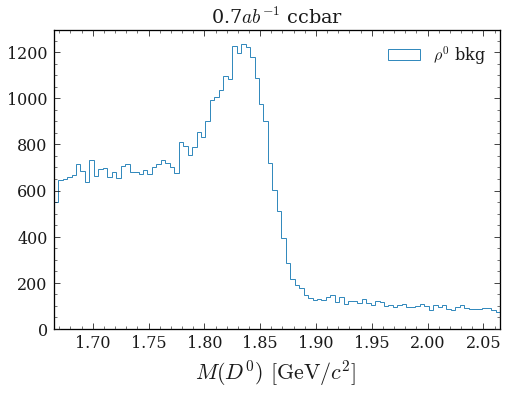

In [21]:
plt.hist(pd_df['D0_M'], label=r'$\rho^0$ bkg',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  '0.7$ab^{-1}$ ccbar'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

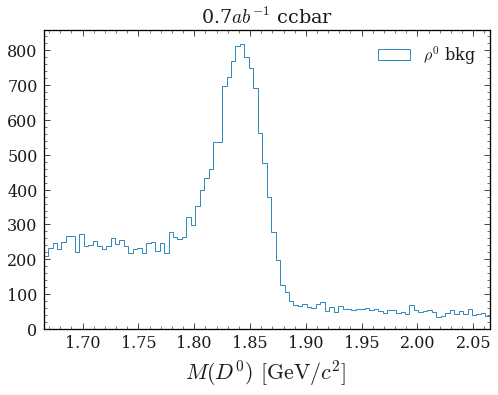

In [22]:
plt.hist(pd_df[pd_df['Pi0_Prob']<0.9].D0_M , label=r'$\rho^0$ bkg',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  '0.7$ab^{-1}$ ccbar'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

In [3]:
Filter = {}
Filter['rho']= ' gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 )&& Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
Filter['omega'] = 'gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Omega_M- 0.78265) < 0.015 ) && Dstarp_CMS_p>2.7 && abs(Dstarp_Q-0.00593)<0.0006 '
Filter['phi'] = 'gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Phi_M- 1.0195) < 0.011 ) && Dstarp_CMS_p>2.42 && abs(Dstarp_Q-0.00593)<0.0006'
Filter['antiKstar']='gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(antiKstar_M- 0.89555) < 0.06 )&& Dstarp_CMS_p>2.17 && abs(Dstarp_Q-0.00593)<0.0006'

In [4]:
tree = 'rho'
#base_filter = '(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 ) &&  Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter = Filter[tree]
variables=['Pi0_Prob','D0_M','Eta_Prob']

file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_0*.root'
rho_charged_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('charged','mixed')
rho_mixed_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('mixed','ddbar')
rho_ddbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('ddbar','ssbar')
rho_ssbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('ssbar','taupair')
rho_taupair_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('taupair','uubar')
rho_uubar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

#file = file.replace('ccbar','uubar')
file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_no_signal_ccbar_recon_output_0*.root'
#file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_yes_signal_ccbar_recon_output_0*.root'
rho_ccbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
#print(pd_df.describe())

runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "Pi0_Prob" is not in a dataset and is not a custom column been defined.

In [5]:
i='D0_M'
bins=80

In [6]:
data_list= [ rho_mixed_df[i], rho_charged_df[i], rho_uubar_df[i], rho_ddbar_df[i], rho_ssbar_df[i], rho_taupair_df[i], rho_ccbar_df[i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\rho^0$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

NameError: name 'rho_mixed_df' is not defined

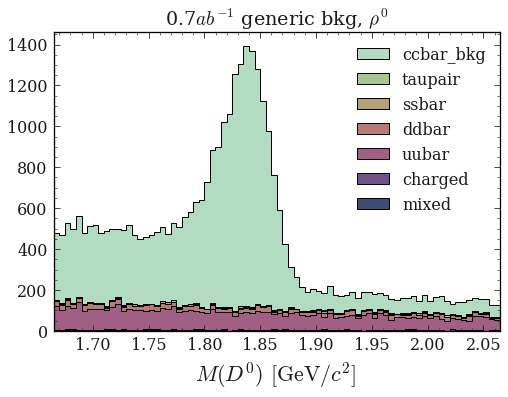

In [16]:
cut_value = 0.95

data_list= [ rho_mixed_df[rho_mixed_df.Pi0_Prob<cut_value][i], rho_charged_df[rho_charged_df.Pi0_Prob<cut_value][i], \
            rho_uubar_df[rho_uubar_df.Pi0_Prob<cut_value][i], rho_ddbar_df[rho_ddbar_df.Pi0_Prob<cut_value][i], \
            rho_ssbar_df[rho_ssbar_df.Pi0_Prob<cut_value][i], rho_taupair_df[rho_taupair_df.Pi0_Prob<cut_value][i], \
            rho_ccbar_df[rho_ccbar_df.Pi0_Prob<cut_value][i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\rho^0$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

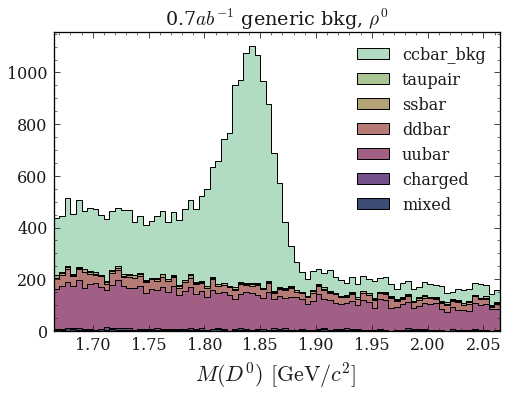

In [17]:
cut_value = 0.9

data_rho_list= [ rho_mixed_df[rho_mixed_df.Eta_Prob<cut_value][i], rho_charged_df[rho_charged_df.Eta_Prob<cut_value][i], \
            rho_uubar_df[rho_uubar_df.Eta_Prob<cut_value][i], rho_ddbar_df[rho_ddbar_df.Eta_Prob<cut_value][i], \
            rho_ssbar_df[rho_ssbar_df.Eta_Prob<cut_value][i], rho_taupair_df[rho_taupair_df.Eta_Prob<cut_value][i], \
            rho_ccbar_df[(rho_ccbar_df.Eta_Prob<cut_value) & (rho_ccbar_df.Pi0_Prob<cut_value)][i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_rho_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\rho^0$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

In [34]:
tree = 'phi'
#base_filter = '(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 ) &&  Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter = Filter[tree]
variables=['Pi0_Prob','D0_M','Eta_Prob']

file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_0*.root'
phi_charged_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)


file = file.replace('charged','mixed')
phi_mixed_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('mixed','ddbar')
phi_ddbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('ddbar','ssbar')
phi_ssbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('ssbar','taupair')

phi_taupair_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('taupair','uubar')
phi_uubar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_no_signal_ccbar_recon_output_0*.root'
phi_ccbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
#print(pd_df.describe())

runtime_error: Template method resolution failed:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree phi
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree phi
  none of the 3 overloaded methods succeeded. Full details:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree phi
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree phi
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree phi
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree phi

In [19]:
i='D0_M'
bins=80

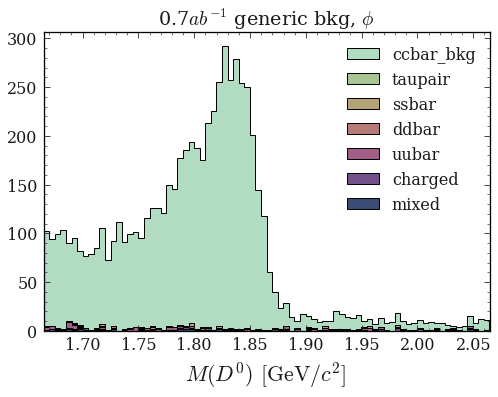

In [20]:
data_phi_list= [ phi_mixed_df[i], phi_charged_df[i], phi_uubar_df[i], phi_ddbar_df[i], phi_ssbar_df[i], phi_taupair_df[i], phi_ccbar_df[i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_phi_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\phi$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

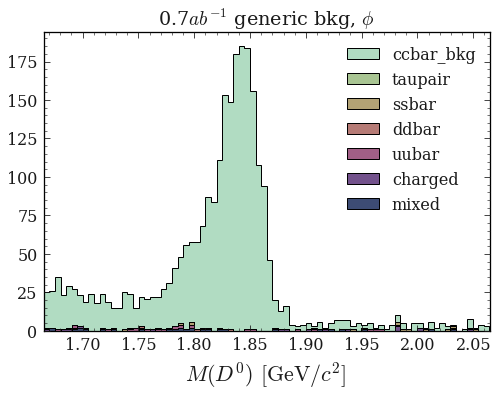

In [21]:
cut_value = 0.9

data_phi_list= [ phi_mixed_df[phi_mixed_df.Pi0_Prob<cut_value][i], phi_charged_df[phi_charged_df.Pi0_Prob<cut_value][i], \
            phi_uubar_df[phi_uubar_df.Pi0_Prob<cut_value][i], phi_ddbar_df[phi_ddbar_df.Pi0_Prob<cut_value][i], \
            phi_ssbar_df[phi_ssbar_df.Pi0_Prob<cut_value][i], phi_taupair_df[phi_taupair_df.Pi0_Prob<cut_value][i], \
            phi_ccbar_df[phi_ccbar_df.Pi0_Prob<cut_value][i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_phi_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\phi$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

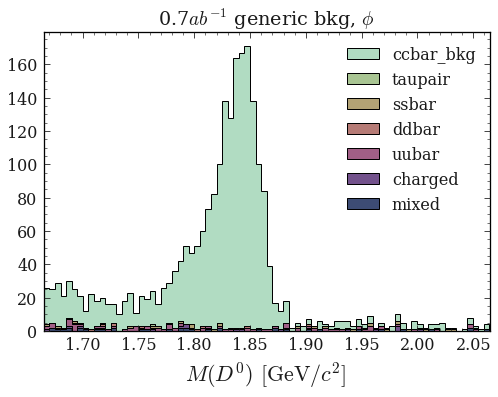

In [22]:
cut_value = 0.9

data_phi_list= [ phi_mixed_df[phi_mixed_df.Eta_Prob<cut_value][i], phi_charged_df[phi_charged_df.Eta_Prob<cut_value][i], \
            phi_uubar_df[phi_uubar_df.Eta_Prob<cut_value][i], phi_ddbar_df[phi_ddbar_df.Eta_Prob<cut_value][i], \
            phi_ssbar_df[phi_ssbar_df.Eta_Prob<cut_value][i], phi_taupair_df[phi_taupair_df.Eta_Prob<cut_value][i], \
            phi_ccbar_df[(phi_ccbar_df.Eta_Prob<cut_value) & (phi_ccbar_df.Pi0_Prob<cut_value)][i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_phi_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\phi$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

In [23]:
tree = 'antiKstar'
#base_filter = '(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 ) &&  Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter = Filter[tree]
variables=['Pi0_Prob','D0_M','Eta_Prob']

file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_0*.root'
antiKstar_charged_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('charged','mixed')
antiKstar_mixed_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('mixed','ddbar')
antiKstar_ddbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('ddbar','ssbar')
antiKstar_ssbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('ssbar','taupair')
antiKstar_taupair_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('taupair','uubar')
antiKstar_uubar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_no_signal_ccbar_recon_output_0*.root'
#file = file.replace('uubar','ccbar')
antiKstar_ccbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
#print(pd_df.describe())

In [24]:
i='D0_M'
bins=80

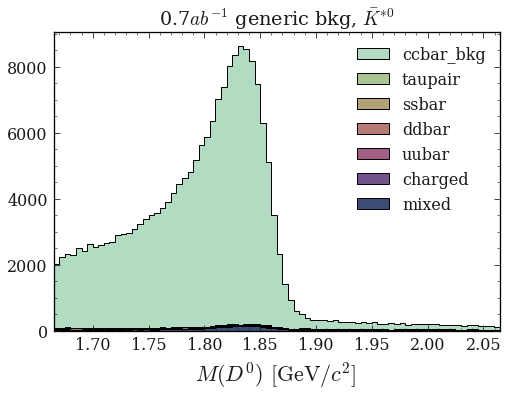

In [25]:
data_antiKstar_list= [ antiKstar_mixed_df[i], antiKstar_charged_df[i], antiKstar_uubar_df[i], antiKstar_ddbar_df[i], antiKstar_ssbar_df[i], antiKstar_taupair_df[i], antiKstar_ccbar_df[i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_antiKstar_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\bar{K}^{*0}$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

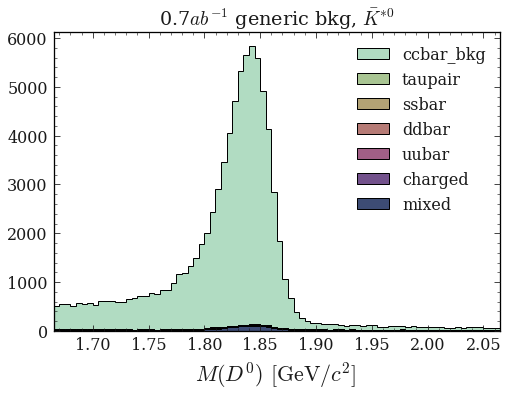

In [26]:
cut_value = 0.9

data_antiKstar_list= [ antiKstar_mixed_df[antiKstar_mixed_df.Pi0_Prob<cut_value][i], antiKstar_charged_df[antiKstar_charged_df.Pi0_Prob<cut_value][i], \
            antiKstar_uubar_df[antiKstar_uubar_df.Pi0_Prob<cut_value][i], antiKstar_ddbar_df[antiKstar_ddbar_df.Pi0_Prob<cut_value][i], \
            antiKstar_ssbar_df[antiKstar_ssbar_df.Pi0_Prob<cut_value][i], antiKstar_taupair_df[antiKstar_taupair_df.Pi0_Prob<cut_value][i], \
            antiKstar_ccbar_df[antiKstar_ccbar_df.Pi0_Prob<cut_value][i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_antiKstar_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\bar{K}^{*0}$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

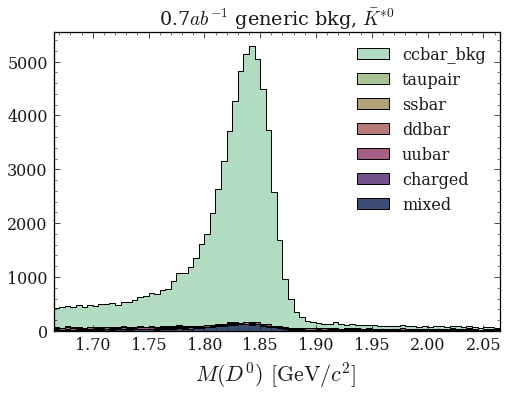

In [27]:
cut_value = 0.9

data_antiKstar_list= [ antiKstar_mixed_df[antiKstar_mixed_df.Eta_Prob<cut_value][i], antiKstar_charged_df[antiKstar_charged_df.Eta_Prob<cut_value][i], \
            antiKstar_uubar_df[antiKstar_uubar_df.Eta_Prob<cut_value][i], antiKstar_ddbar_df[antiKstar_ddbar_df.Eta_Prob<cut_value][i], \
            antiKstar_ssbar_df[antiKstar_ssbar_df.Eta_Prob<cut_value][i], antiKstar_taupair_df[antiKstar_taupair_df.Eta_Prob<cut_value][i], \
            antiKstar_ccbar_df[(antiKstar_ccbar_df.Eta_Prob<cut_value) & (antiKstar_ccbar_df.Pi0_Prob<cut_value)][i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_antiKstar_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\bar{K}^{*0}$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

In [28]:
tree = 'omega'
#base_filter = '(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 ) &&  Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter = Filter[tree]
variables=['Pi0_Prob','D0_M','Eta_Prob']

file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_0*.root'
omega_charged_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('charged','mixed')
omega_mixed_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('mixed','ddbar')
omega_ddbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('ddbar','ssbar')
omega_ssbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('ssbar','taupair')
omega_taupair_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = file.replace('taupair','uubar')
omega_uubar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_no_signal_ccbar_recon_output_0*.root'
#file = file.replace('uubar','ccbar')
omega_ccbar_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
#print(pd_df.describe())

In [29]:
i='D0_M'
bins=80

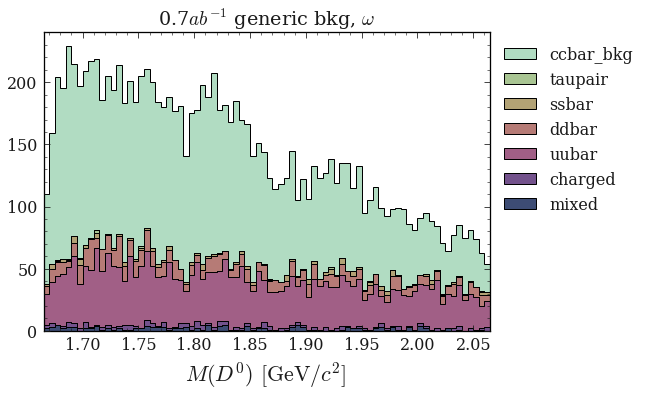

In [30]:
data_omega_list= [ omega_mixed_df[i], omega_charged_df[i], omega_uubar_df[i], omega_ddbar_df[i], omega_ssbar_df[i], omega_taupair_df[i], omega_ccbar_df[i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_omega_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\omega$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend(bbox_to_anchor=(1,1))

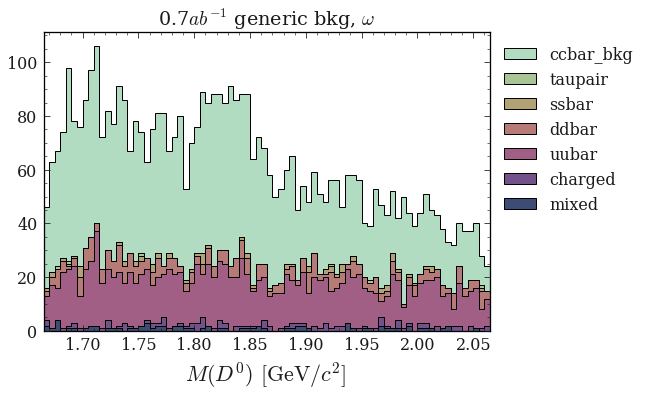

In [31]:
cut_value = 0.9

data_omega_list= [ omega_mixed_df[omega_mixed_df.Pi0_Prob<cut_value][i], omega_charged_df[omega_charged_df.Pi0_Prob<cut_value][i], \
            omega_uubar_df[omega_uubar_df.Pi0_Prob<cut_value][i], omega_ddbar_df[omega_ddbar_df.Pi0_Prob<cut_value][i], \
            omega_ssbar_df[omega_ssbar_df.Pi0_Prob<cut_value][i], omega_taupair_df[omega_taupair_df.Pi0_Prob<cut_value][i], \
            omega_ccbar_df[omega_ccbar_df.Pi0_Prob<cut_value][i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_omega_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\omega}$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend(bbox_to_anchor=(1,1))

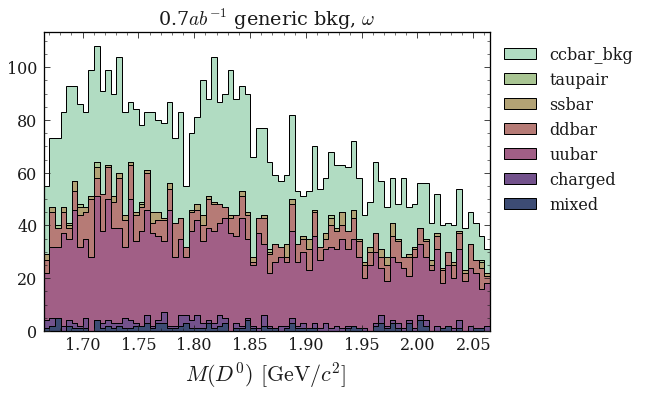

In [32]:
cut_value = 0.9

data_omega_list= [ omega_mixed_df[omega_mixed_df.Eta_Prob<cut_value][i], omega_charged_df[omega_charged_df.Eta_Prob<cut_value][i], \
            omega_uubar_df[omega_uubar_df.Eta_Prob<cut_value][i], omega_ddbar_df[omega_ddbar_df.Eta_Prob<cut_value][i], \
            omega_ssbar_df[omega_ssbar_df.Eta_Prob<cut_value][i], omega_taupair_df[omega_taupair_df.Eta_Prob<cut_value][i], \
            omega_ccbar_df[(omega_ccbar_df.Eta_Prob<cut_value) & (omega_ccbar_df.Pi0_Prob<cut_value)][i]]
labels=['mixed','charged','uubar','ddbar','ssbar','taupair','ccbar_bkg']
colors=sns.cubehelix_palette(7, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
#colors=sns.color_palette("PuBuGn_d", 7)
plt.hist(data_omega_list, bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  r'0.7$ab^{-1}$ generic bkg, $\omega$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend(bbox_to_anchor=(1,1))

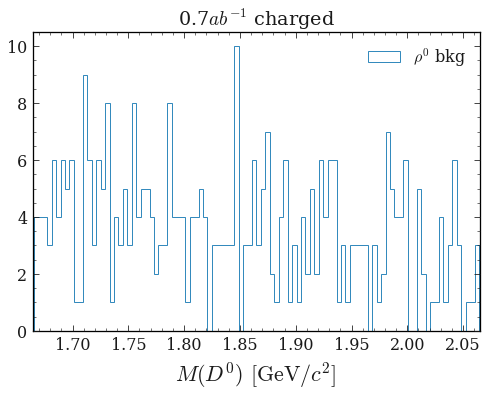

In [29]:
plt.hist(pd_charged_df['D0_M'], label=r'$\rho^0$ bkg',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  '0.7$ab^{-1}$ charged'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

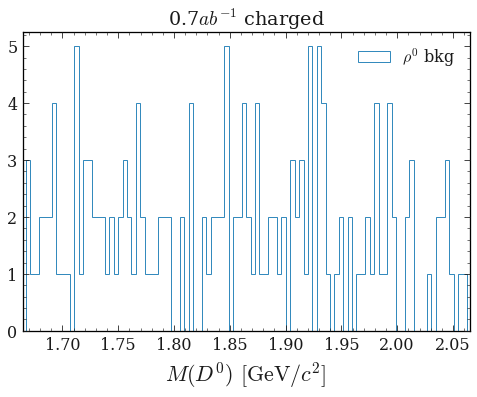

In [30]:
plt.hist(pd_charged_df[pd_charged_df['Pi0_Prob']<0.9].D0_M , label=r'$\rho^0$ bkg',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  '0.7$ab^{-1}$ charged'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

           Pi0_Prob          D0_M
count  21480.000000  21480.000000
mean       0.429142      1.813387
std        0.323050      0.080505
min        0.000107      1.665003
25%        0.091203      1.756395
50%        0.426458      1.823504
75%        0.752261      1.851911
max        0.899978      2.064860


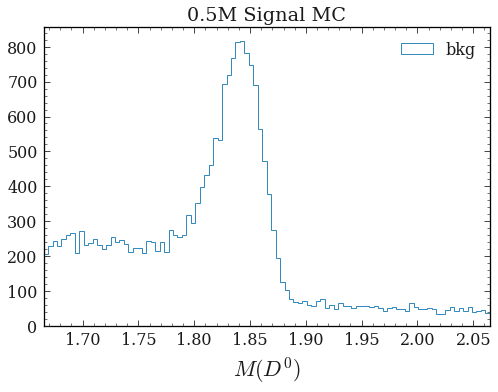

In [5]:
#file = '/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'
file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_no_signal_ccbar_recon_output_0*.root'

#file = '/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_01.root'
tree = 'rho'
base_filter = '(Pi0_Prob<0.9) && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 ) &&  Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob','D0_M']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
print(pd_df.describe())
plt.hist(pd_df['D0_M'], label=r'bkg',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

       Pi0_Prob
0      0.082517
1      0.990322
2      0.996696
3      0.738300
4      0.738300
...         ...
95515  0.992332
95516  0.930461
95517  0.911080
95518  0.911080
95519  0.876876

[95520 rows x 1 columns]


(array([ 4123.,  1282.,   956.,   758.,   589.,   553.,   517.,   569.,
          585.,   558.,   440.,   489.,   478.,   414.,   400.,   342.,
          385.,   352.,   360.,   325.,   338.,   344.,   367.,   337.,
          306.,   257.,   316.,   298.,   264.,   290.,   308.,   292.,
          287.,   288.,   290.,   319.,   329.,   468.,   320.,   305.,
          273.,   305.,   308.,   354.,   341.,   313.,   361.,   276.,
          287.,   322.,   286.,   332.,   305.,   304.,   288.,   289.,
          324.,   373.,   312.,   320.,   334.,   339.,   359.,   323.,
          333.,   312.,   320.,   408.,   310.,   381.,   469.,   350.,
          382.,   426.,   413.,   398.,   355.,   478.,   455.,   524.,
          492.,   529.,   604.,   615.,   711.,   691.,   836.,   887.,
          973.,  1158.,  1199.,  1490.,  1747.,  2254.,  2598.,  4084.,
         5267.,  8572.,  9704., 16369.]),
 array([1.38492469e-04, 1.01271309e-02, 2.01157694e-02, 3.01044078e-02,
        4.00930463e-02

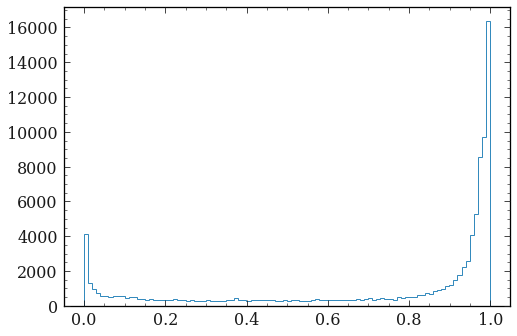

In [115]:

#file = '/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'
file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_0*.root'

#file = '/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_01.root'
tree = 'rho'
base_filter = 'gamma_E>0.55'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
print(pd_df)
plt.hist(pd_df['Pi0_Prob'], label=r'bkg',bins=100,  histtype='step') 

(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal==1) && (gamma_E>0.1)
(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal!=1) && (gamma_E>0.1)
['D0_M', 'Dstarp_Q', 'gamma_CMS_E', 'D0_cosHel_0', 'D0_cosHel_1', 'gamma_E', 'Dstarp_CMS_p', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Phi_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root
true = 1109
0.004999999999999999


<Figure size 576x396 with 0 Axes>

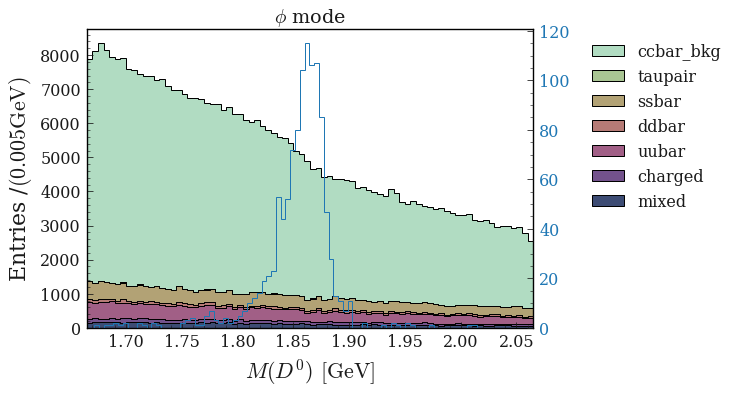

0.00025530606508255004


<Figure size 576x396 with 0 Axes>

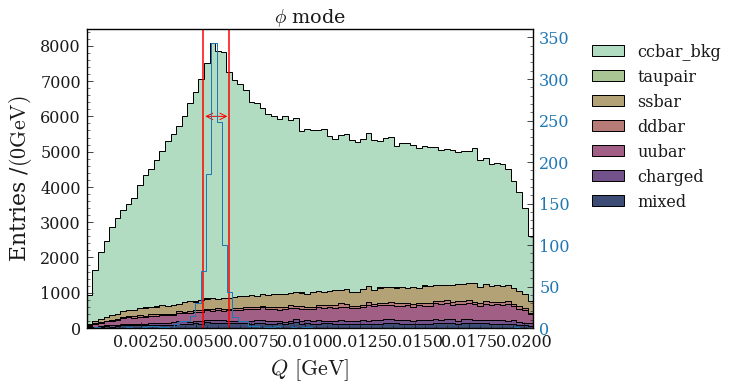

<Figure size 576x396 with 0 Axes>

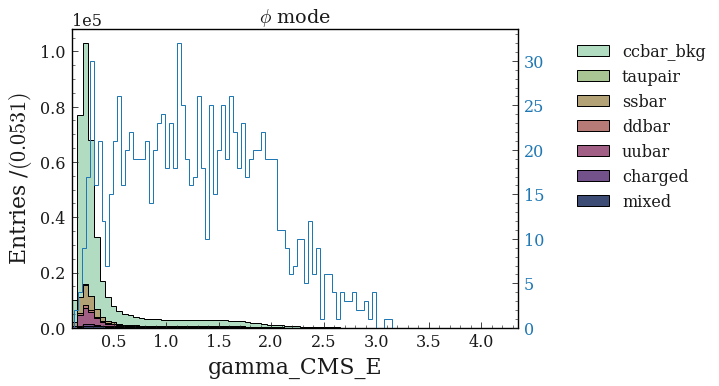

0.025


<Figure size 576x396 with 0 Axes>

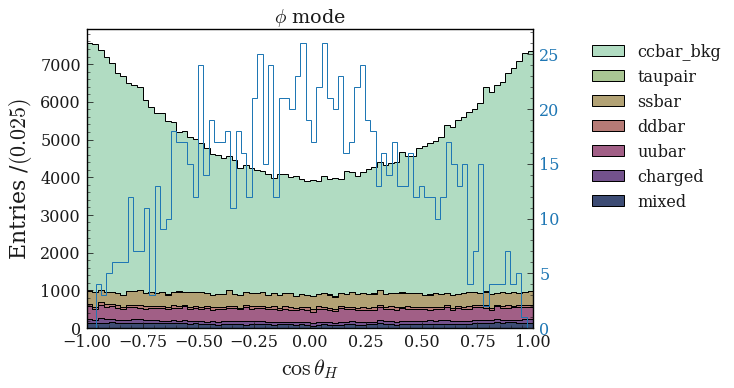

<Figure size 576x396 with 0 Axes>

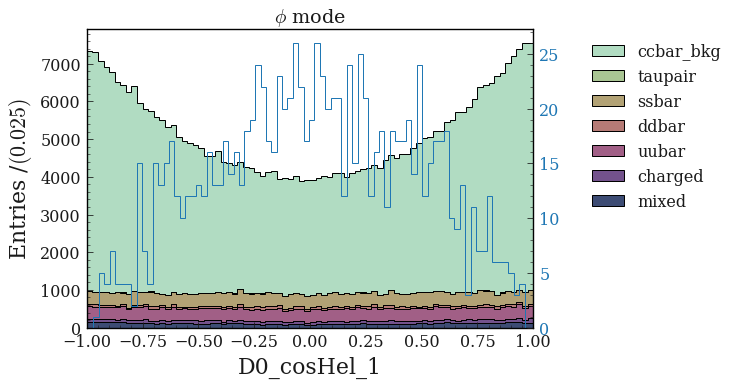

0.05204177379608155


<Figure size 576x396 with 0 Axes>

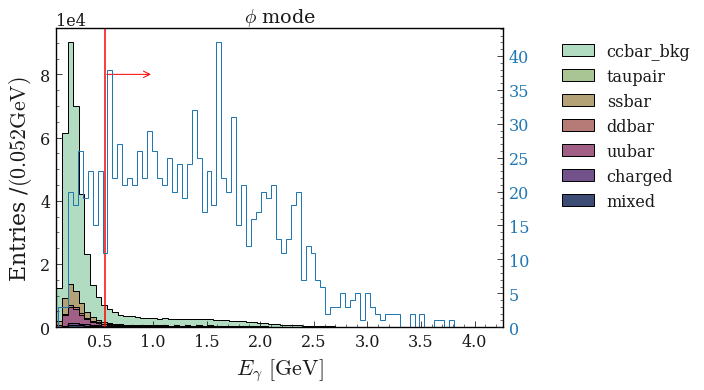

0.0690631256400186


<Figure size 576x396 with 0 Axes>

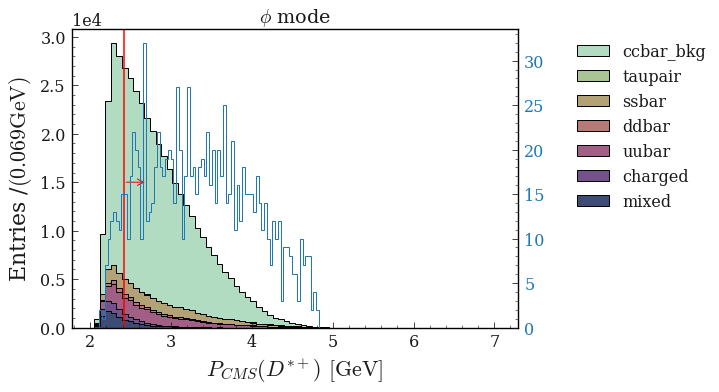

<Figure size 576x396 with 0 Axes>

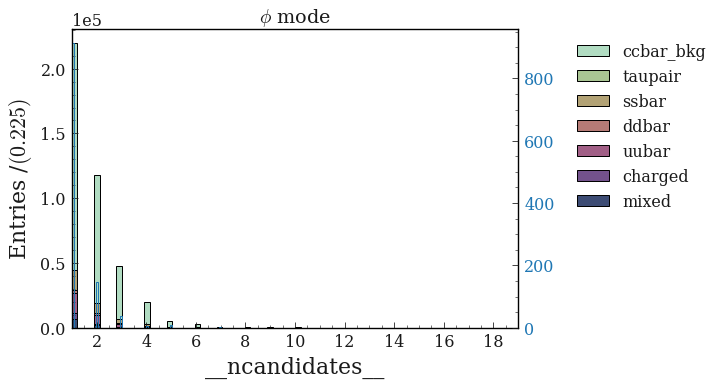

/tmp/ipykernel_265073/3428330970.py:478: UserWarning: Attempting to set identical left == right == 1003 results in singular transformations; automatically expanding.
  ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max())


<Figure size 576x396 with 0 Axes>

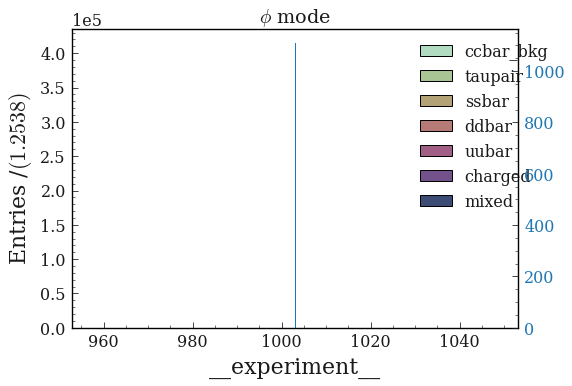

/tmp/ipykernel_265073/3428330970.py:478: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim(pd_merge_df[i].min(), pd_merge_df[i].max())


<Figure size 576x396 with 0 Axes>

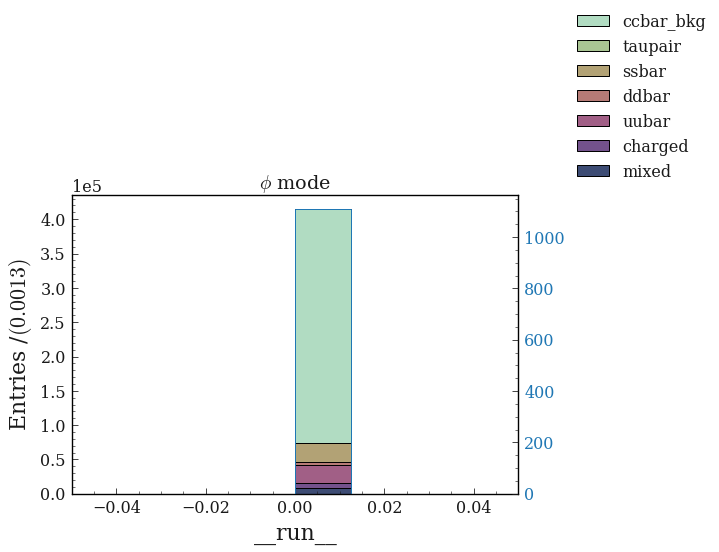

<Figure size 576x396 with 0 Axes>

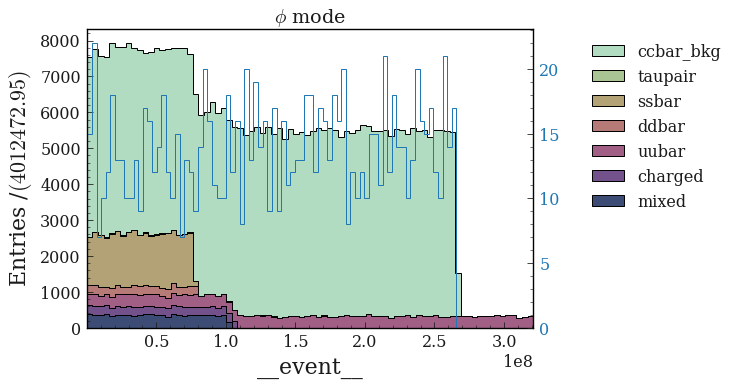

0.001037615569646666


<Figure size 576x396 with 0 Axes>

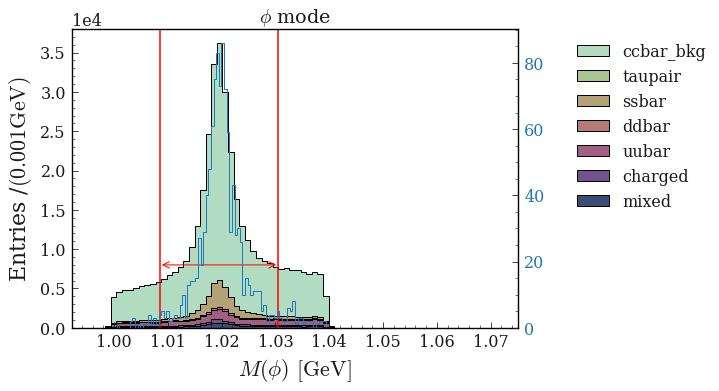

0.025


<Figure size 576x396 with 0 Axes>

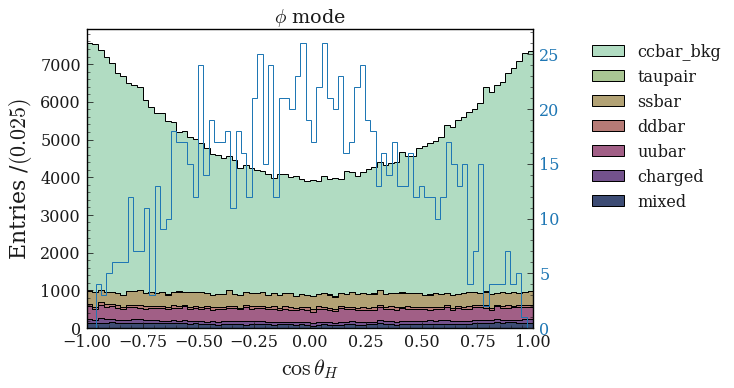

<Figure size 576x396 with 0 Axes>

In [20]:
df = D0_M_stack(all_stack='no',option='pid_0_5',vector='phi',bins=80, add_base_filter = '(gamma_E>0.1)')

In [21]:
df.to_csv("/home/belle2/jaeyoung/b2plot/csv_files/1ab_phi_output.csv")

In [22]:
df_new = pd.read_csv('/home/belle2/jaeyoung/b2plot/csv_files/1ab_phi_output.csv')

print(df_new.to_string()) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
df_new.head()

Unnamed: 0      D0_M  Dstarp_Q  gamma_CMS_E  D0_cosHel_0  D0_cosHel_1  \
0           0  1.753418  0.008506     1.566567    -0.947108     0.947108   
1           1  1.665502  0.005458     0.851705     0.898439    -0.898439   
2           2  1.744175  0.007921     1.184478     0.580484    -0.580484   
3           3  1.899015  0.005407     0.286957     0.966982    -0.966982   
4           4  1.899785  0.002338     0.246578    -0.318844     0.318846   

    gamma_E  Dstarp_CMS_p  __ncandidates__  __experiment__  __run__  \
0  1.761645      4.093781                1            1003        0   
1  0.987358      2.323794                1            1003        0   
2  1.168891      2.547789                1            1003        0   
3  0.298432      2.271078                1            1003        0   
4  0.218844      2.562735                1            1003        0   

   __event__  Phi_InvM      class  
0   25631921  1.019850  ccbar_bkg  
1   25634218  1.012831  ccbar_bkg  
2   25636028  1.019587  ccbar_bkg  
3   43194464  1.026259  ccbar_bkg  
4   43196476  1.018437  ccbar_bkg

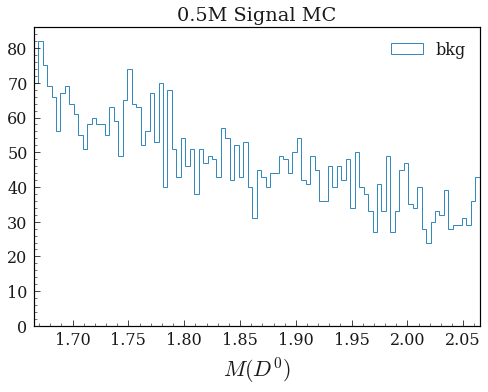

In [30]:
df_new.head()
#plt.hist(df_new[df_new['class']=='charged'].D0_M)


plt.hist(df_new[df_new['class']=='ddbar'].D0_M, label=r'bkg',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$'
#plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal==1) && (gamma_E>0.55) && (abs(Phi_M - 1.0195) < 0.011) &&(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006)
(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal!=1) && (gamma_E>0.55) && (abs(Phi_M - 1.0195) < 0.011) &&(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006)
['D0_M', 'Phi_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root
true = 716
0.004999999999999999


<Figure size 576x396 with 0 Axes>

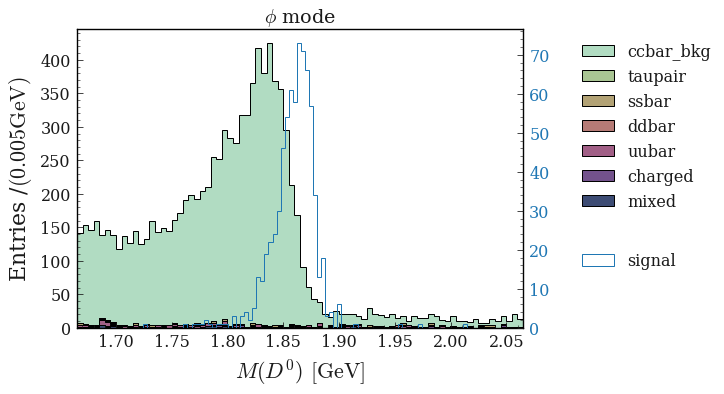

0.00027491186219308074


<Figure size 576x396 with 0 Axes>

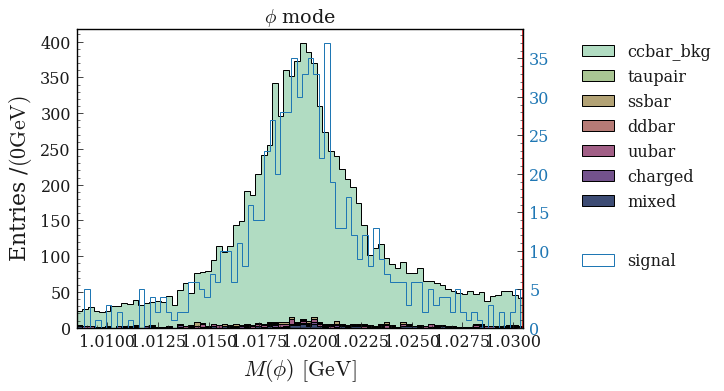

0.025


<Figure size 576x396 with 0 Axes>

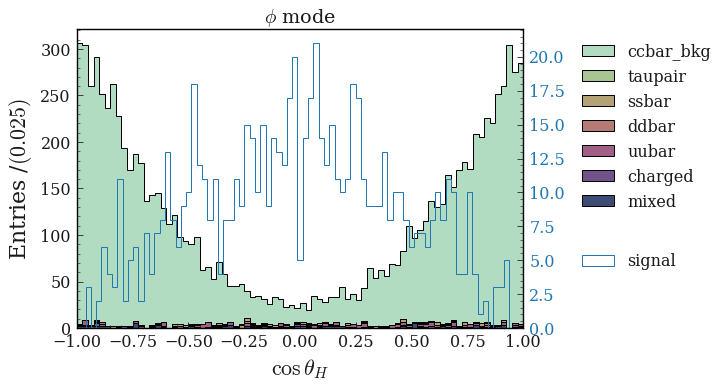

<Figure size 576x396 with 0 Axes>

In [34]:
D0_M_stack(all_stack='no',option='pid_0_5',vector='phi',bins=80, add_base_filter = '(gamma_E>0.55) && (abs(Phi_M - 1.0195) < 0.011) &&(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006)')

(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal==1) && (abs(Phi_InvM - 1.0195) < 0.02) && (gamma_E>0.1) && (Dstarp_CMS_p<5.5)
(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal!=1) && (abs(Phi_InvM - 1.0195) < 0.02) && (gamma_E>0.1) && (Dstarp_CMS_p<5.5)
['gamma_E', 'Phi_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root
true = 1109
0.05204177379608155


<Figure size 576x396 with 0 Axes>

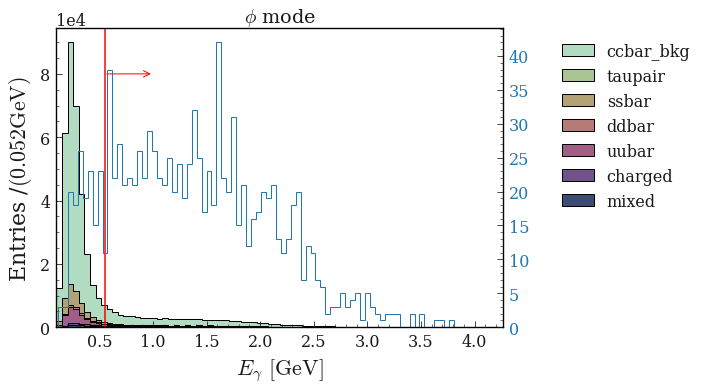

0.0004999934468001066


<Figure size 576x396 with 0 Axes>

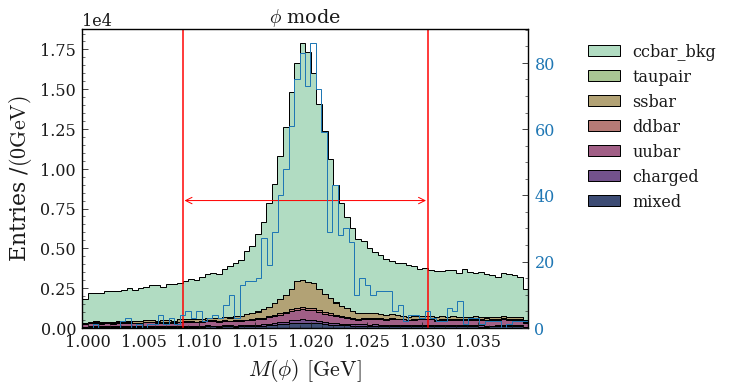

0.025


<Figure size 576x396 with 0 Axes>

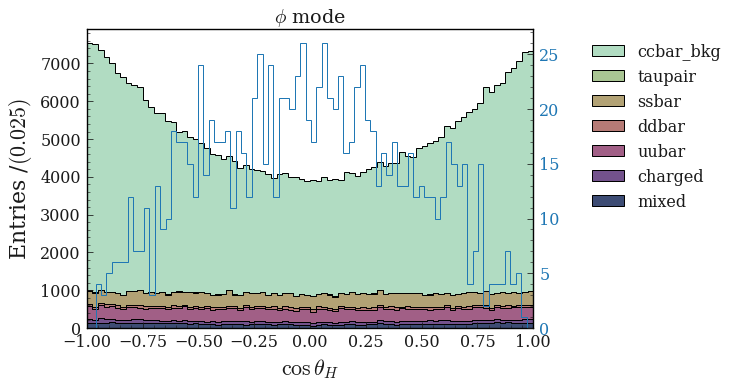

<Figure size 576x396 with 0 Axes>

In [8]:
D0_M_stack(all_stack='no',option='pid_0_5',vector='phi',bins=80, add_base_filter = '(abs(Phi_InvM - 1.0195) < 0.02) && (gamma_E>0.1) && (Dstarp_CMS_p<5.5)')
#D0_M_stack(all_stack='no',option='pid_0_5',vector='phi',bins=80, add_base_filter = '(abs(Phi_M - 1.0195) < 0.011) &&(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006) ')

(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal==1) && (abs(Phi_M - 1.0195) < 0.011) &&(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006) 
(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal!=1) && (abs(Phi_M - 1.0195) < 0.011) &&(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006) 
['D0_M', 'Dstarp_CMS_p', 'Dstarp_Q', 'gamma_CMS_E', 'Phi_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/naive_generic_ccbar_recon_output_0*.root
true = 723


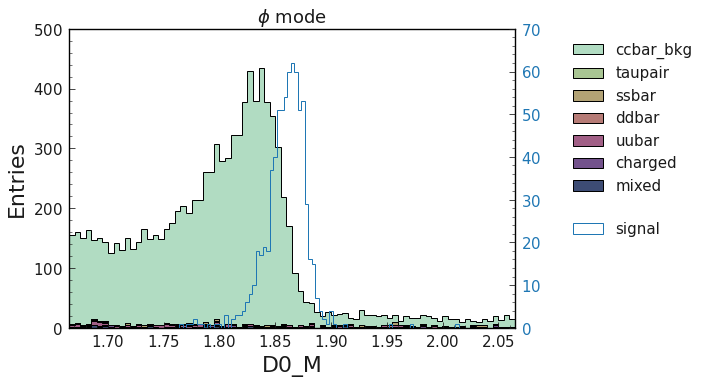

<Figure size 576x396 with 0 Axes>

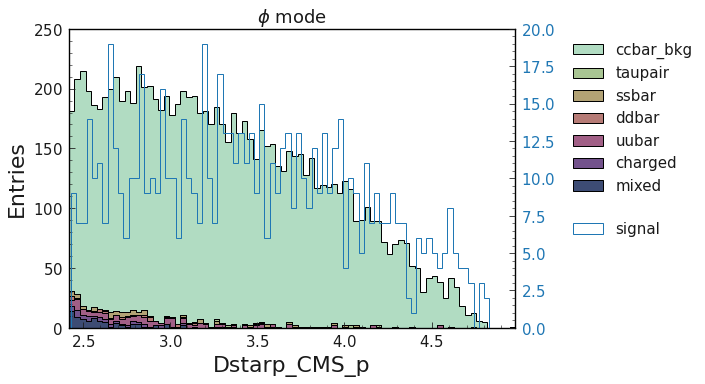

<Figure size 576x396 with 0 Axes>

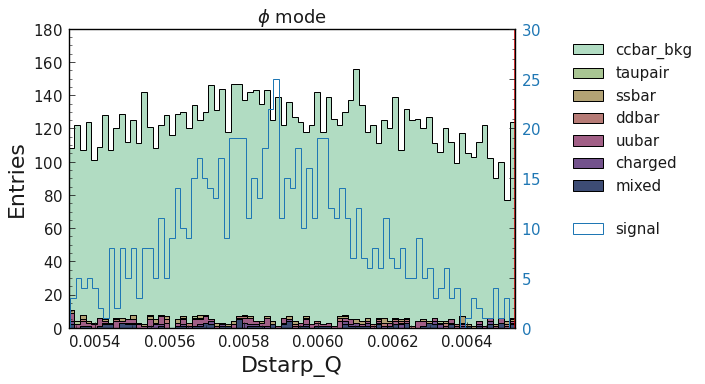

<Figure size 576x396 with 0 Axes>

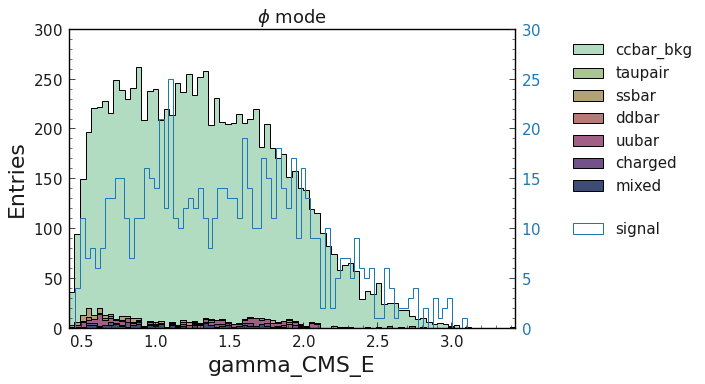

<Figure size 576x396 with 0 Axes>

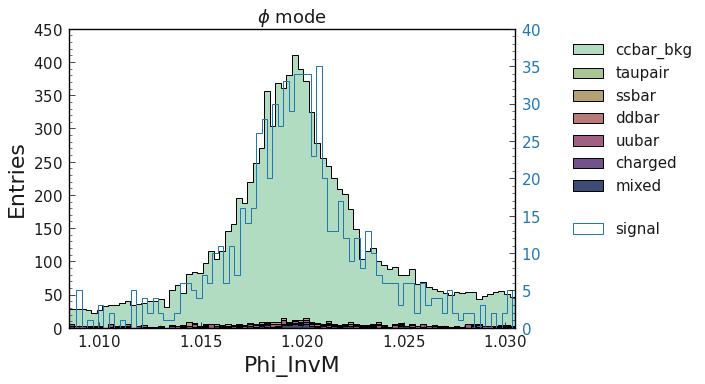

<Figure size 576x396 with 0 Axes>

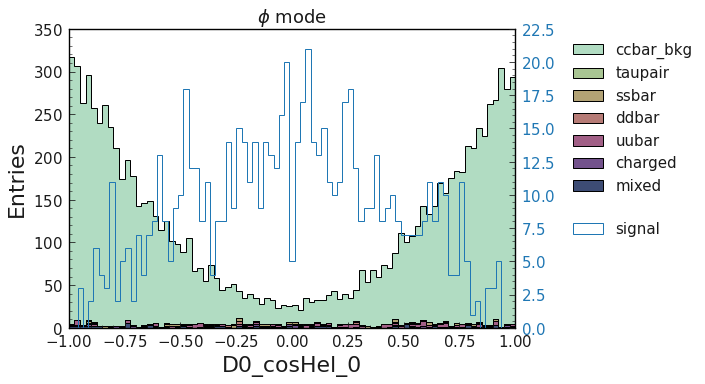

<Figure size 576x396 with 0 Axes>

In [6]:
D0_M_stack(all_stack='no',option='naive',vector='phi',bins=80, add_base_filter = '(abs(Phi_M - 1.0195) < 0.011) &&(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006) ')

(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal==1) && (abs(Phi_M - 1.0195) < 0.011) &&(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006) 
(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal!=1) && (abs(Phi_M - 1.0195) < 0.011) &&(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006) 
['D0_M', 'Dstarp_CMS_p', 'Dstarp_Q', 'gamma_CMS_E', 'Phi_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pre_sel_generic_ccbar_recon_output_0*.root
true = 735


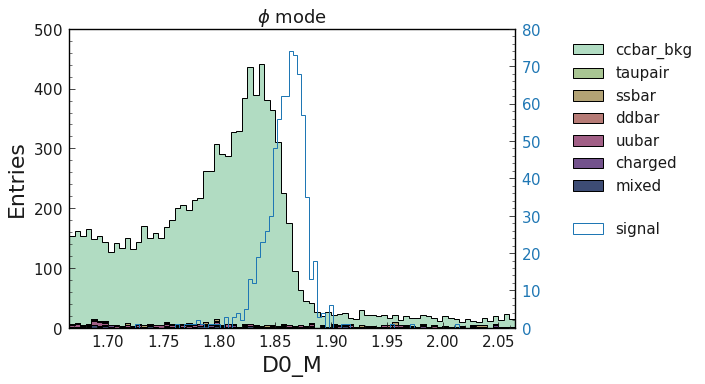

<Figure size 576x396 with 0 Axes>

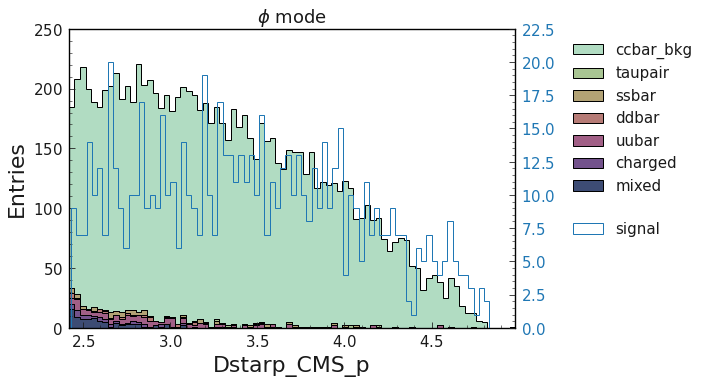

<Figure size 576x396 with 0 Axes>

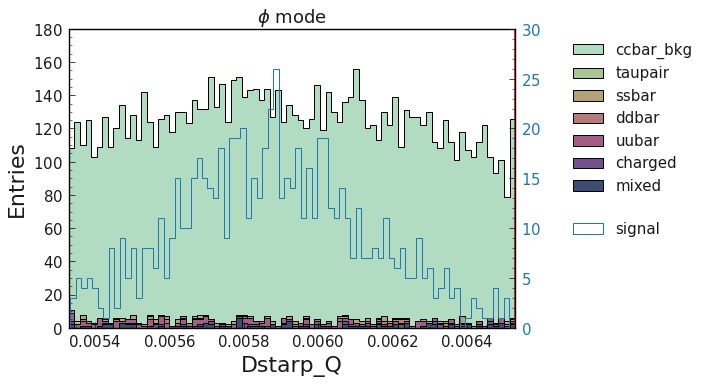

<Figure size 576x396 with 0 Axes>

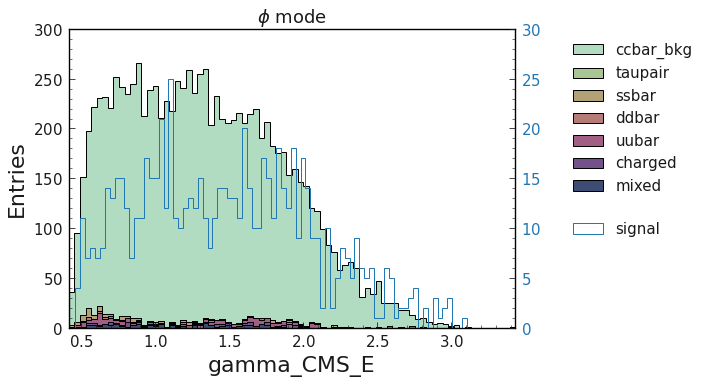

<Figure size 576x396 with 0 Axes>

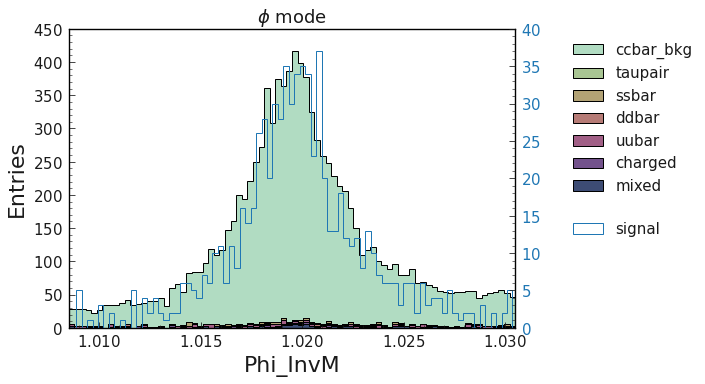

<Figure size 576x396 with 0 Axes>

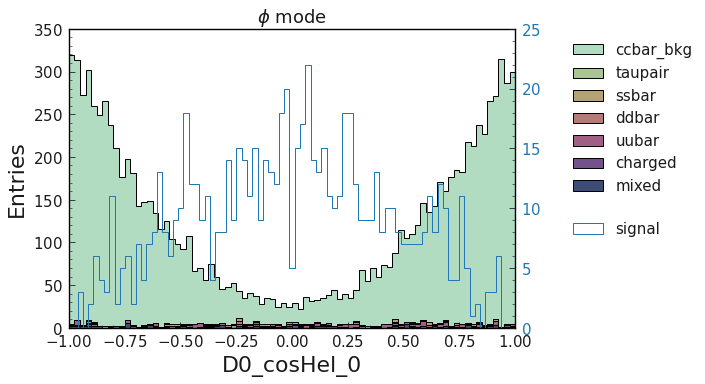

<Figure size 576x396 with 0 Axes>

input_line_85:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [3]:
D0_M_stack(all_stack='no',option='pre',vector='phi',bins=80, add_base_filter = '(abs(Phi_M - 1.0195) < 0.011) &&(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006) ')

(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal==1) && (Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006) 
(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal!=1) && (Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006) 
['D0_M', 'Dstarp_CMS_p', 'Dstarp_Q', 'Phi_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/tara_ccbar_recon_output_0*.root
true = 566


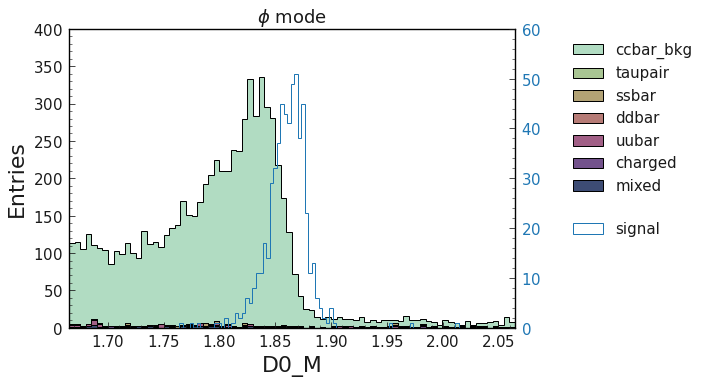

<Figure size 576x396 with 0 Axes>

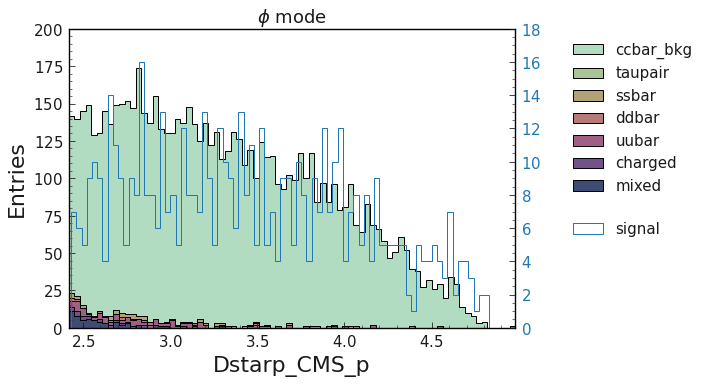

<Figure size 576x396 with 0 Axes>

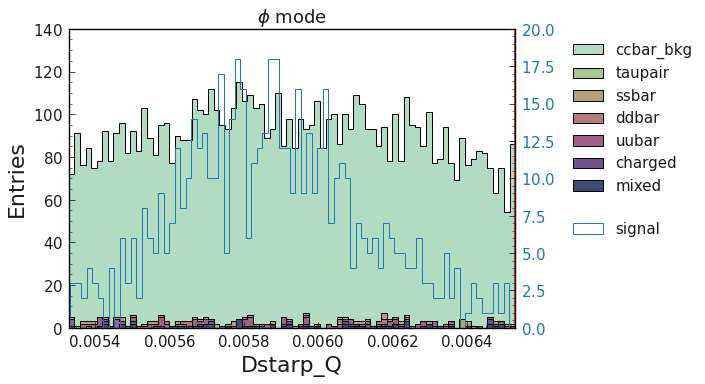

<Figure size 576x396 with 0 Axes>

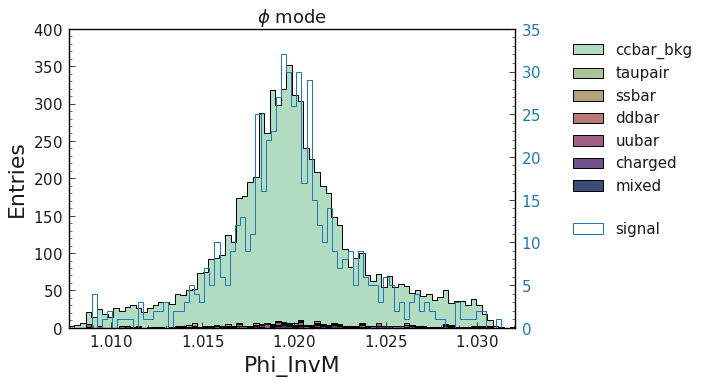

<Figure size 576x396 with 0 Axes>

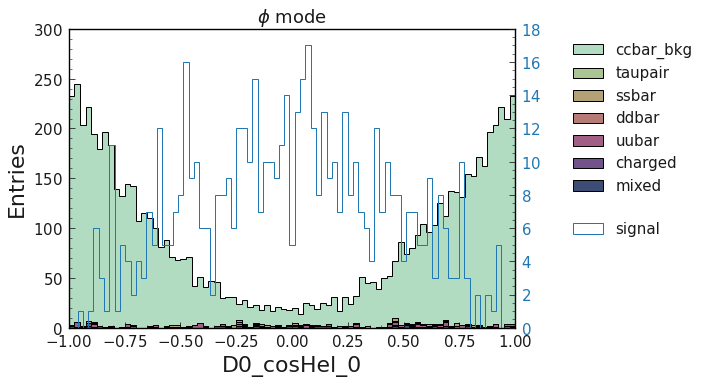

<Figure size 576x396 with 0 Axes>

In [8]:
D0_M_stack(all_stack='no',option='tara',vector='phi',bins=80, add_base_filter = '(Dstarp_CMS_p>2.42) && (abs(Dstarp_Q-0.00593)<0.0006) ')

(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal==1) && (Dstarp_CMS_p>2.42) && abs(Dstarp_Q-0.00593)<0.0006
(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal!=1) && (Dstarp_CMS_p>2.42) && abs(Dstarp_Q-0.00593)<0.0006
['D0_M', 'Dstarp_CMS_p', 'Dstarp_Q', 'Phi_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/tara_ccbar_recon_output_0*.root
true = 566


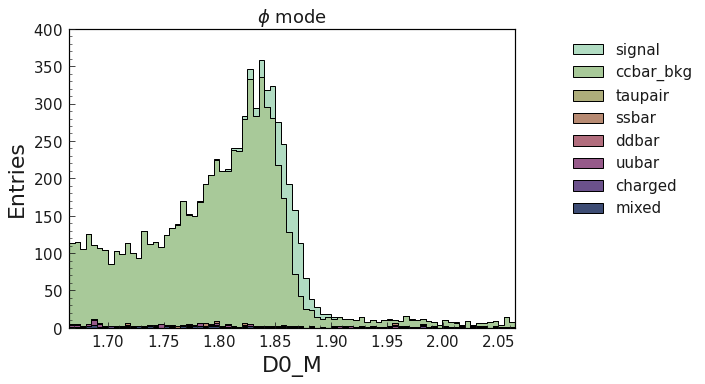

<Figure size 576x396 with 0 Axes>

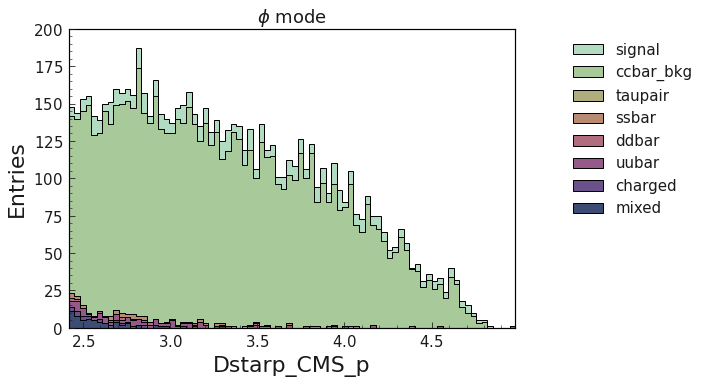

<Figure size 576x396 with 0 Axes>

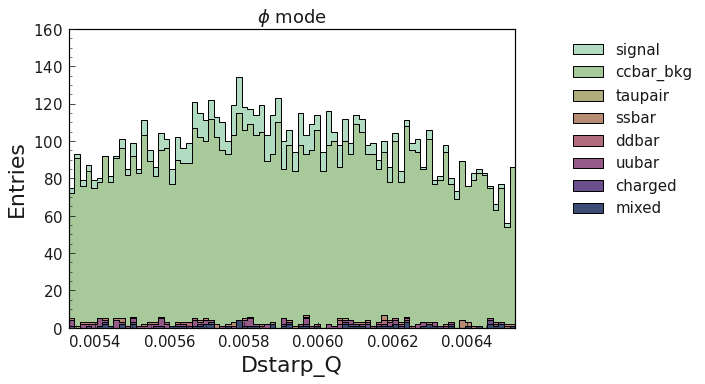

<Figure size 576x396 with 0 Axes>

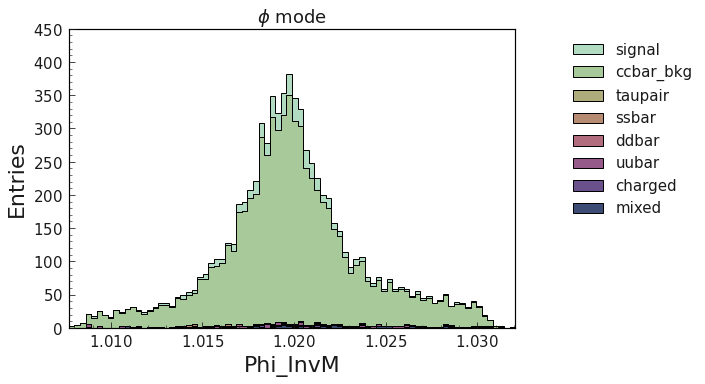

<Figure size 576x396 with 0 Axes>

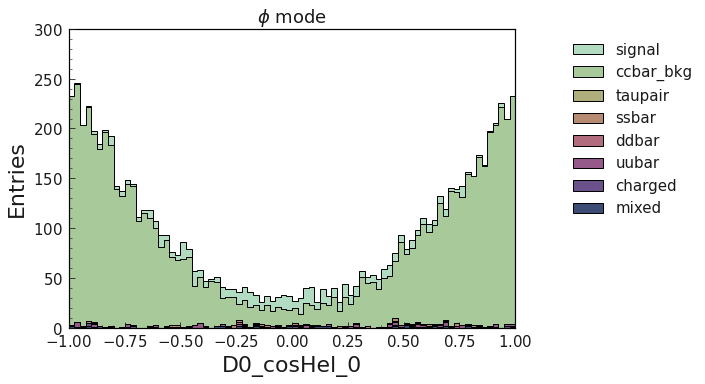

<Figure size 576x396 with 0 Axes>

In [9]:
D0_M_stack(all_stack='yes',option='tara',vector='phi',bins=80, add_base_filter = '(Dstarp_CMS_p>2.42) && abs(Dstarp_Q-0.00593)<0.0006')

['D0_M', 'Dstarp_CMS_p', 'Dstarp_Q', 'Phi_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/tara_ccbar_recon_output_0*.root
true = 694


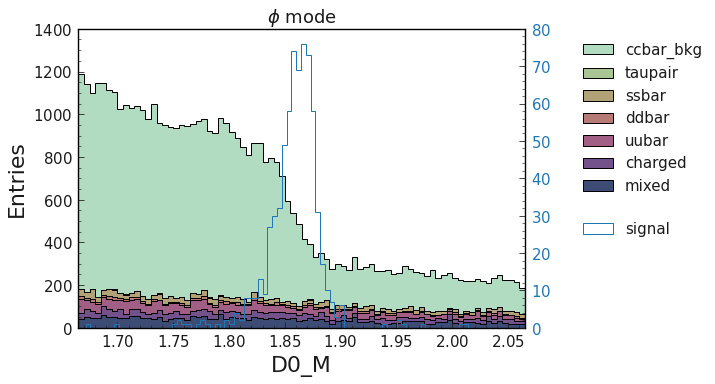

<Figure size 576x396 with 0 Axes>

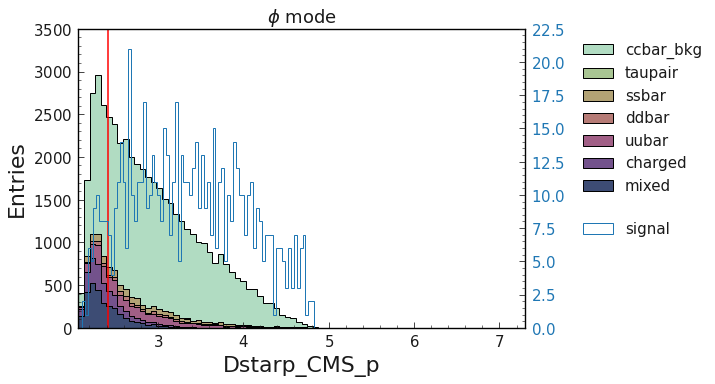

<Figure size 576x396 with 0 Axes>

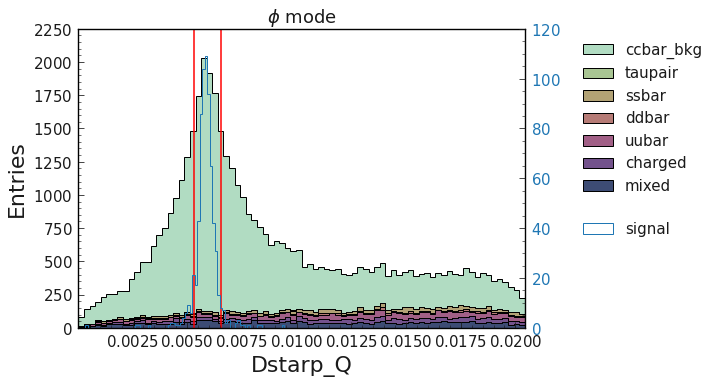

<Figure size 576x396 with 0 Axes>

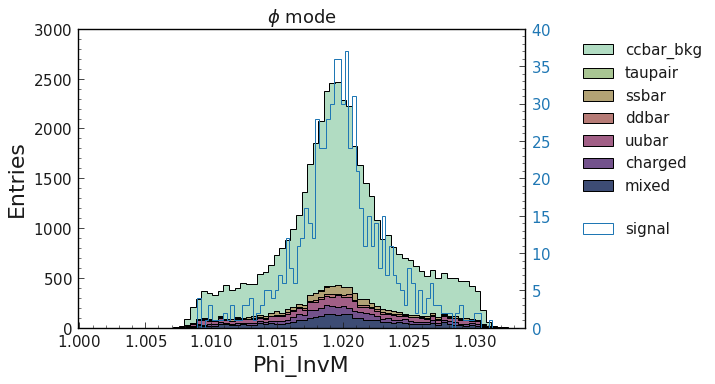

<Figure size 576x396 with 0 Axes>

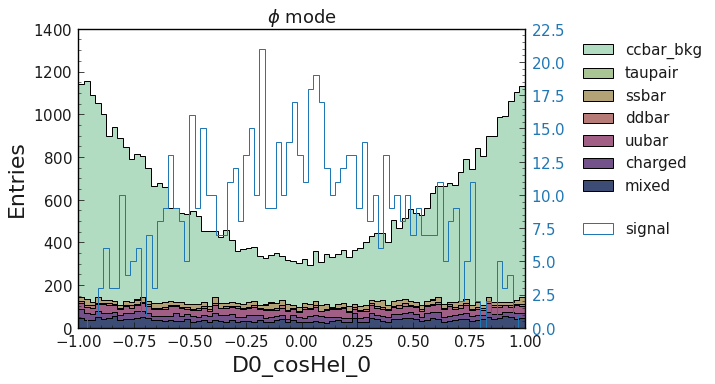

<Figure size 576x396 with 0 Axes>

In [15]:
D0_M_stack(all_stack='no',option='tara',vector='phi',bins=80)

(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal==1) && ( abs(Omega_M- 0.78265) < 0.02 ) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>3.0) && (gamma1_beamBackgroundSuppression>0.9 && gamma2_beamBackgroundSuppression>0.9)
(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal!=1) && ( abs(Omega_M- 0.78265) < 0.02 ) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>3.0) && (gamma1_beamBackgroundSuppression>0.9 && gamma2_beamBackgroundSuppression>0.9)
['D0_M', 'Dstarp_CMS_p', 'Dstarp_Q', 'gamma_CMS_E', 'D0_cosHel_0', 'D0_cosHel_1', 'D0_cosHel_2', 'Omega_InvM']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/beam_hadronsplit_ccbar_recon_output_0*.root
true = 1898


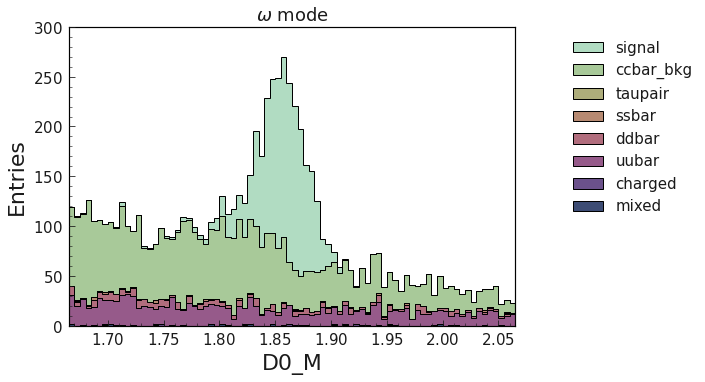

<Figure size 576x396 with 0 Axes>

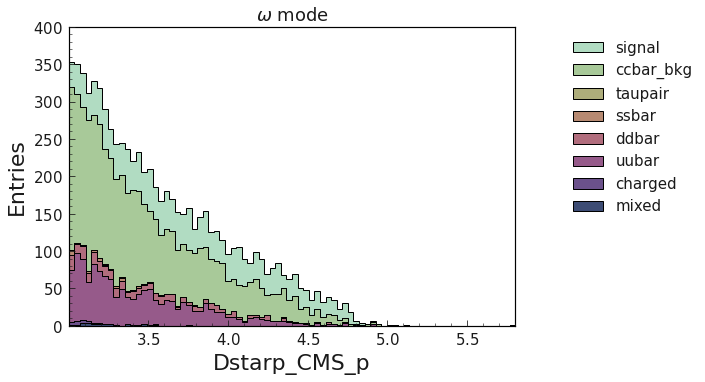

<Figure size 576x396 with 0 Axes>

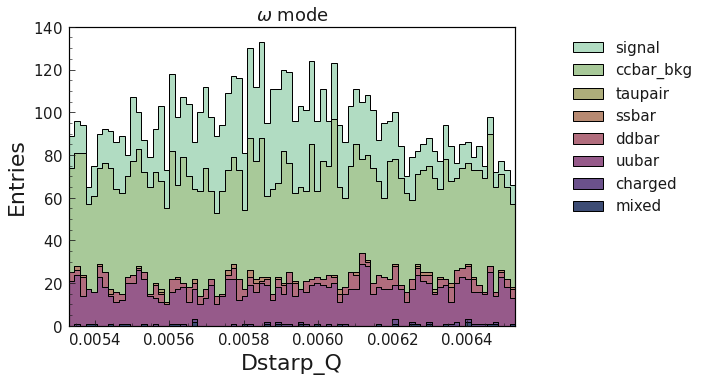

<Figure size 576x396 with 0 Axes>

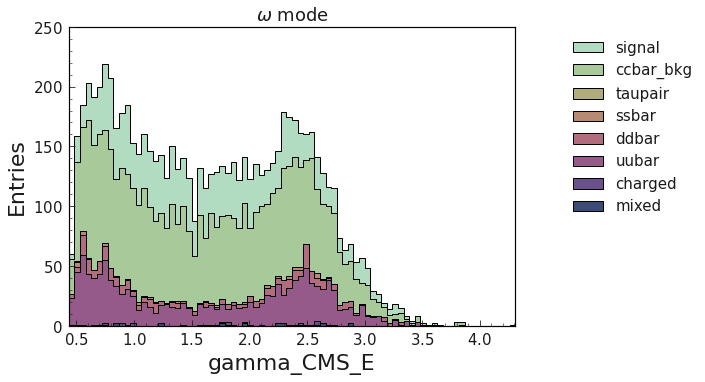

<Figure size 576x396 with 0 Axes>

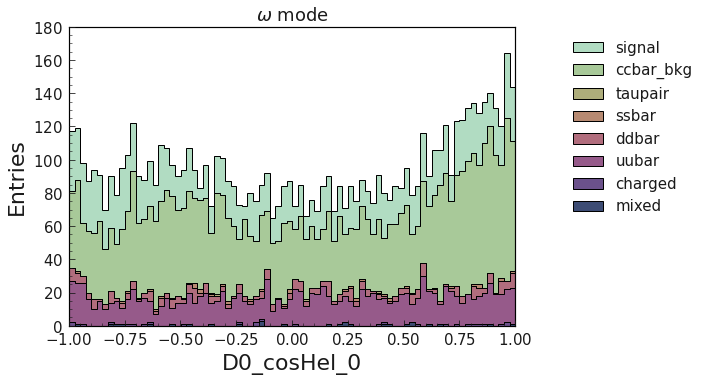

<Figure size 576x396 with 0 Axes>

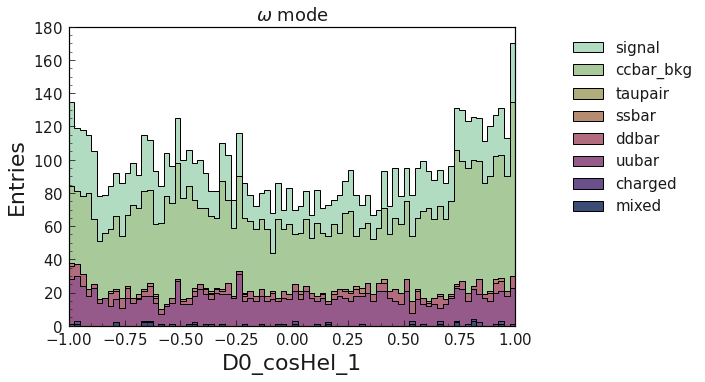

<Figure size 576x396 with 0 Axes>

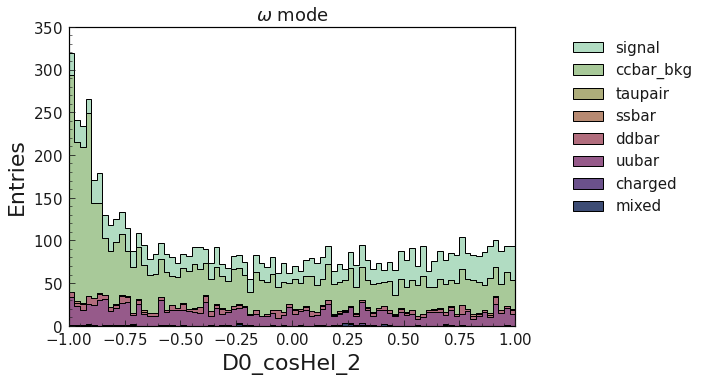

<Figure size 576x396 with 0 Axes>

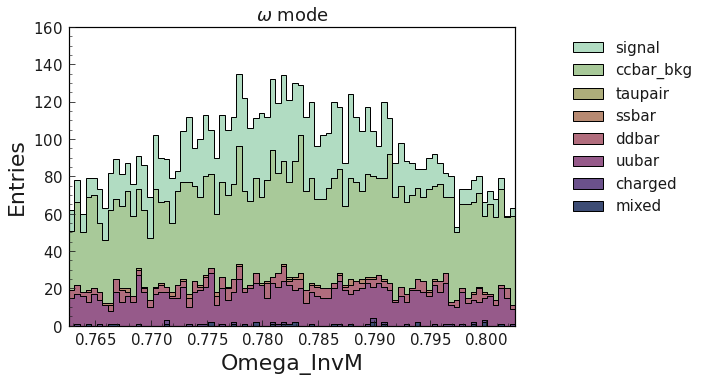

<Figure size 576x396 with 0 Axes>

In [7]:
D0_M_stack(all_stack='yes',option='beam',vector='omega',bins=80,add_base_filter = '( abs(Omega_M- 0.78265) < 0.02 ) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>3.0) && (gamma1_beamBackgroundSuppression>0.9 && gamma2_beamBackgroundSuppression>0.9)')
#D0_M_stack(vector='omega',bins=100)

In [10]:
D0_M_stack(all_stack='no',option='pid_0_5',vector='omega',bins=80,add_base_filter = '(gamma_E>0.55) && ( abs(Omega_M- 0.78265) < 0.020 ) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.7) ')
#D0_M_stack(vector='omega',bins=100)

(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal==1) && (gamma_E>0.55) && ( abs(Omega_M- 0.78265) < 0.020 ) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.7) 
(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal!=1) && (gamma_E>0.55) && ( abs(Omega_M- 0.78265) < 0.020 ) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.7) 
['D0_M', 'Dstarp_Q', 'gamma_CMS_E', 'D0_cosHel_0', 'D0_cosHel_1', 'gamma_E', 'Dstarp_CMS_p', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Omega_InvM', 'gamma1_beamBackgroundSuppression']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root


runtime_error: Template method resolution failed:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree omega
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree omega
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree omega

(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal==1) && ( abs(Omega_M- 0.78265) < 0.015 ) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.7) 
(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal!=1) && ( abs(Omega_M- 0.78265) < 0.015 ) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.7) 
['D0_M', 'Omega_InvM', 'gamma1_beamBackgroundSuppression']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root
true = 3415
0.004999999999999999


<Figure size 576x396 with 0 Axes>

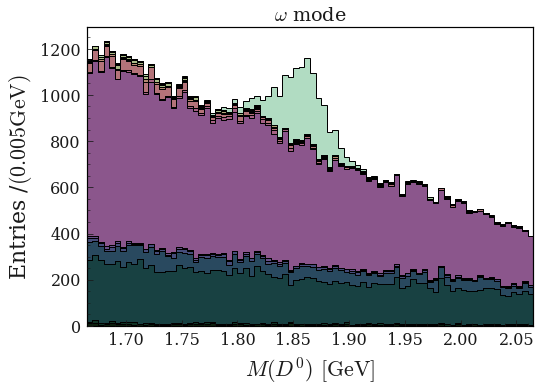

0.000577189335909789


<Figure size 576x396 with 0 Axes>

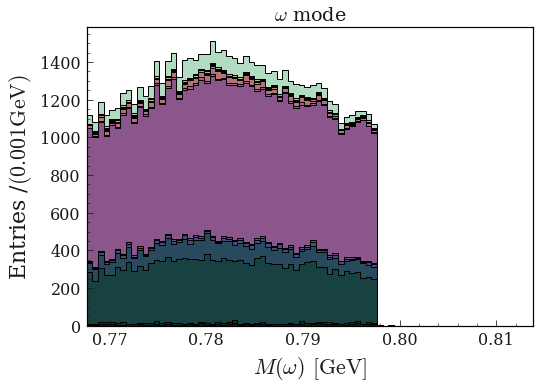

<Figure size 576x396 with 0 Axes>

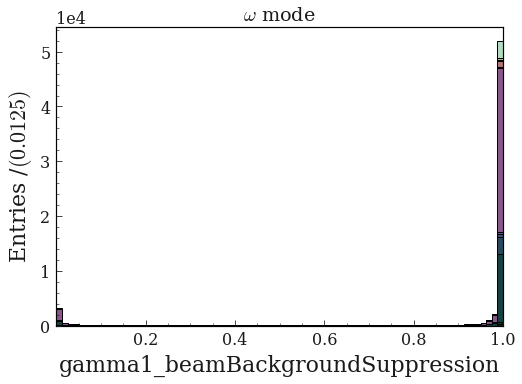

<Figure size 576x396 with 0 Axes>

In [32]:
D0_M_stack(all_stack='yes',option='pid_0_5',vector='omega',bins=80,add_base_filter = '( abs(Omega_M- 0.78265) < 0.015 ) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.7) ')
#D0_M_stack(vector='omega',bins=100)

(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal==1) && abs(Omega_InvM - 0.78265)< 0.04 && Dstarp_Q>0 && Dstarp_CMS_p<5.5 && Dstarp_CMS_p>1.5
(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal!=1) && abs(Omega_InvM - 0.78265)< 0.04 && Dstarp_Q>0 && Dstarp_CMS_p<5.5 && Dstarp_CMS_p>1.5
['D0_M', 'Dstarp_Q', 'gamma_E', 'Dstarp_CMS_p', 'Omega_InvM', 'gamma1_beamBackgroundSuppression']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root
true = 6836
0.004999999999999999


<Figure size 576x396 with 0 Axes>

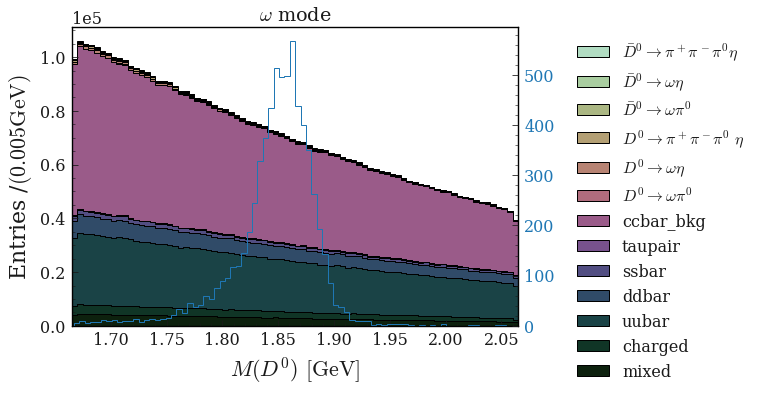

0.00025535672903060914


<Figure size 576x396 with 0 Axes>

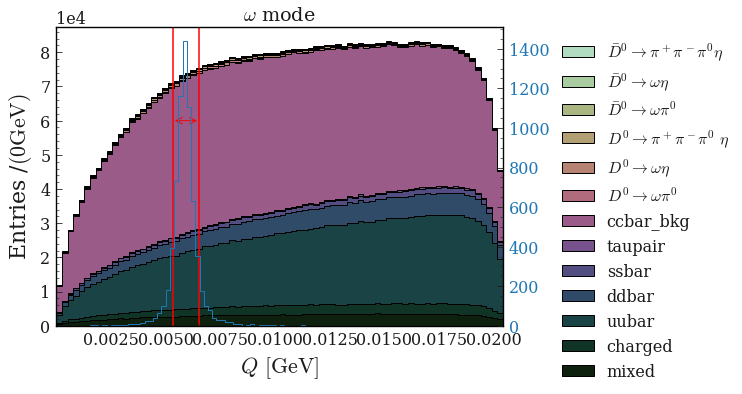

0.06406973481178284


<Figure size 576x396 with 0 Axes>

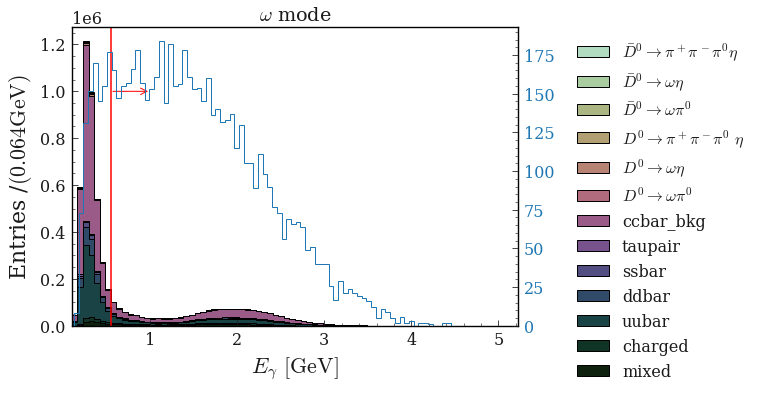

0.044255510334611156


<Figure size 576x396 with 0 Axes>

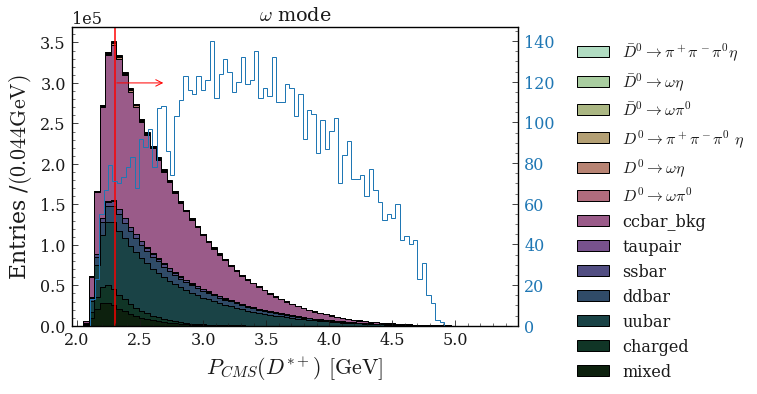

0.0009999992800982516


<Figure size 576x396 with 0 Axes>

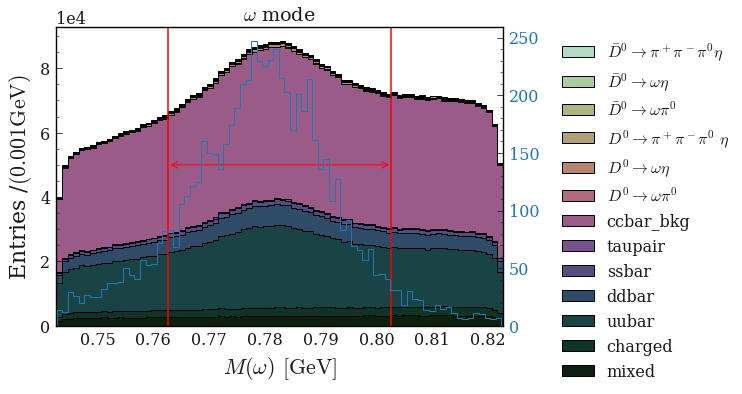

<Figure size 576x396 with 0 Axes>

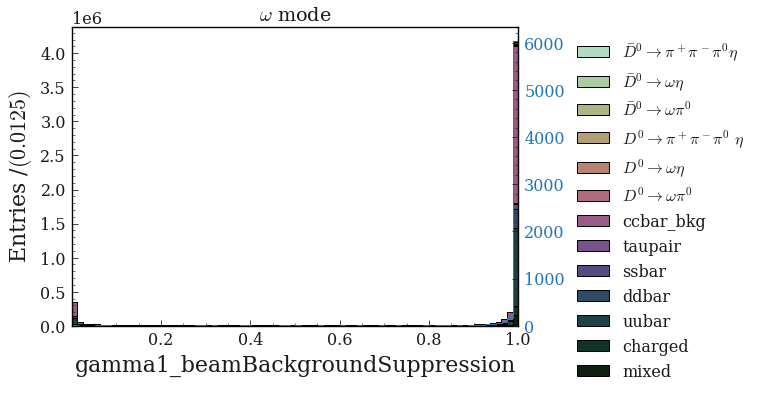

<Figure size 576x396 with 0 Axes>

In [17]:
D0_M_stack(all_stack='no',option='pid_0_5',vector='omega',bins=80,add_base_filter = 'abs(Omega_InvM - 0.78265)< 0.04 && Dstarp_Q>0 && Dstarp_CMS_p<5.5 && Dstarp_CMS_p>1.5')
#D0_M_stack(vector='omega',bins=100)

In [13]:
D0_M_stack(all_stack='no',option='pid_0_5',vector='omega',bins=80,add_base_filter = '(abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.3) ')
#D0_M_stack(vector='omega',bins=100)

(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal==1) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.3) 
(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal!=1) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.3) 
['D0_M', 'Dstarp_CMS_p', 'Dstarp_Q', 'gamma_CMS_E', 'gamma_E', 'gamma_clusterSecondMoment', 'Pi0_Prob', '__ncandidates__', '__experiment__', '__run__', '__event__', 'D0_cosHel_0', 'D0_cosHel_1', 'Omega_InvM', 'gamma1_beamBackgroundSuppression']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/train_v1_yes_signal_ccbar_recon_output_0*.root


runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "Pi0_Prob" is not in a dataset and is not a custom column been defined.

In [ ]:
D0_M_stack(all_stack='yes',option='naive',vector='omega',bins=80,add_base_filter = '( abs(Omega_M- 0.78265) < 0.02 ) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.8) && (gamma1_beamBackgroundSuppression>0.6 && gamma2_beamBackgroundSuppression>0.6)')


(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal==1) && (Dstarp_Q>0) && (Dstarp_CMS_p<5.5)
(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal!=1) && (Dstarp_Q>0) && (Dstarp_CMS_p<5.5)
['D0_M', 'Dstarp_CMS_p', 'Dstarp_Q', 'D0_cosHel_0', 'D0_cosHel_1', 'D0_cosHel_2', 'Omega_InvM']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/tara_ccbar_recon_output_0*.root
true = 3976


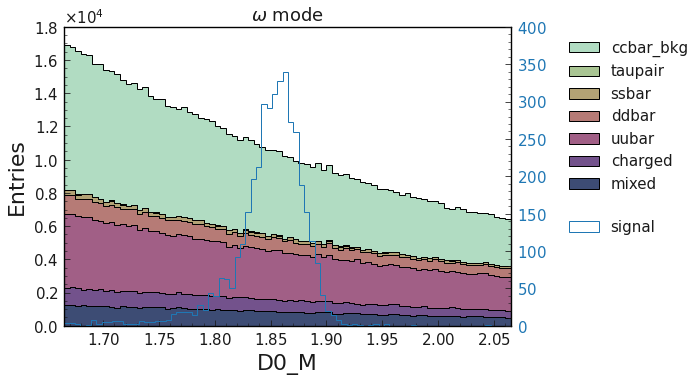

<Figure size 576x396 with 0 Axes>

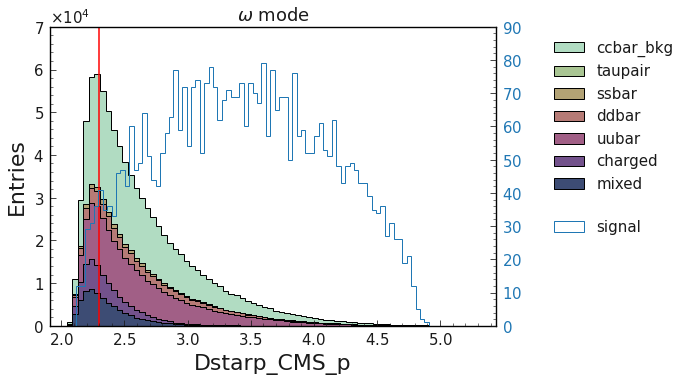

<Figure size 576x396 with 0 Axes>

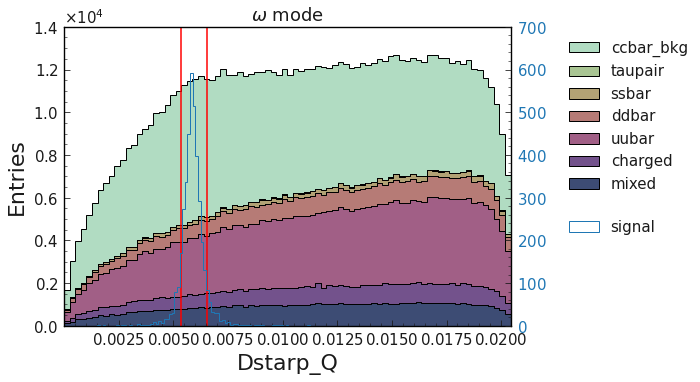

<Figure size 576x396 with 0 Axes>

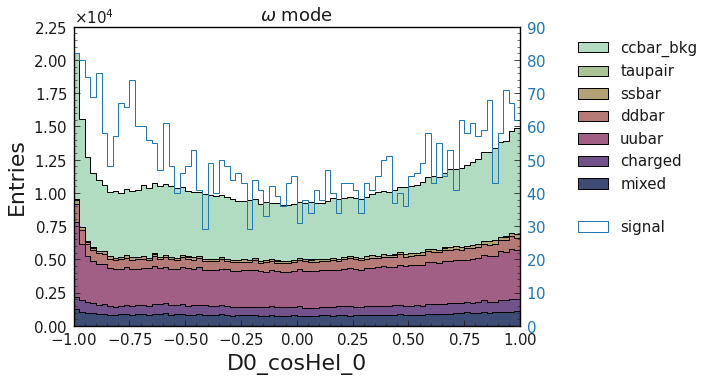

<Figure size 576x396 with 0 Axes>

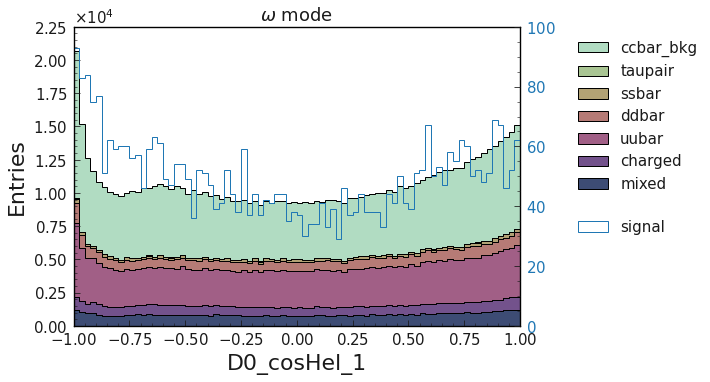

<Figure size 576x396 with 0 Axes>

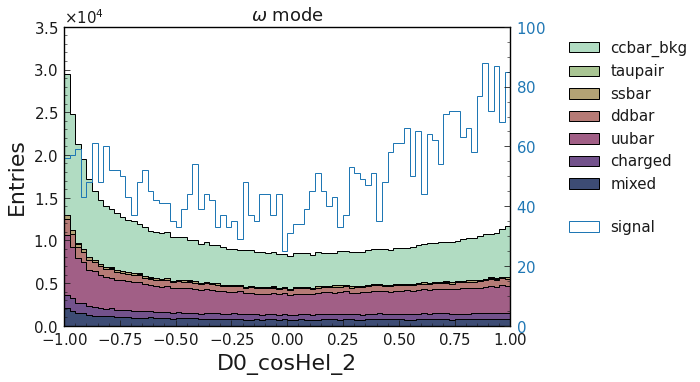

<Figure size 576x396 with 0 Axes>

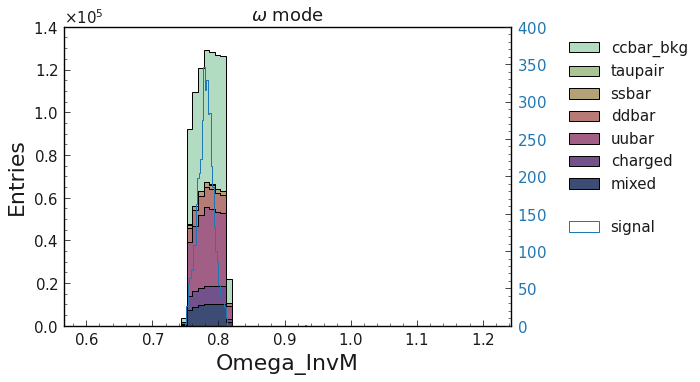

<Figure size 576x396 with 0 Axes>

In [27]:
D0_M_stack(all_stack='no',option='tara',vector='omega',bins=80,add_base_filter = '(Dstarp_Q>0) && (Dstarp_CMS_p<5.5)')


(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal==1) && abs(antiKstar_InvM-0.89555)<0.22 && (Dstarp_Q>0) && (Dstarp_CMS_p<5.5) && (Dstarp_CMS_p>=1.5)
(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal!=1) && abs(antiKstar_InvM-0.89555)<0.22 && (Dstarp_Q>0) && (Dstarp_CMS_p<5.5) && (Dstarp_CMS_p>=1.5)
['D0_M', 'Dstarp_Q', 'gamma_E', 'Dstarp_CMS_p', 'antiKstar_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root
true = 22314
0.004999999999999999


<Figure size 576x396 with 0 Axes>

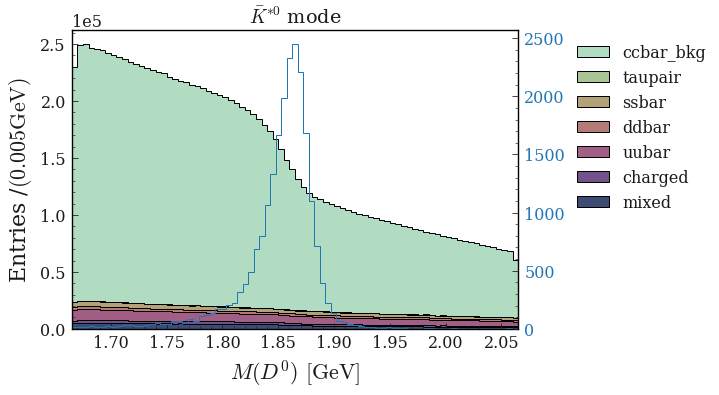

0.00025536715984344485


<Figure size 576x396 with 0 Axes>

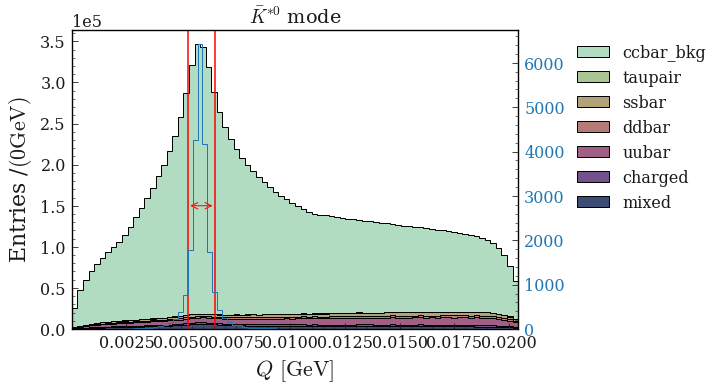

0.06098927736282349


<Figure size 576x396 with 0 Axes>

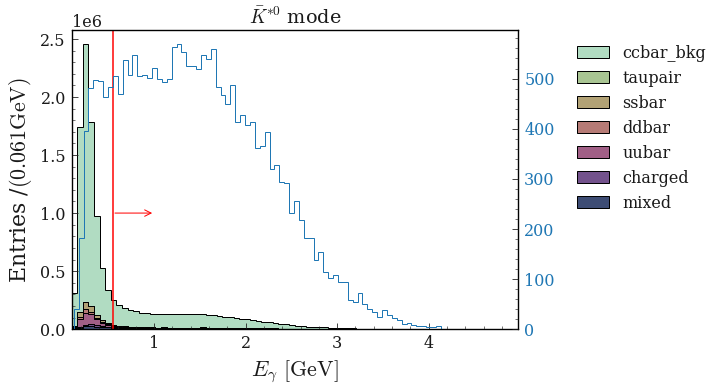

0.04620490740802604


<Figure size 576x396 with 0 Axes>

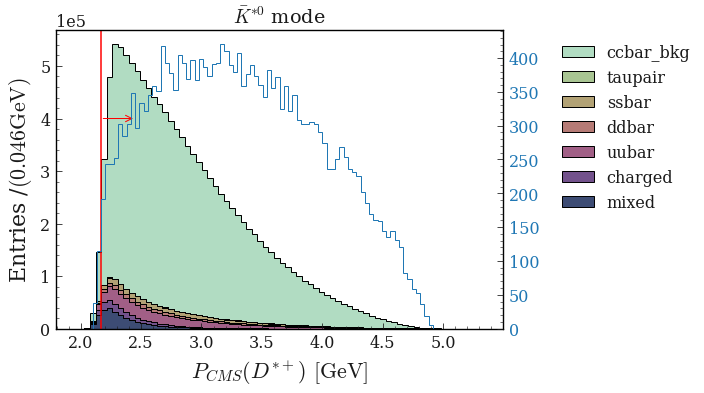

0.005499998590176665


<Figure size 576x396 with 0 Axes>

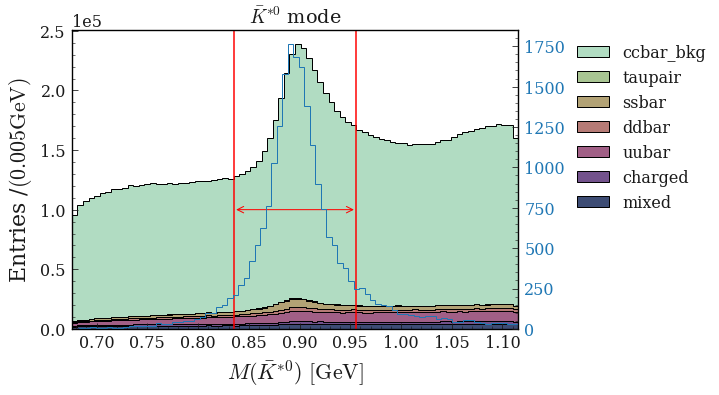

0.025


<Figure size 576x396 with 0 Axes>

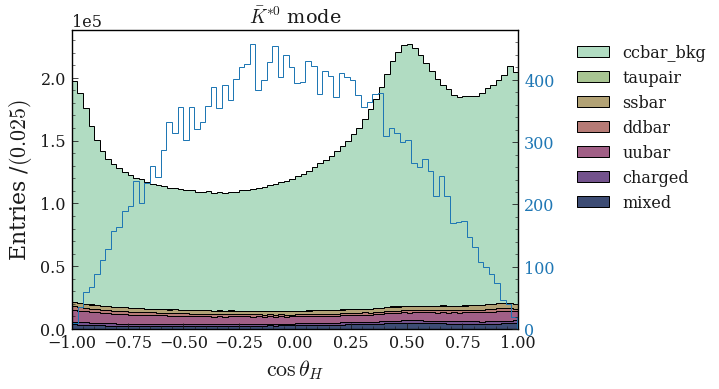

<Figure size 576x396 with 0 Axes>

In [19]:
#D0_M_stack(vector='antiKstar',bins=100)
D0_M_stack(all_stack='no',option='pid_0_5',vector='antiKstar',bins=80,add_base_filter = 'abs(antiKstar_InvM-0.89555)<0.22 && (Dstarp_Q>0) && (Dstarp_CMS_p<5.5) && (Dstarp_CMS_p>=1.5)')




(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal==1) && (gamma_E>0.55) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.17)
(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal!=1) && (gamma_E>0.55) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.17)
['D0_M', 'antiKstar_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root
true = 16247
0.004999999999999999


<Figure size 576x396 with 0 Axes>

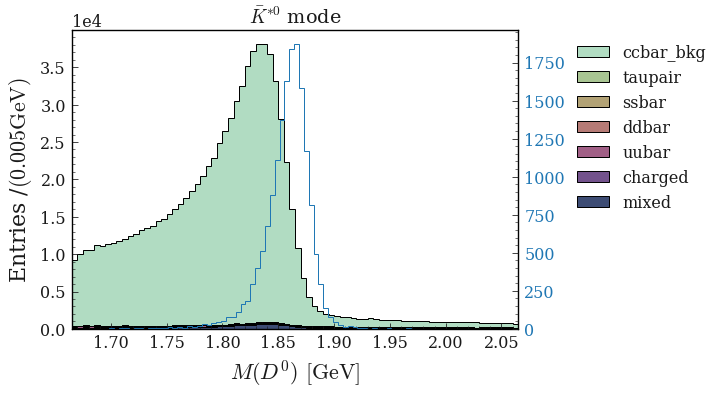

0.009971233460573587


<Figure size 576x396 with 0 Axes>

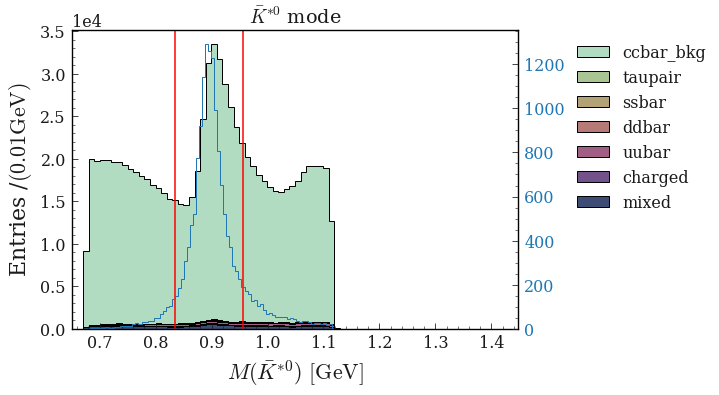

0.025


<Figure size 576x396 with 0 Axes>

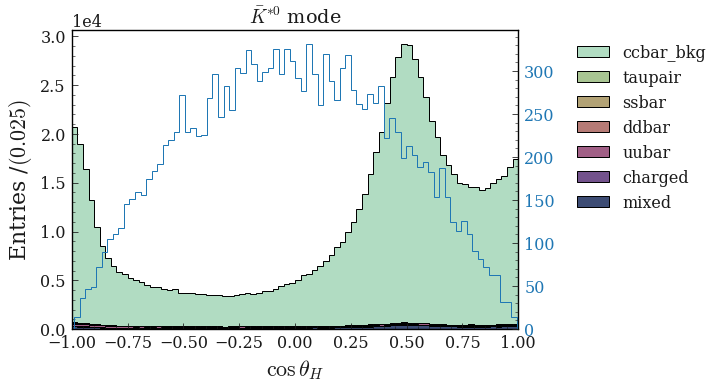

<Figure size 576x396 with 0 Axes>

In [44]:
#D0_M_stack(vector='antiKstar',bins=100)
D0_M_stack(all_stack='no',option='pid_0_5',vector='antiKstar',bins=80,add_base_filter = '(gamma_E>0.55) && (abs(Dstarp_Q-0.00593)<0.0006) && (Dstarp_CMS_p>2.17)')



(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal==1) && (Dstarp_Q>0) && (Dstarp_CMS_p<5)
(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && (Dstarp_isSignal!=1) && (Dstarp_Q>0) && (Dstarp_CMS_p<5)
['D0_M', 'Dstarp_CMS_p', 'Dstarp_Q', 'Rho_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/tara_ccbar_recon_output_0*.root
true = 775


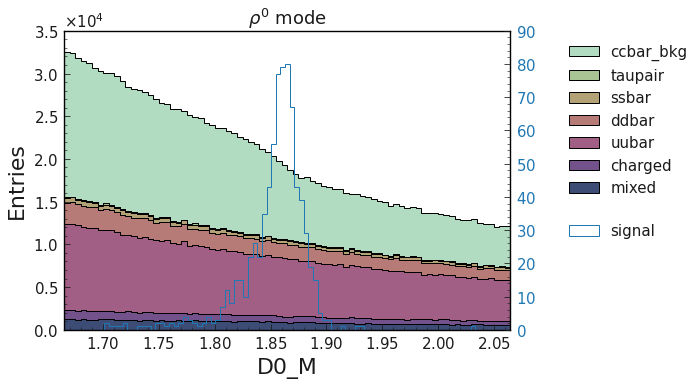

<Figure size 576x396 with 0 Axes>

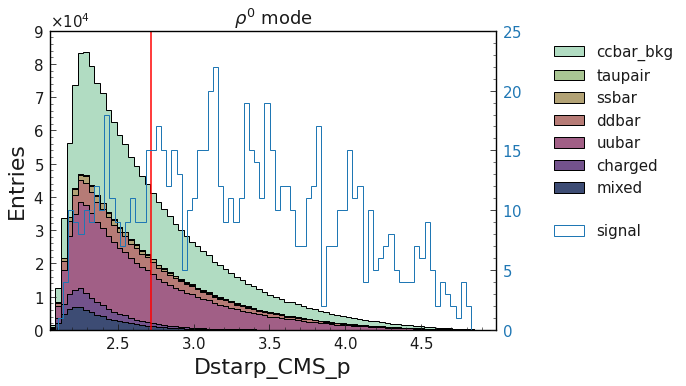

<Figure size 576x396 with 0 Axes>

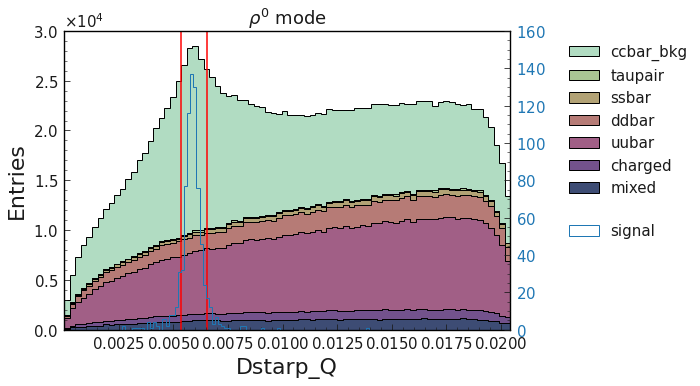

<Figure size 576x396 with 0 Axes>

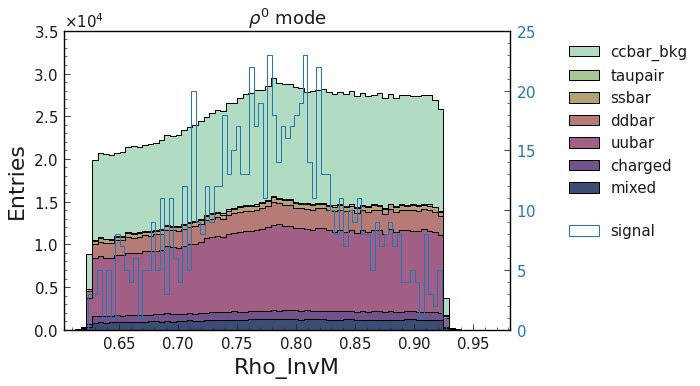

<Figure size 576x396 with 0 Axes>

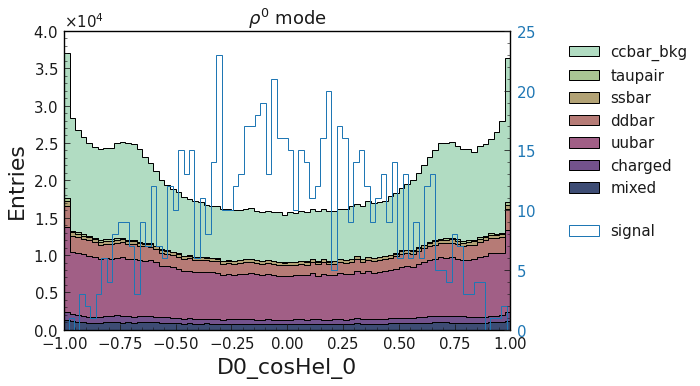

<Figure size 576x396 with 0 Axes>

In [26]:
D0_M_stack(all_stack='no',option='pre',vector='rho',bins=80,add_base_filter = '(Dstarp_Q>0) && (Dstarp_CMS_p<5)')

(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal==1) && abs(Rho_InvM-0.77526)<0.245 && (Dstarp_CMS_p<5.5) && (Dstarp_Q>0) && (gamma_E<4.5)
(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal!=1) && abs(Rho_InvM-0.77526)<0.245 && (Dstarp_CMS_p<5.5) && (Dstarp_Q>0) && (gamma_E<4.5)
['gamma_E', 'Rho_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root
true = 1407
0.054996542930603035


<Figure size 576x396 with 0 Axes>

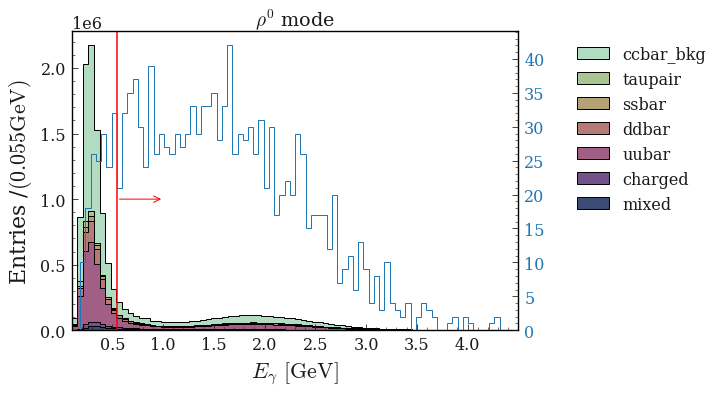

0.006124998550105426


<Figure size 576x396 with 0 Axes>

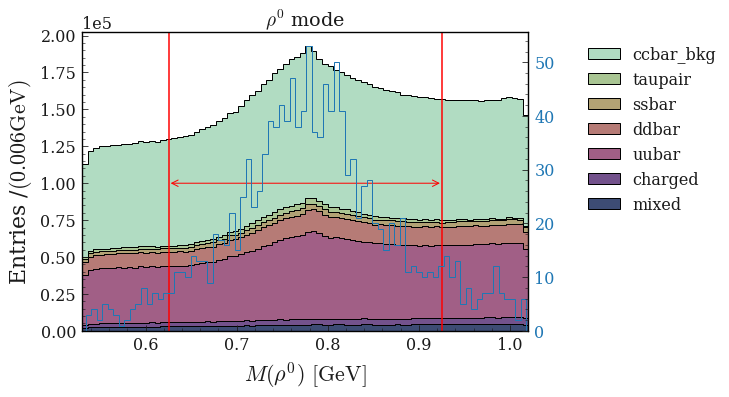

0.025


<Figure size 576x396 with 0 Axes>

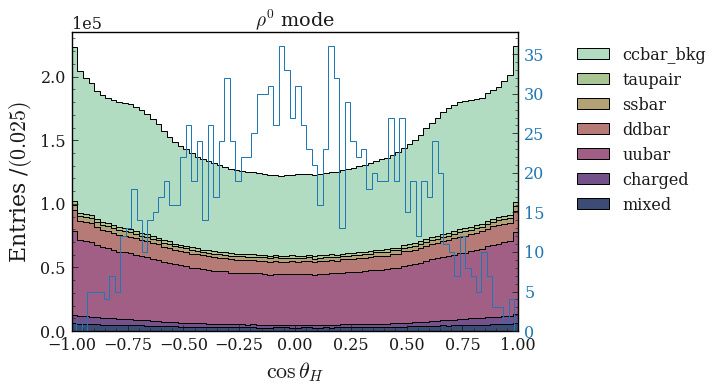

<Figure size 576x396 with 0 Axes>

In [9]:
D0_M_stack(all_stack='no',option='pid_0_5',vector='rho',bins=80,add_base_filter = 'abs(Rho_InvM-0.77526)<0.245 && (Dstarp_CMS_p<5.5) && (Dstarp_Q>0) && (gamma_E<4.5)')

(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal==1) && ( abs(Rho_M- 0.77526) < 0.150 ) &&  gamma_E>0.55 & Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006
(D0_M>1.665 && D0_M<2.065) && (Dstarp_isSignal!=1) && ( abs(Rho_M- 0.77526) < 0.150 ) &&  gamma_E>0.55 & Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006
['D0_M', 'Rho_InvM', 'D0_cosHel_0']
/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root
true = 705
0.004999999999999999


<Figure size 576x396 with 0 Axes>

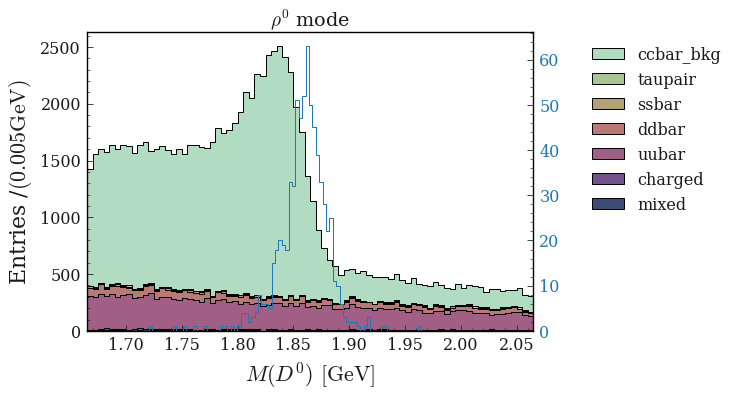

0.0037499038679868883


<Figure size 576x396 with 0 Axes>

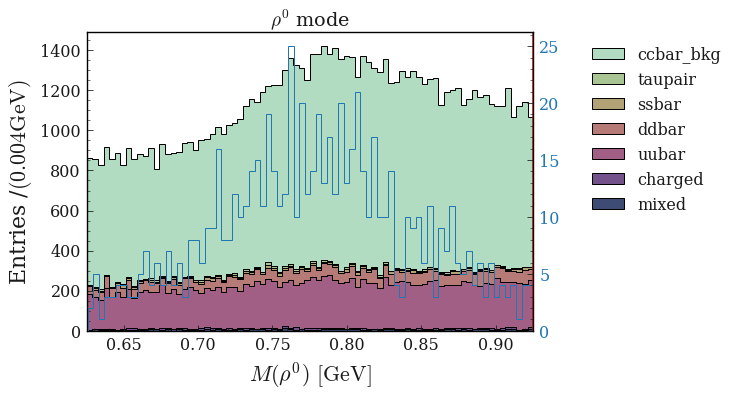

0.025


<Figure size 576x396 with 0 Axes>

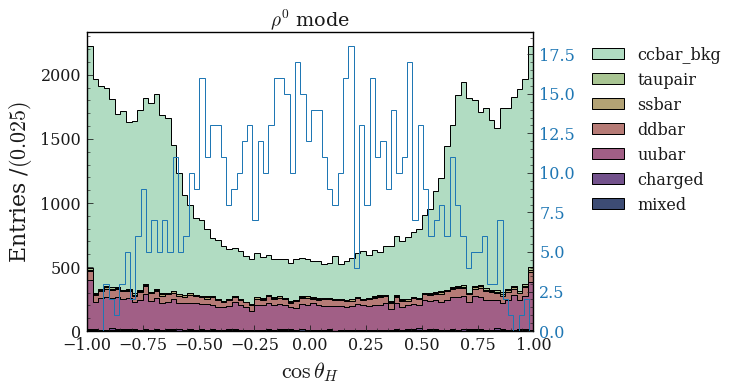

<Figure size 576x396 with 0 Axes>

In [50]:
D0_M_stack(all_stack='no',option='pid_0_5',vector='rho',bins=80,add_base_filter ='( abs(Rho_M- 0.77526) < 0.150 ) &&  gamma_E>0.55 & Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006' )

['D0_M', 'Dstarp_delM', 'gamma_E', 'gamma_CMS_E']
total = 48222
true = 41586
bkg = 6636
true fraction = 0.8623864626104267
figure of merit = 189.37582589685837


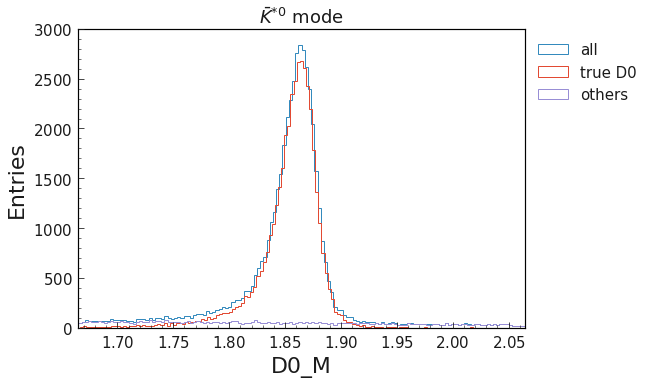

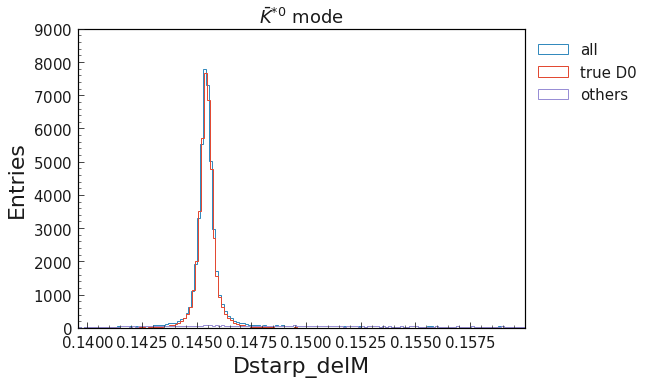

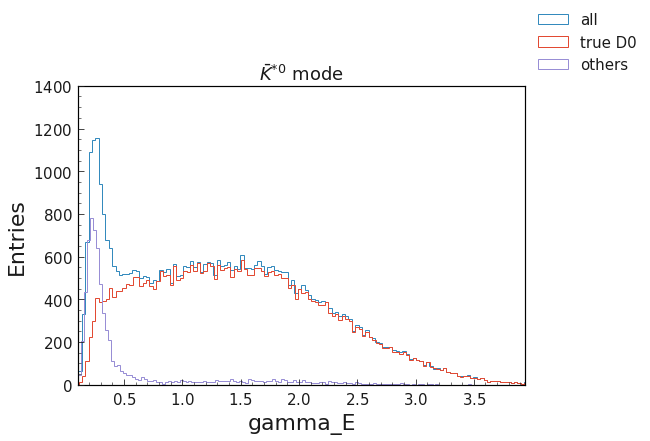

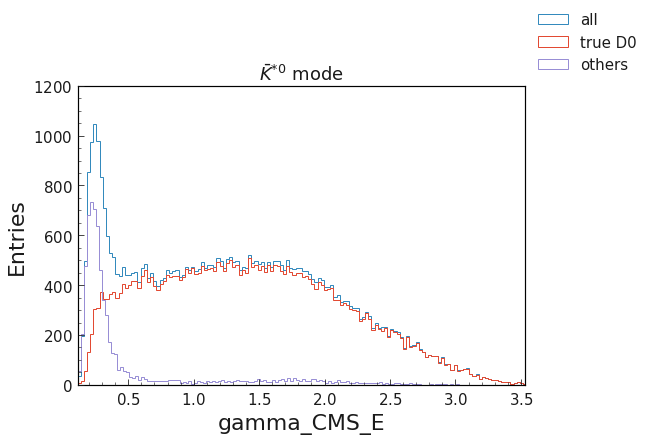

/cvmfs/belle.cern.ch/el7/externals/v01-11-00/Linux_x86_64/common/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/belle.cern.ch/el7/externals/v01-11-00/Linux_x86_64/common/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

<Figure size 432x432 with 0 Axes>

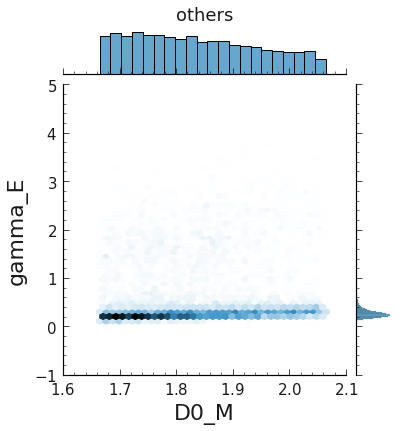

In [135]:
pd_df, pd_df_true, pd_df_false= D0_M('naive_signal_recon_antiKstar.root', 'antiKstar', 'naive_signal_antiKstar_M_bkg_detail_',bins=140)
sns.jointplot(pd_df_true.D0_M, pd_df_true.gamma_E, kind='hex')
plt.title("true",y=1.2)
bp.save("/home/belle2/jaeyoung/plots/antiKstar/Dstarp/gamma_D0M_joint_true.png")
plt.clf() 
sns.jointplot(pd_df_false.D0_M, pd_df_false.gamma_E, kind='hex')
plt.title("others", y=1.2)
bp.save("/home/belle2/jaeyoung/plots/antiKstar/Dstarp/gamma_D0M_joint_false.png")

/cvmfs/belle.cern.ch/el7/externals/v01-11-00/Linux_x86_64/common/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


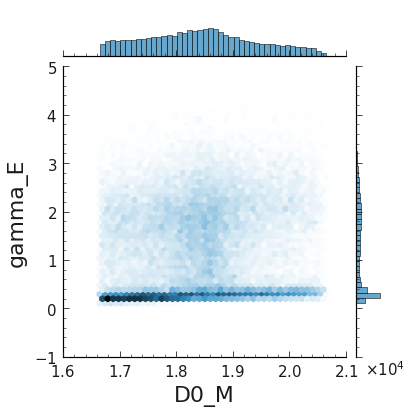

In [112]:
sns.jointplot(pd_df_false.D0_M, pd_df_false.gamma_E, kind='hex')

['D0_M', 'Dstarp_delM', 'gamma_E', 'gamma_CMS_E']
total = 117498
true = 33640
bkg = 59821
true fraction = 0.28630274557864815
figure of merit = 110.03751533031219


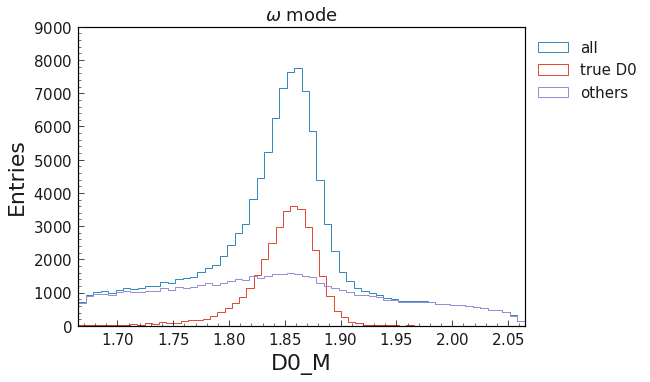

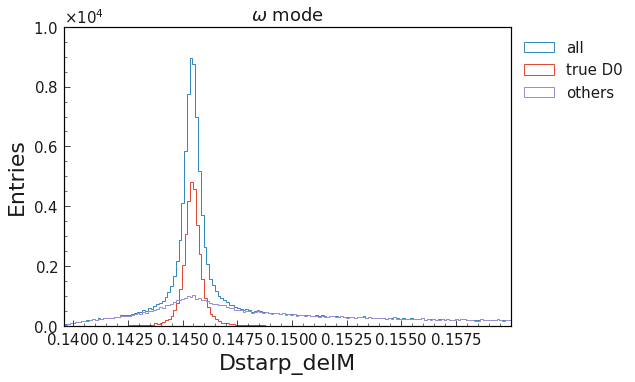

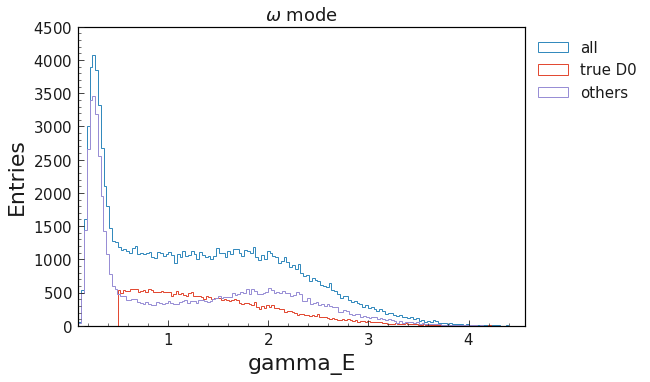

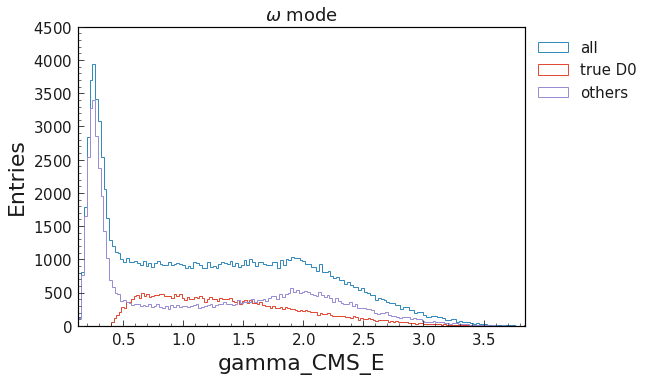

(            D0_M  Dstarp_delM   gamma_E  gamma_CMS_E
 0       1.750875     0.153505  0.328393     0.284477
 1       1.703718     0.156202  0.366312     0.292091
 2       1.850078     0.145330  0.734722     0.875497
 3       1.862347     0.145640  2.085407     2.123198
 4       1.867413     0.145203  1.262291     1.055149
 ...          ...          ...       ...          ...
 117493  1.861969     0.144788  1.604339     1.683758
 117494  1.844998     0.145556  1.576612     1.309288
 117495  1.840865     0.146101  0.489651     0.609893
 117496  2.011331     0.146833  0.432165     0.399523
 117497  1.768628     0.148674  1.694179     2.031444
 
 [117498 rows x 4 columns],
            D0_M  Dstarp_delM   gamma_E  gamma_CMS_E
 0      1.850078     0.145330  0.734722     0.875497
 1      1.867413     0.145203  1.262291     1.055149
 2      1.856956     0.145508  1.545100     1.364871
 3      1.879438     0.145667  0.576776     0.661788
 4      1.782159     0.145277  1.698974     1.430258
 ...

<Figure size 576x396 with 0 Axes>

In [18]:
D0_M('naive_signal_recon_omega.root', 'omega', '/test/test_',bins=60)

['D0_M', 'Dstarp_delM', 'gamma_E']
total = 77749
true = 48414
bkg = 29335
true fraction = 0.6226961118470977
figure of merit = 173.62951810958123


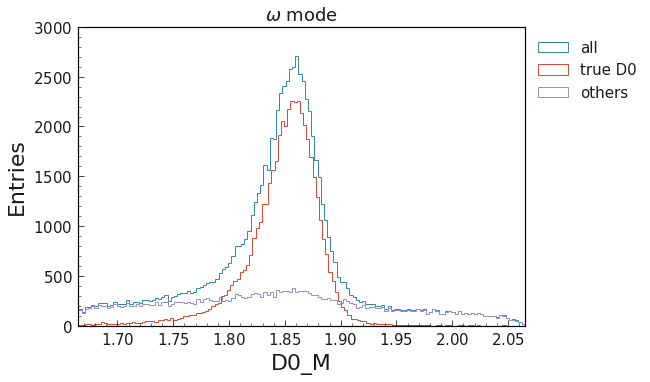

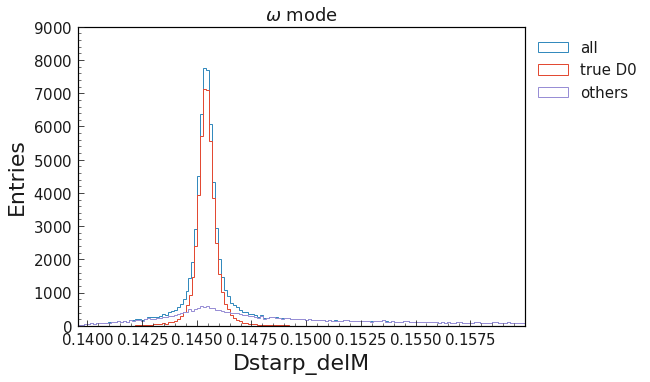

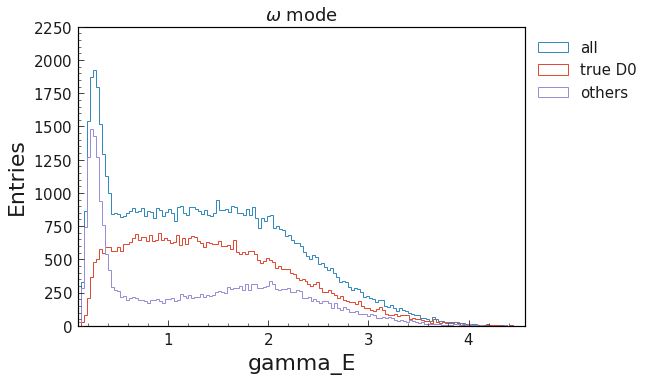

(           D0_M  Dstarp_delM   gamma_E
 0      1.750875     0.153505  0.328393
 1      1.862347     0.145640  2.085407
 2      1.867413     0.145203  1.262291
 3      1.838366     0.144936  0.906079
 4      1.815056     0.145420  1.940270
 ...         ...          ...       ...
 77744  1.861969     0.144788  1.604339
 77745  1.844998     0.145556  1.576612
 77746  1.840865     0.146101  0.489651
 77747  2.011331     0.146833  0.432165
 77748  1.768628     0.148674  1.694179
 
 [77749 rows x 3 columns],
            D0_M  Dstarp_delM   gamma_E
 0      1.862347     0.145640  2.085407
 1      1.867413     0.145203  1.262291
 2      1.838366     0.144936  0.906079
 3      1.815056     0.145420  1.940270
 4      1.856956     0.145508  1.545100
 ...         ...          ...       ...
 48409  1.845090     0.145679  1.598823
 48410  1.855700     0.145430  0.926167
 48411  1.861969     0.144788  1.604339
 48412  1.844998     0.145556  1.576612
 48413  1.840865     0.146101  0.489651
 
 [48414 r

<Figure size 576x396 with 0 Axes>

In [106]:
D0_M('naive_signal_recon_omega.root', 'omega', 'pre_recon_omega_M_bkg_detail_',bins=140)

['D0_M', 'Dstarp_delM', 'gamma_E', 'gamma_CMS_E']
total = 88033
true = 65952
bkg = 22081
true fraction = 0.7491736053525383
figure of merit = 222.28247258884494


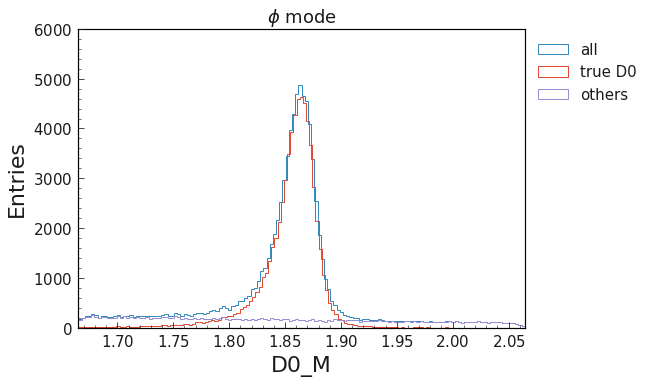

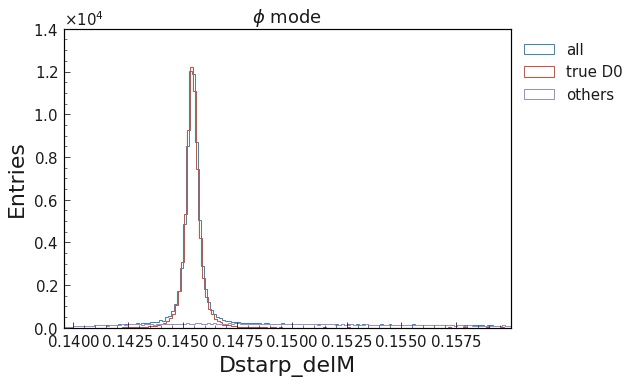

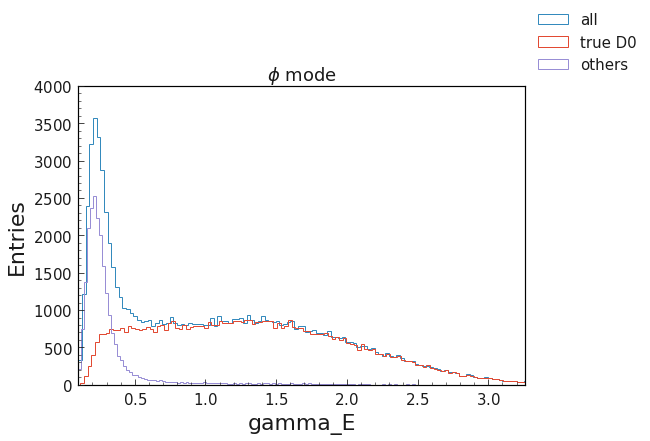

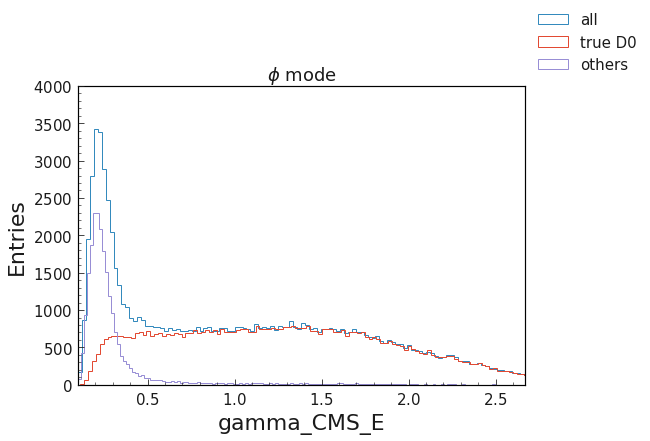

(           D0_M  Dstarp_delM   gamma_E  gamma_CMS_E
 0      1.918935     0.143812  0.317829     0.286351
 1      1.861620     0.145877  1.034091     1.185727
 2      1.743980     0.147696  1.093497     0.911990
 3      1.837533     0.144998  1.093505     0.911997
 4      1.831841     0.145172  1.634165     1.420773
 ...         ...          ...       ...          ...
 88028  1.855595     0.145759  1.969814     1.712284
 88029  1.867107     0.145626  1.133371     1.178581
 88030  1.873216     0.145561  1.353663     1.109179
 88031  1.851307     0.145077  1.082698     0.981007
 88032  1.830229     0.156262  0.206679     0.195496
 
 [88033 rows x 4 columns],
            D0_M  Dstarp_delM   gamma_E  gamma_CMS_E
 0      1.918935     0.143812  0.317829     0.286351
 1      1.861620     0.145877  1.034091     1.185727
 2      1.837533     0.144998  1.093505     0.911997
 3      1.831841     0.145172  1.634165     1.420773
 4      1.836867     0.145158  2.251667     2.188541
 ...         ... 

<Figure size 576x396 with 0 Axes>

In [124]:
D0_M('naive_signal_recon_phi.root', 'phi', 'multi_naive_signal_phi_',bins=140)

['D0_M', 'Dstarp_delM', 'gamma_E', 'gamma_CMS_E']
total = 163723
true = 126098
bkg = 37625
true fraction = 0.7701911154816367
figure of merit = 311.6401117956471


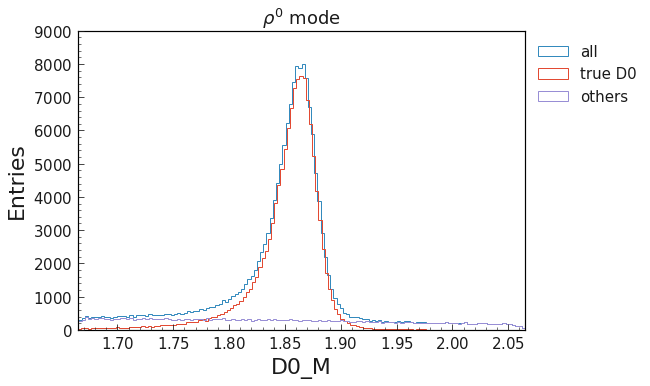

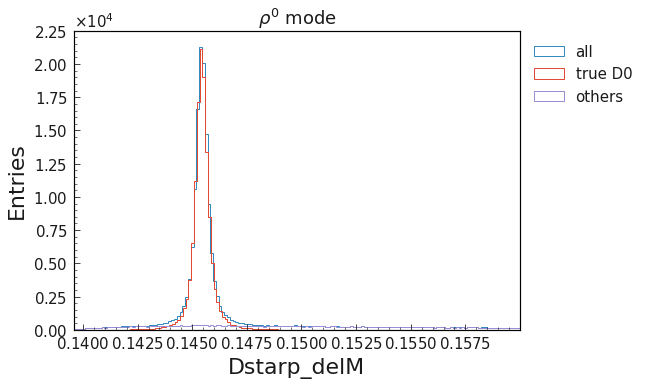

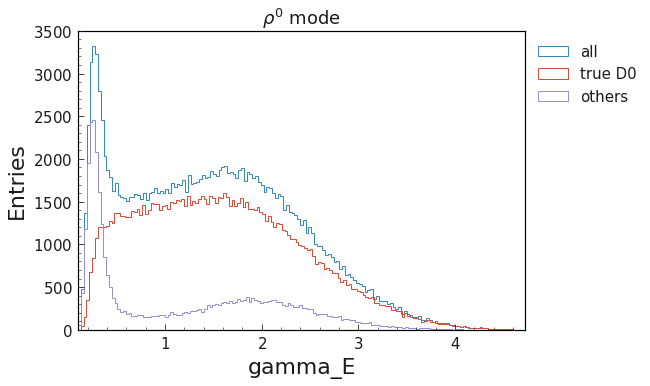

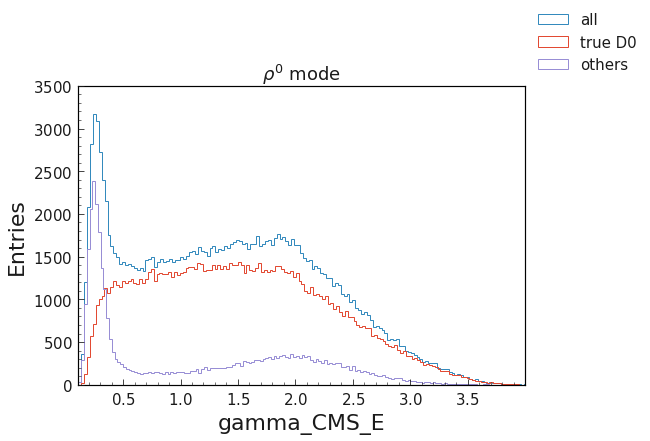

(            D0_M  Dstarp_delM   gamma_E  gamma_CMS_E
 0       2.041639     0.153644  0.412999     0.442081
 1       1.747448     0.143567  0.239449     0.200575
 2       1.827830     0.145268  0.500293     0.514387
 3       1.836655     0.145464  1.623023     1.564582
 4       1.866893     0.145638  0.890936     0.926125
 ...          ...          ...       ...          ...
 163718  1.794493     0.145836  0.870226     0.722031
 163719  1.970654     0.159664  2.521228     2.066938
 163720  1.863348     0.144773  2.996953     3.244382
 163721  1.874151     0.145333  1.285491     1.372989
 163722  1.778132     0.158936  2.397115     2.131818
 
 [163723 rows x 4 columns],
             D0_M  Dstarp_delM   gamma_E  gamma_CMS_E
 0       1.747448     0.143567  0.239449     0.200575
 1       1.827830     0.145268  0.500293     0.514387
 2       1.836655     0.145464  1.623023     1.564582
 3       1.866893     0.145638  0.890936     0.926125
 4       1.851606     0.145309  0.946610     1.02043

<Figure size 576x396 with 0 Axes>

In [8]:
D0_M('naive_signal_recon_rho.root', 'rho', 'multi_naive_signal_rho_',bins=140)

['D0_M', 'Dstarp_delM', 'gamma_E', 'gamma_CMS_E']
total = 102530
true = 82818
bkg = 19712
true fraction = 0.8077440749049059
figure of merit = 258.64212494385845


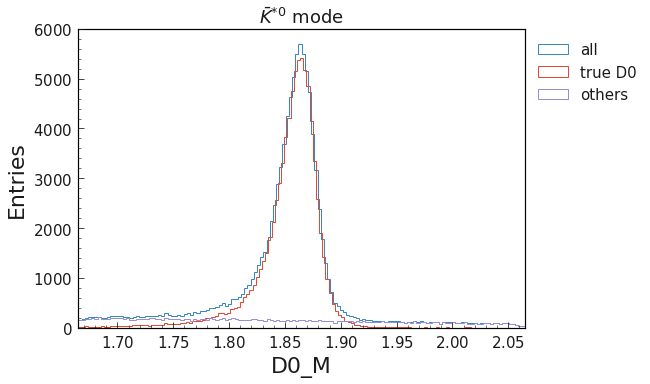

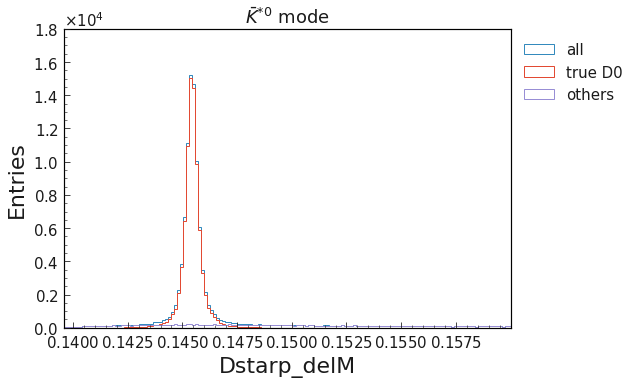

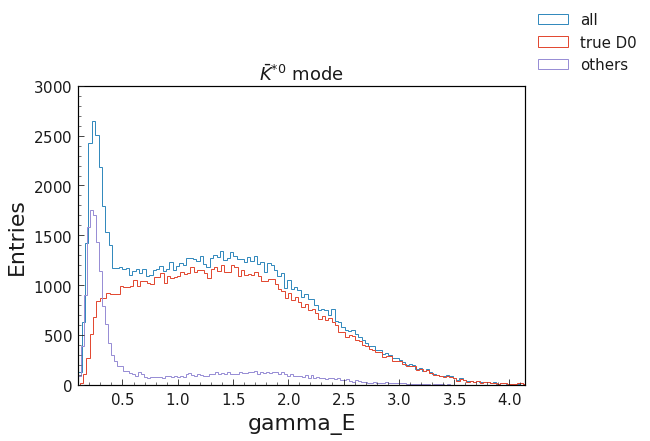

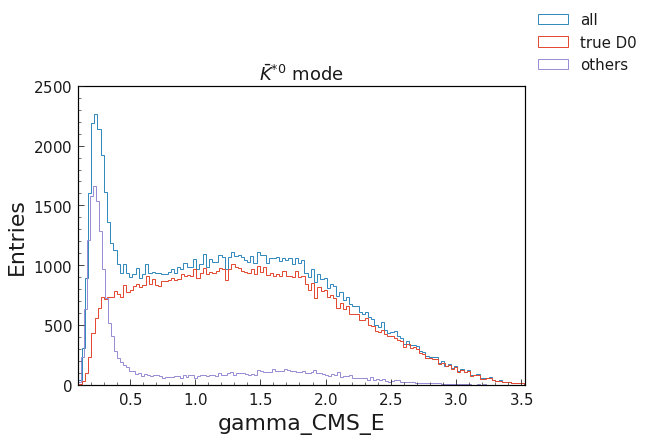

(            D0_M  Dstarp_delM   gamma_E  gamma_CMS_E
 0       1.771088     0.148894  0.152901     0.177874
 1       1.841879     0.145827  1.207997     1.204223
 2       1.852882     0.145058  0.928030     0.988190
 3       1.846772     0.145417  2.405529     2.008242
 4       1.829286     0.145105  4.028510     3.278993
 ...          ...          ...       ...          ...
 102525  1.963429     0.149865  0.385014     0.306284
 102526  1.676586     0.150756  2.434944     2.203362
 102527  1.874617     0.145528  2.046486     1.968860
 102528  1.858136     0.149587  1.017660     1.048136
 102529  1.821879     0.144707  1.148440     1.221881
 
 [102530 rows x 4 columns],
            D0_M  Dstarp_delM   gamma_E  gamma_CMS_E
 0      1.841879     0.145827  1.207997     1.204223
 1      1.852882     0.145058  0.928030     0.988190
 2      1.846772     0.145417  2.405529     2.008242
 3      1.829286     0.145105  4.028510     3.278993
 4      1.844985     0.145085  2.852011     2.349652
 ...

<Figure size 576x396 with 0 Axes>

input_line_85:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [5]:
D0_M('naive_signal_recon_antiKstar.root', 'antiKstar', 'multi_naive_signal_antiKstar_',bins=140)

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'D0_cosHel_1', 'gamma1_clusterE9E21', 'gamma2_clusterE9E21']
total = 161248
true = 62239
bkg = 99009
true fraction = 0.38598308196070646
efficiency = 0.06997722105916453
figure of merit = 154.9941967886295


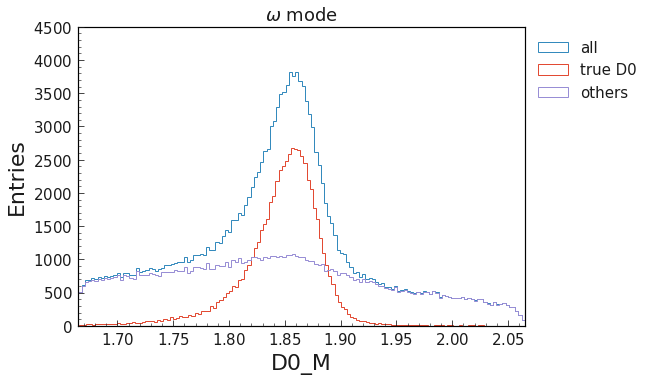

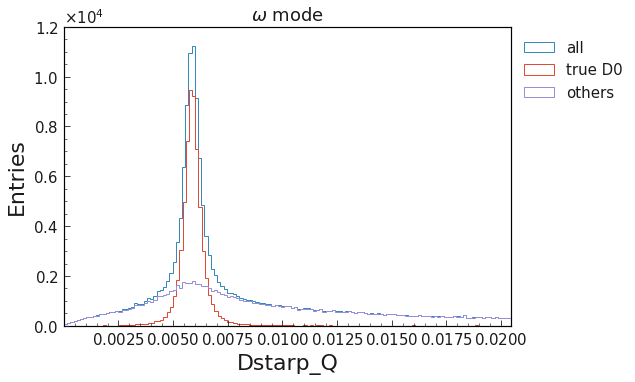

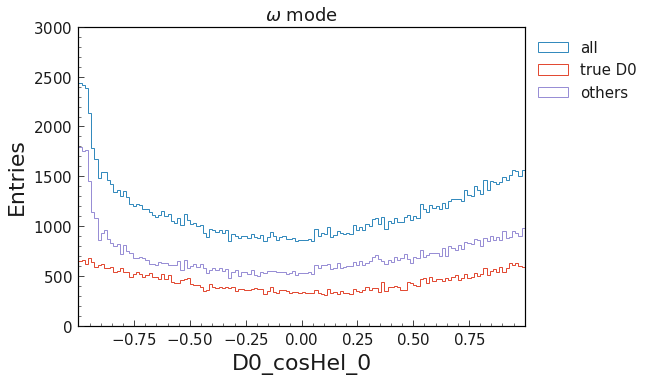

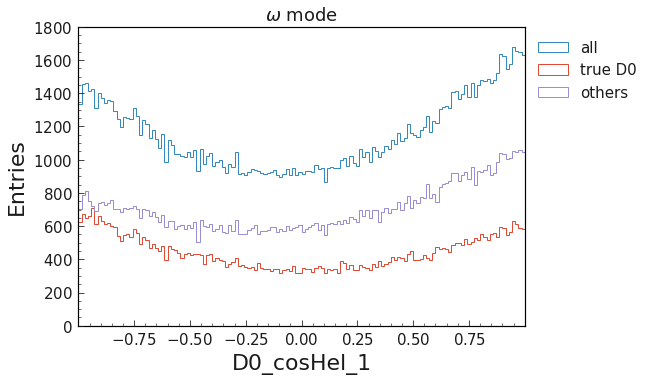

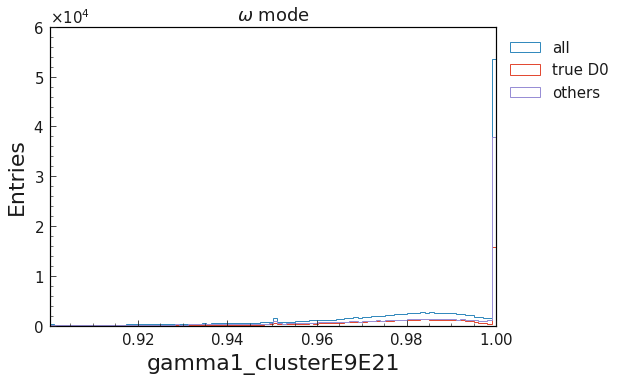

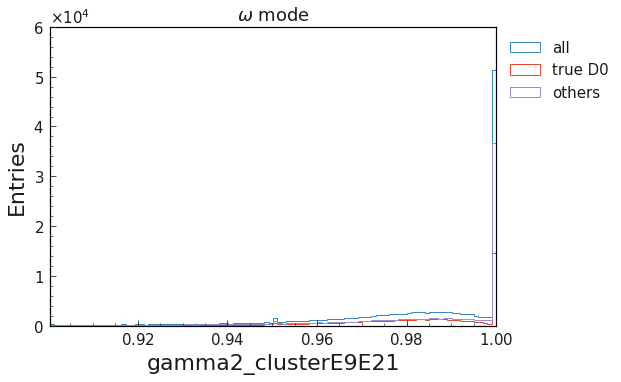

<Figure size 576x396 with 0 Axes>

In [136]:
D0_M('D0/pre_recon_omega_Emma.root', 'omega', 'pre_recon_omega_M_bkg_detail_',bins=140)

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'D0_cosHel_1', 'gamma1_clusterE9E21', 'gamma2_clusterE9E21']
total = 116943
true = 57229
bkg = 59714
true fraction = 0.489375165679006
efficiency = 0.06434432404111452
figure of merit = 167.35128131162855


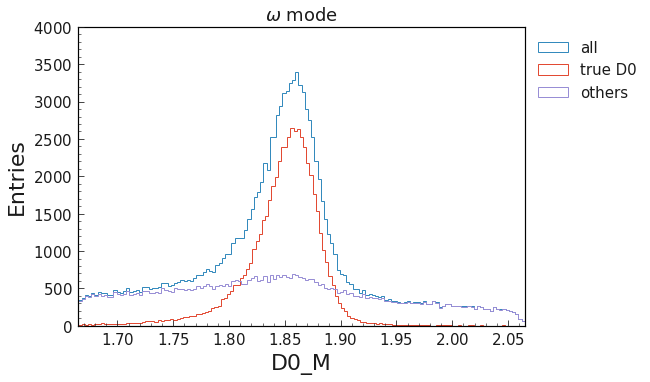

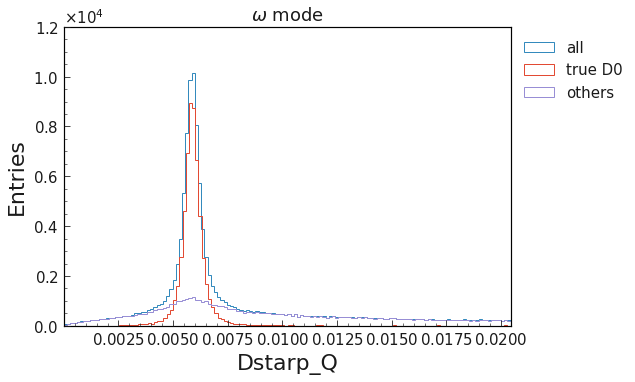

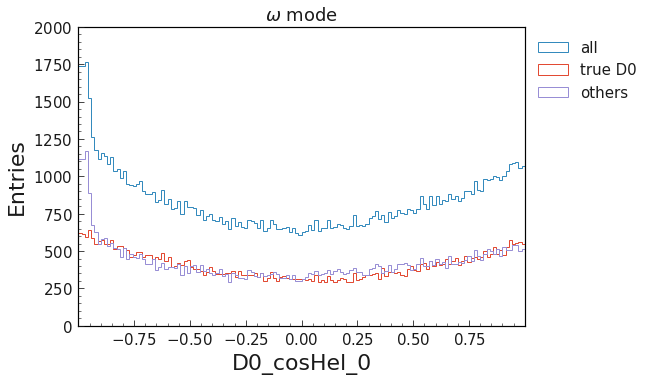

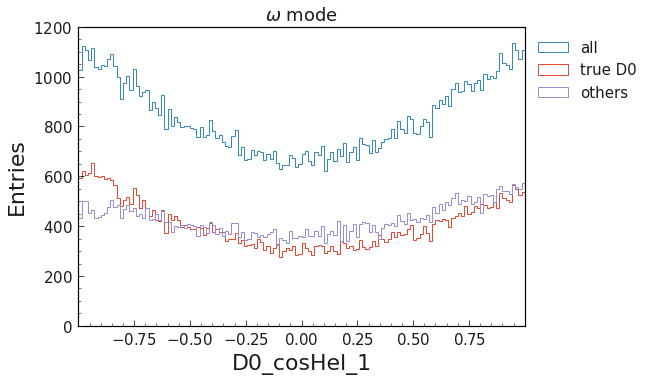

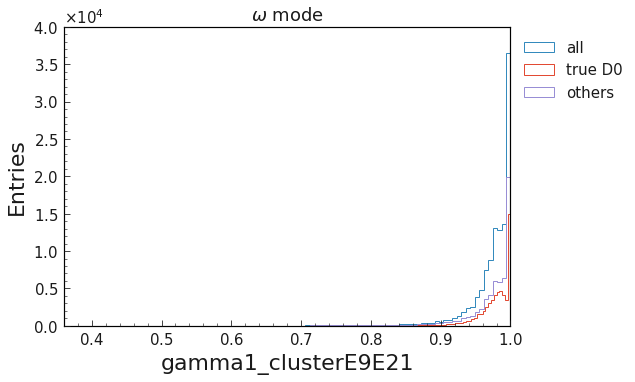

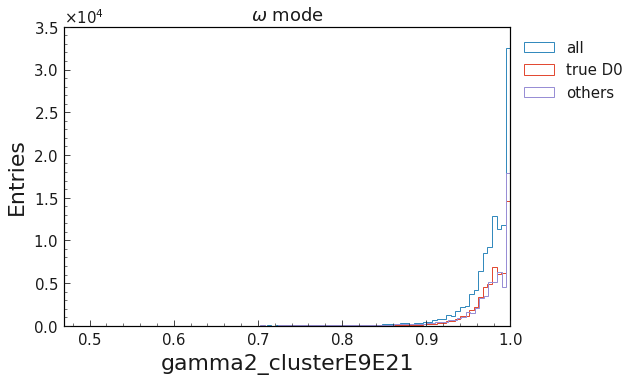

<Figure size 576x396 with 0 Axes>

In [137]:
D0_M('D0/pre_recon_omega_masskFit.root', 'omega', 'pre_recon_omega_M_bkg_detail_',bins=140)

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'D0_cosHel_1', 'gamma1_clusterE9E21', 'gamma2_clusterE9E21']
total = 68152
true = 39372
bkg = 28780
true fraction = 0.5777086512501467
efficiency = 0.04426714997897502
figure of merit = 150.81626244215434


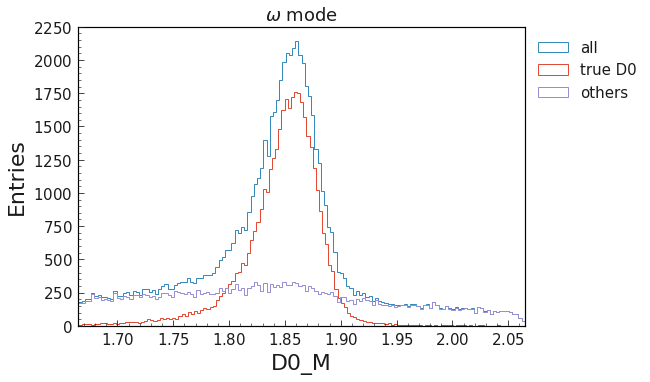

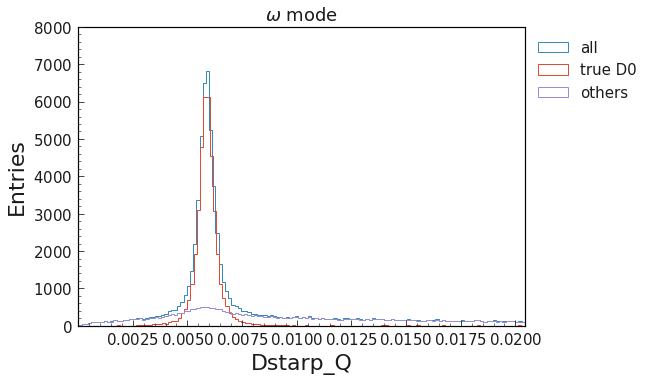

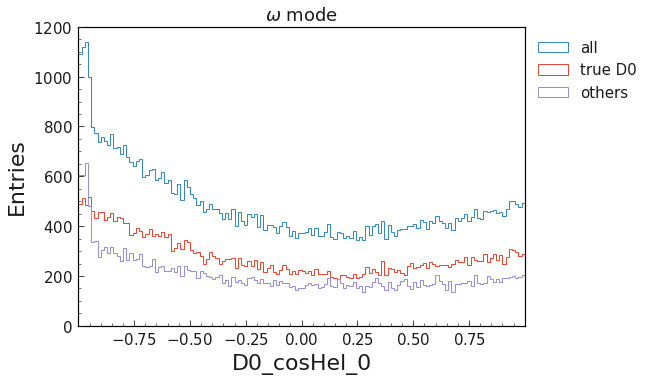

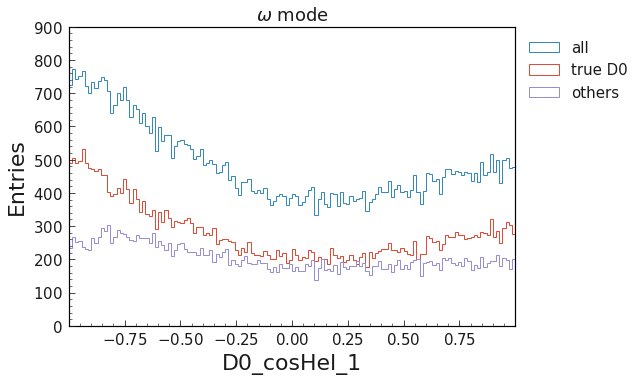

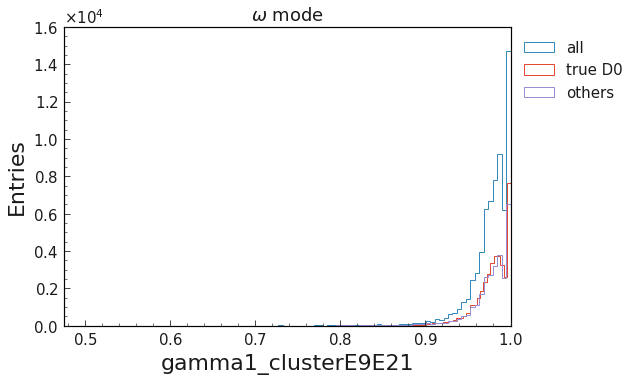

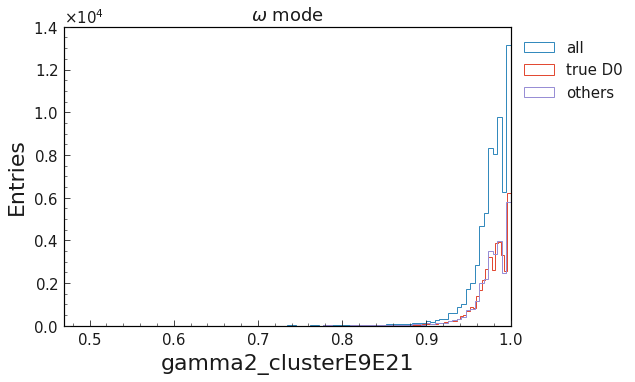

<Figure size 576x396 with 0 Axes>

In [10]:
D0_M('D0/pre_recon_omega_masskFit.root', 'omega', 'pre_recon_omega_M_bkg_detail_',bins=140)

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'D0_cosHel_1', 'gamma1_clusterE9E21', 'gamma2_clusterE9E21']
total = 115352
true = 55893
bkg = 59459
true fraction = 0.4845429641445315
efficiency = 0.06284221816963452
figure of merit = 164.56779725976253


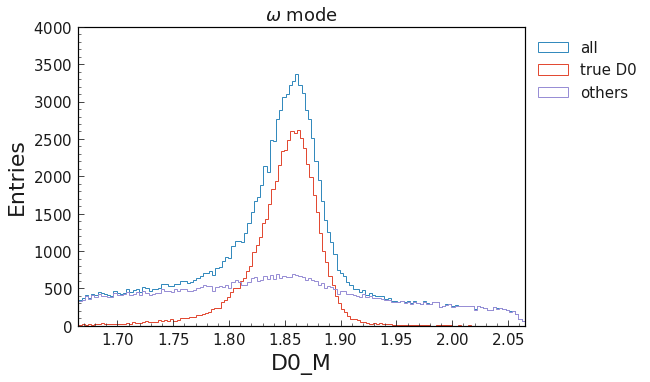

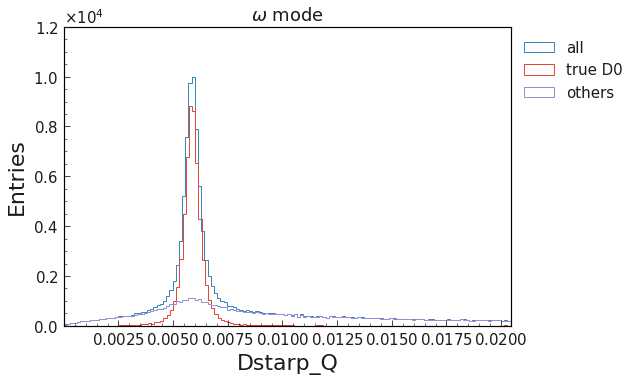

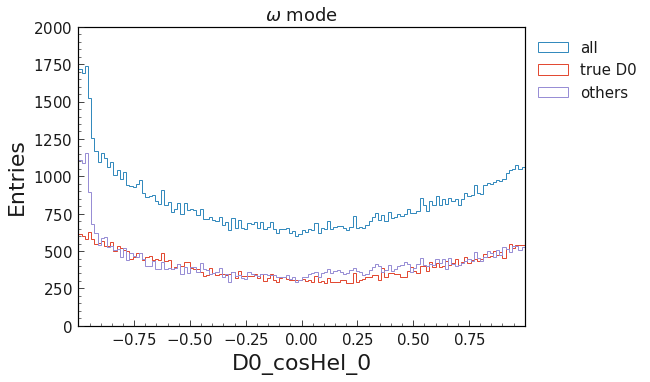

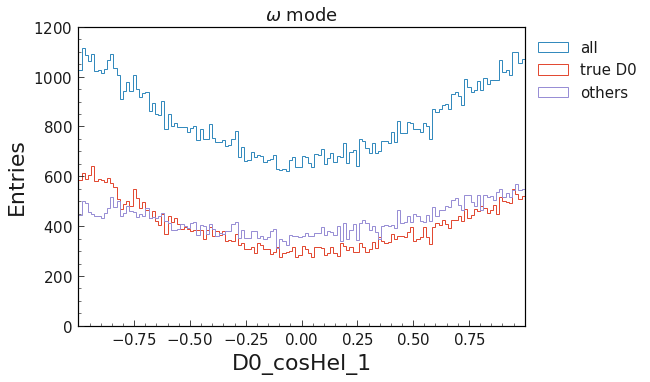

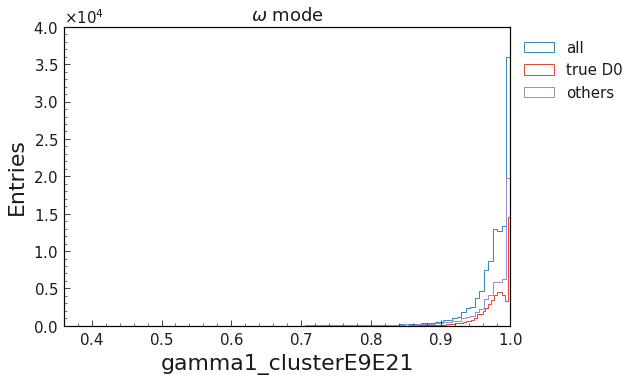

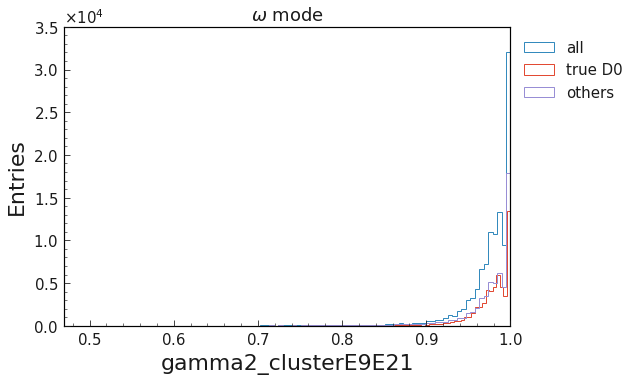

<Figure size 576x396 with 0 Axes>

In [138]:
D0_M('D0/pre_recon_omega.root', 'omega', 'pre_recon_omega_M_bkg_detail_',bins=140)

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'D0_cosHel_1']
total D0_M= 87386
true D0_M= 65474
bkg D0_M= 21912
true fraction = 0.7492504520174856


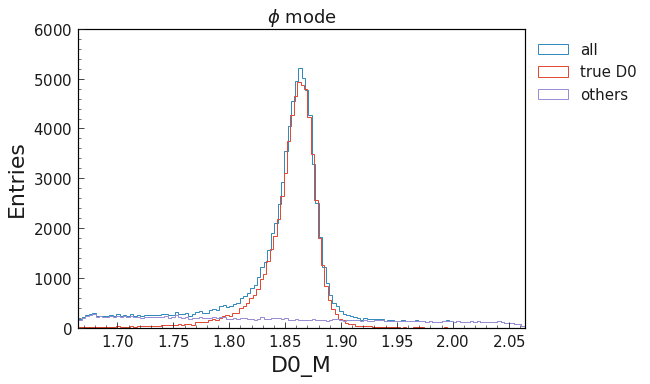

total Dstarp_Q= 87386
true Dstarp_Q= 65474
bkg Dstarp_Q= 21912
true fraction = 0.7492504520174856


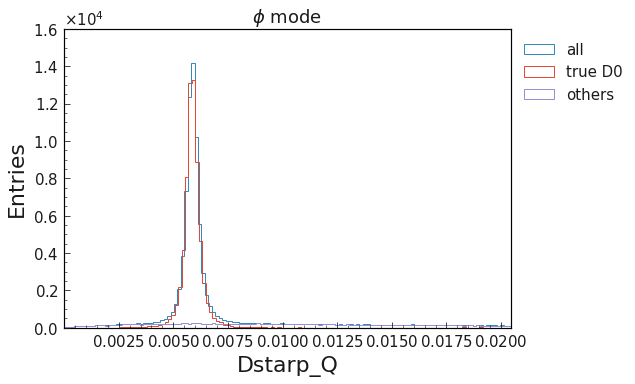

total D0_cosHel_0= 87386
true D0_cosHel_0= 65474
bkg D0_cosHel_0= 21912
true fraction = 0.7492504520174856


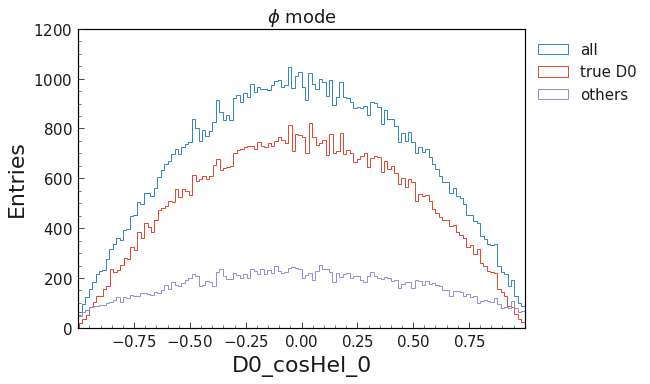

total D0_cosHel_1= 87386
true D0_cosHel_1= 65474
bkg D0_cosHel_1= 21912
true fraction = 0.7492504520174856


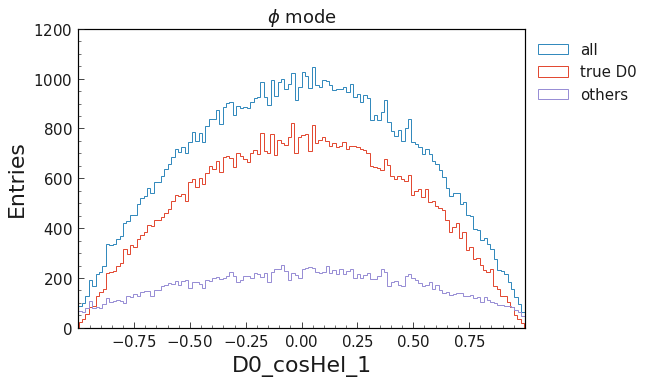

<Figure size 576x396 with 0 Axes>

In [8]:
D0_M('D0/pre_recon_phi.root', 'phi', 'pre_recon_omega_M_bkg_detail_',bins=130)

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'D0_cosHel_1']
total D0_M= 130373
true D0_M= 89177
bkg D0_M= 41196
true fraction = 0.6840143281200862


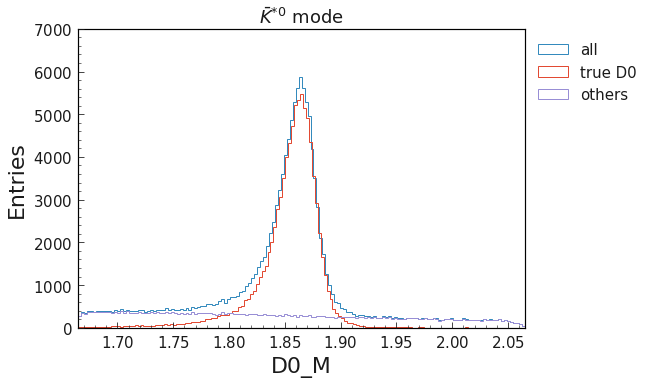

total Dstarp_Q= 130373
true Dstarp_Q= 89177
bkg Dstarp_Q= 41196
true fraction = 0.6840143281200862


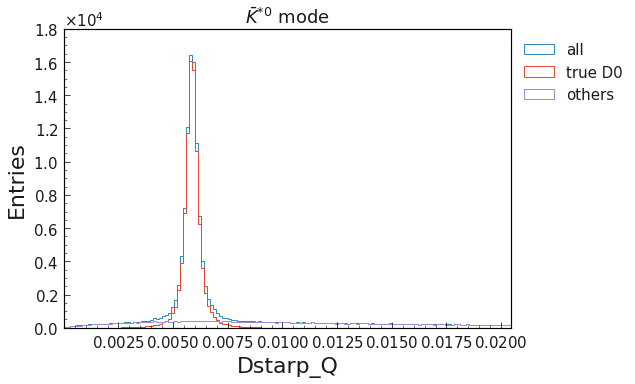

total D0_cosHel_0= 130373
true D0_cosHel_0= 89177
bkg D0_cosHel_0= 41196
true fraction = 0.6840143281200862


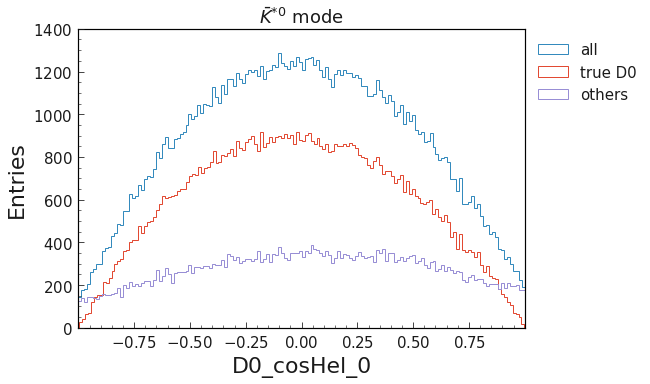

total D0_cosHel_1= 130373
true D0_cosHel_1= 89177
bkg D0_cosHel_1= 41196
true fraction = 0.6840143281200862


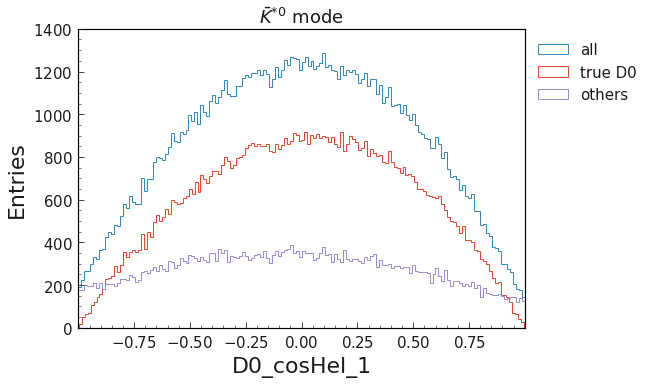

<Figure size 576x396 with 0 Axes>

In [9]:
D0_M('D0/pre_recon_antiKstar.root', 'antiKstar', 'pre_recon_omega_M_bkg_detail_',bins=150)

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'D0_cosHel_1']
total D0_M= 212972
true D0_M= 138881
bkg D0_M= 74091
true fraction = 0.6521091974531863


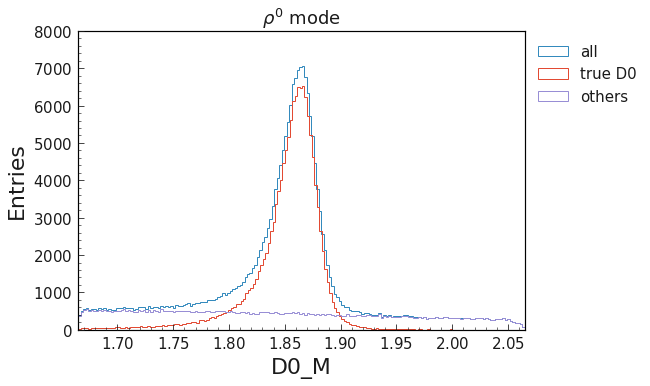

total Dstarp_Q= 212972
true Dstarp_Q= 138881
bkg Dstarp_Q= 74091
true fraction = 0.6521091974531863


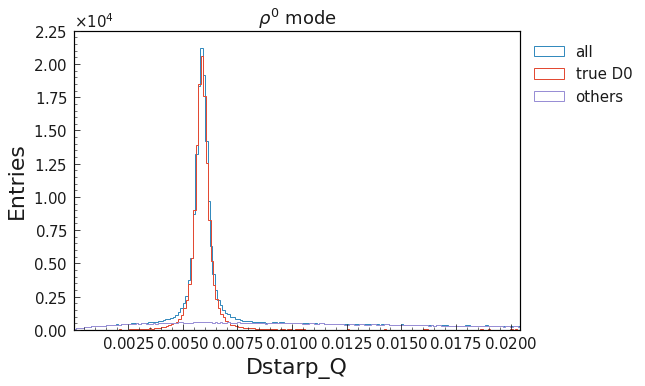

total D0_cosHel_0= 212972
true D0_cosHel_0= 138881
bkg D0_cosHel_0= 74091
true fraction = 0.6521091974531863


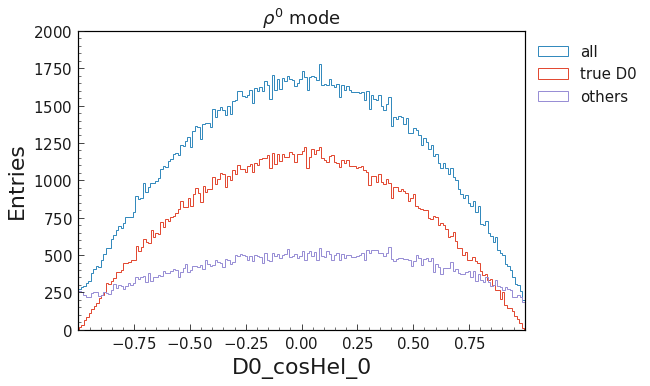

total D0_cosHel_1= 212972
true D0_cosHel_1= 138881
bkg D0_cosHel_1= 74091
true fraction = 0.6521091974531863


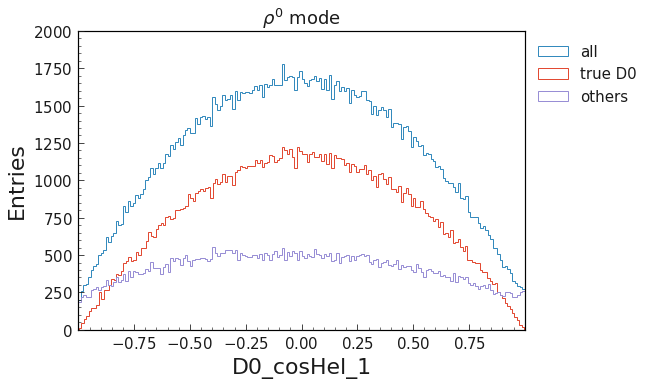

<Figure size 576x396 with 0 Axes>

In [10]:
D0_M('D0/pre_recon_rho.root', 'rho', 'pre_recon_omega_M_bkg_detail_', bins=180)

In [143]:
def D0_M_stack(file='file', vector='type', figname='name', false_1=None, false_2=None, false_3=None, false_4=None):
    
    tree='Dstarp'
    f = '/group/belle/users/jaeyoung/storage/01_recon/' + vector + '/' + file
    base_filter  = '(D0_M>1.665 && D0_M<2.065)'  
    
    if vector == 'omega':  
        true_filter  = ' && (Omega_genMotherID==gamma_genMotherID && Omega_genMotherPDG==421)'
        false_filter = ' && (Omega_genMotherID!=gamma_genMotherID || Omega_genMotherPDG!=421)'
        true_filter  = base_filter + true_filter
        false_filter = base_filter + false_filter
    elif vector == 'phi':    
        true_filter  = base_filter + ' && (Phi_genMotherID==gamma_genMotherID && Phi_genMotherPDG==421)'
        false_filter = base_filter + ' && (Phi_genMotherID!=gamma_genMotherID || Phi_genMotherPDG!=421)'   
    elif vector == 'rho':    
        true_filter  = base_filter + ' && (Rho_genMotherID==gamma_genMotherID && Rho_genMotherPDG==421)'
        false_filter = base_filter + ' && (Rho_genMotherID!=gamma_genMotherID || Rho_genMotherPDG!=421)'    
    elif vector == 'antiKstar':    
        true_filter  = base_filter + ' && (antiKstar_genMotherID==gamma_genMotherID && antiKstar_genMotherPDG==421)'
        false_filter = base_filter + ' && (antiKstar_genMotherID!=gamma_genMotherID || antiKstar_genMotherPDG!=421)'    

    variables = []
    variables.append('D0_M')      
        
    ROOT_df_start = ROOT.RDataFrame(tree, f)

    ROOT_df       = ROOT_df_start.Filter(base_filter)          
    ROOT_df_true  = ROOT_df_start.Filter(true_filter)                        
    ROOT_df_false = ROOT_df_start.Filter(false_filter)
    
    ROOT_df_false1 = ROOT_df_false.Filter(false_1)    
    ROOT_df_false2 = ROOT_df_false.Filter(false_2)
    
    col_dict       = ROOT_df.AsNumpy(variables)    
    col_dict_true  = ROOT_df_true.AsNumpy(variables)
    col_dict_false = ROOT_df_false.AsNumpy(variables)
    
    col_dict_false1= ROOT_df_false1.AsNumpy(variables)
    col_dict_false2= ROOT_df_false2.AsNumpy(variables)
    
    

    pd_df       = pd.DataFrame(col_dict)
    pd_df_true  = pd.DataFrame(col_dict_true)
    pd_df_false = pd.DataFrame(col_dict_false)     
    
    pd_df_false1 = pd.DataFrame(col_dict_false1) 
    pd_df_false2 = pd.DataFrame(col_dict_false2) 
    
    if false_3 != None:

        ROOT_df_false3 = ROOT_df_false.Filter(false_3)    
        #ROOT_df_false4 = ROOT_df_false.Filter(false_4)
        col_dict_false3= ROOT_df_false1.AsNumpy(variables)
        #col_dict_false4= ROOT_df_false2.AsNumpy(variables)    
        pd_df_false3 = pd.DataFrame(col_dict_false3) 
        #pd_df_false4 = pd.DataFrame(col_dict_false4)         
        
      
    if vector == 'omega':
        plot_title = r"$\omega$ mode"
    elif vector == 'phi':
        plot_title = r"$\phi$ mode"
        #variables.append("Phi_InvM")
    elif vector == 'rho':
        plot_title = r"$\rho^0$ mode"
        #variables.append("Rho_InvM")
    elif vector == 'antiKstar':
        plot_title = r"$\bar{K}^{*0}$ mode"
        #variables.append("antiKstar_InvM")
    print(variables)        
        
    for i in variables:
        
        print("total " + i + "= " + str(pd_df_false.shape[0]))
        print("mcMatched " + i + "= " + str(pd_df_false1.shape[0]))
        print("not_mcMatched " + i + "= " + str(pd_df_false2.shape[0]))
        print("mcMatched fraction = " + str(pd_df_false1.shape[0]/pd_df_false.shape[0]))
        
        if false_3 == None:
            pd_df_false1['class'] = 'mcMatched'
            pd_df_false2['class'] = 'not_mcMatched'
        else:
            pd_df_false1['class'] = '1_mcMatched'
            pd_df_false2['class'] = '2_mcMatched'            
            pd_df_false3['class'] = '3_mcMatched'
            #pd_df_false4['class'] = '4_mcMatched'        
        
        if false_3 == None:
            pd_merge = pd.concat([pd_df_false1, pd_df_false2])
        else: 
            pd_merge = pd.concat([pd_df_false1, pd_df_false2, pd_df_false3])
        print(pd_merge.shape[0])
            
        pd_merge.describe()
        if false_3 == None:
            if pd_df_false1.shape[0] < pd_df_false2.shape[0]:
                bp.stacked(pd_merge, col=i, by='class', bins=100, color = sns.cubehelix_palette(2, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=False))
            else:    
                bp.stacked(pd_merge, col=i, by='class', bins=100, color = sns.cubehelix_palette(2, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True))
        else: 
            bp.stacked(pd_merge, col=i, by='class', bins=100, color = sns.cubehelix_palette(3, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True))
        
        #bp.hist(pd_df[i], label=r'all',bins=140,color="k") 
        #bp.hist(pd_df_true[i], label=r'true D0', bins=140, color="b")
        
        #bp.hist(pd_df_false[i], label=r'others', bins=140, color="r")  
        
        
        #bp.stacked(pd_df, col=i,by='label', bins=140)        
        #bp.stacked(df_bkg_real_pi0,col='D0_M', label=r'from real_pi0', bins=140, color="b")
        #bp.stacked(df_bkg_fake_pi0[i], label=r'from fake_pi0', bins=140, color="g")
        

        bp.labels(i, "Entries")
        bp.xlim()
        plt.legend(bbox_to_anchor=(1,1))
        plt.title(plot_title)

        save_dir = "/home/belle2/jaeyoung/plots/" + vector  + "/Dstarp/" + figname + i + ".png"
        bp.save(save_dir)
        plt.show()
        plt.clf() 

['D0_M']
total D0_M= 59821
mcMatched D0_M= 41654
not_mcMatched D0_M= 18167
mcMatched fraction = 0.6963106601360726
59821


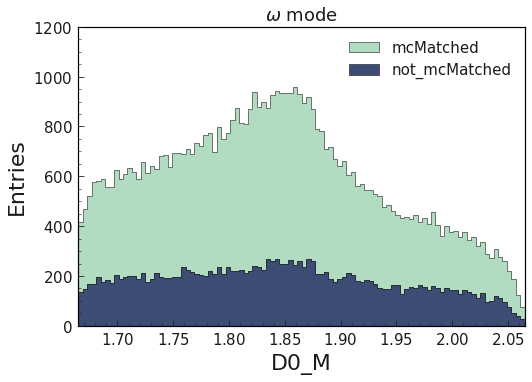

<Figure size 576x396 with 0 Axes>

In [144]:
false_1 = '(Pim_genMotherID == Pip_genMotherID) && (Pip_genMotherPDG==223)'
false_2 = '(Pim_genMotherID != Pip_genMotherID) || (Pip_genMotherPDG!=223)'

D0_M_stack('naive_signal_recon_omega.root', 'omega', 'naiv_omega_bkg_2pi_mcmatch_', false_1, false_2)

['D0_M']
total D0_M= 59821
mcMatched D0_M= 26998
not_mcMatched D0_M= 32823
mcMatched fraction = 0.45131308403403486
59821


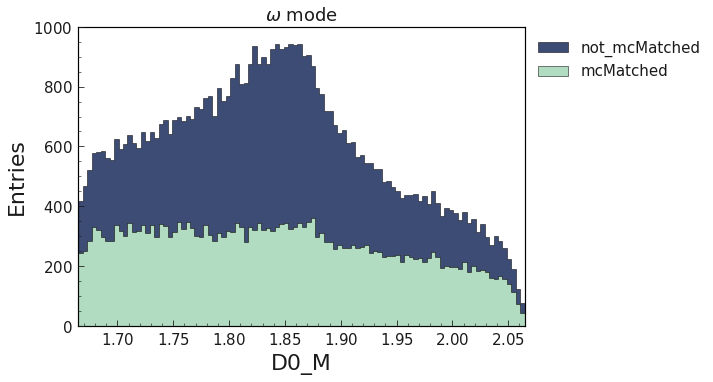

<Figure size 576x396 with 0 Axes>

In [145]:
false_1 = '((gamma1_genMotherID == gamma2_genMotherID) && (gamma1_genMotherPDG==111)) '
false_2 = '((gamma1_genMotherID != gamma2_genMotherID) || (gamma1_genMotherPDG!=111)) '

D0_M_stack('naive_signal_recon_omega.root', 'omega', 'pre_recon_omega_M_bkg_detail_', false_1, false_2)

['D0_M']
total D0_M= 59821
mcMatched D0_M= 26998
not_mcMatched D0_M= 32823
mcMatched fraction = 0.45131308403403486
59821


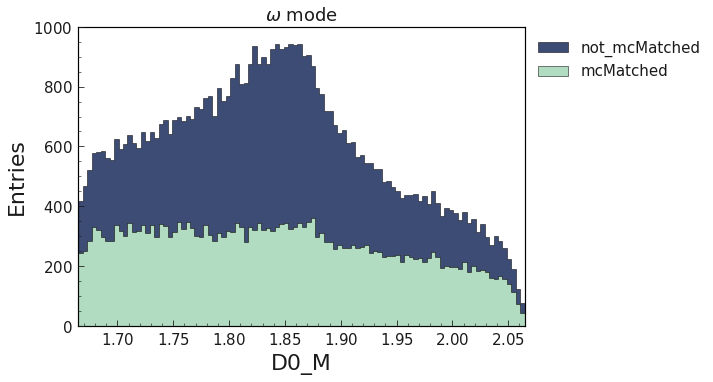

<Figure size 576x396 with 0 Axes>

In [146]:
false_1 = '((gamma1_genMotherID == gamma2_genMotherID) && (gamma1_genMotherPDG==111)) '
false_2 = '((gamma1_genMotherID != gamma2_genMotherID) || (gamma1_genMotherPDG!=111)) '

D0_M_stack('naive_signal_recon_omega.root', 'omega', 'naiv_omega_bkg_gamma12_mcmatch_', false_1, false_2)

['D0_M']
total D0_M= 59821
mcMatched D0_M= 26998
not_mcMatched D0_M= 32823
mcMatched fraction = 0.45131308403403486
59821


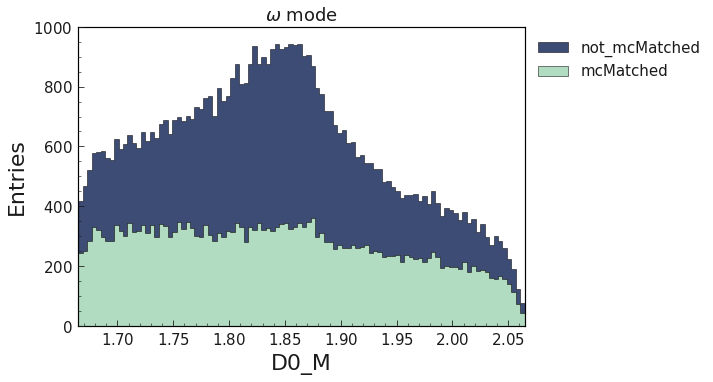

<Figure size 576x396 with 0 Axes>

In [71]:
false_1 = '((gamma1_genMotherID == gamma2_genMotherID) && (gamma1_genMotherPDG==111)) '
false_2 = '((gamma1_genMotherID != gamma2_genMotherID) || (gamma1_genMotherPDG!=111)) '

D0_M_stack('naive_signal_recon_omega.root', 'omega', 'pre_recon_omega_M_bkg_detail_', false_1, false_2)

['D0_M']
total D0_M= 99009
mcMatched D0_M= 29417
not_mcMatched D0_M= 69592
mcMatched fraction = 0.29711440374107406
99009


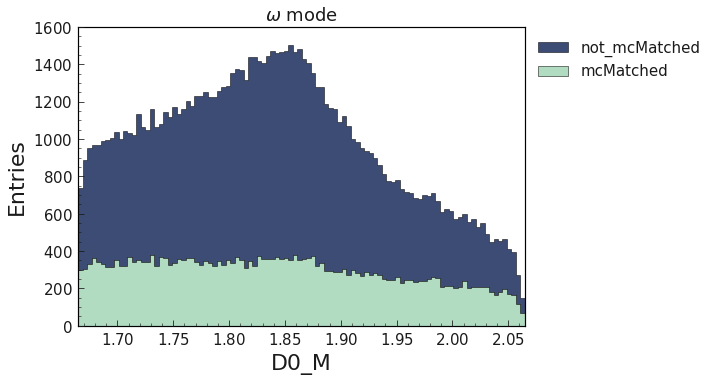

<Figure size 576x396 with 0 Axes>

In [18]:
false_1 = '(gamma1_genMotherID == gamma2_genMotherID) && (gamma1_genMotherPDG==111)'
false_2 = '(gamma1_genMotherID != gamma2_genMotherID) || (gamma1_genMotherPDG!=111)'

D0_M_stack('D0/pre_recon_omega_Emma.root', 'omega', 'pre_recon_omega_M_bkg_detail_', false_1, false_2)

['D0_M']
total D0_M= 59459
mcMatched D0_M= 26639
not_mcMatched D0_M= 32820
mcMatched fraction = 0.4480230074505121
59459


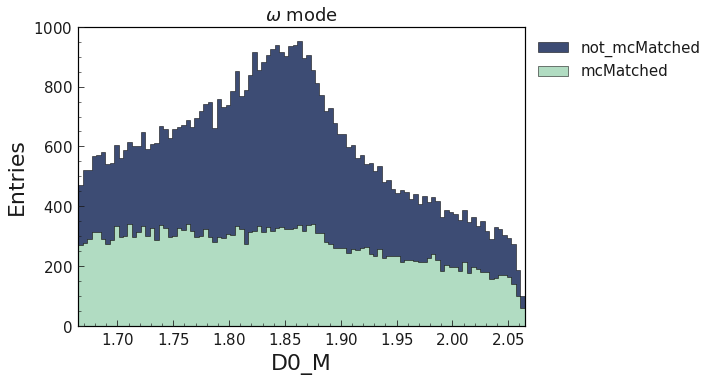

<Figure size 576x396 with 0 Axes>

In [144]:
false_1 = '((gamma1_genMotherID == gamma2_genMotherID) && (gamma1_genMotherPDG==111 && gamma2_genMotherPDG==111))'
false_2 = '((gamma1_genMotherID != gamma2_genMotherID) || (gamma1_genMotherPDG!=111 || gamma2_genMotherPDG!=111))'

D0_M_stack('D0/pre_recon_omega.root', 'omega', 'pre_recon_omega_M_bkg_detail_', false_1, false_2)

['D0_M']
total D0_M= 59459
mcMatched D0_M= 26639
not_mcMatched D0_M= 138
mcMatched fraction = 0.4480230074505121
53416


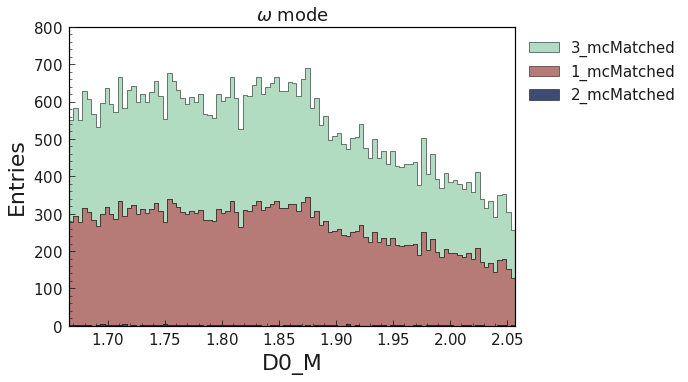

<Figure size 576x396 with 0 Axes>

In [164]:
false_1 = '((gamma1_genMotherID == gamma2_genMotherID) && (gamma1_genMotherPDG==111 && gamma2_genMotherPDG==111))'
false_2 = '((gamma1_genMotherID != gamma2_genMotherID) || (gamma1_genMotherPDG!=111 || gamma2_genMotherPDG!=111)) && (gamma1_genMotherPDG==421 || gamma2_genMotherPDG==421)'
false_3 = '((gamma1_genMotherID != gamma2_genMotherID) || (gamma1_genMotherPDG!=111 || gamma2_genMotherPDG!=111)) || (gamma1_genMotherPDG!=421 && gamma2_genMotherPDG!=421)'

D0_M_stack('D0/pre_recon_omega.root', 'omega', 'pre_recon_omega_M_bkg_detail_', false_1, false_2, false_3)

['D0_M']
total D0_M= 59459
mcMatched D0_M= 18497
not_mcMatched D0_M= 17788
mcMatched fraction = 0.31108831295514555
54782


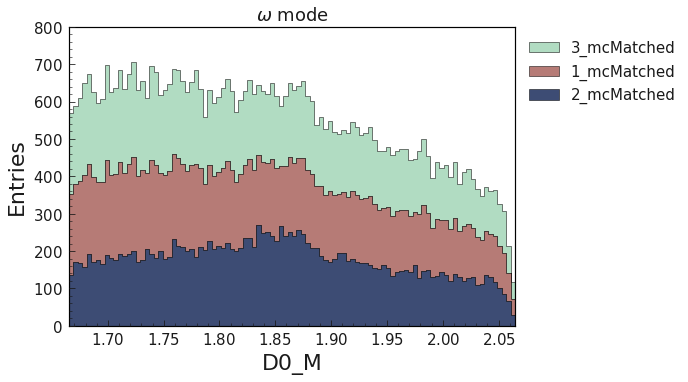

<Figure size 576x396 with 0 Axes>

In [165]:
false_1 = '(Pim_genMotherID == Pip_genMotherID) && (Pip_genMotherPDG==223) && (gamma1_genMotherID == gamma2_genMotherID) && (gamma1_genMotherPDG==111)'
false_2 = '(Pim_genMotherID != Pip_genMotherID) || (Pip_genMotherPDG!=223) && (gamma1_genMotherID == gamma2_genMotherID) && (gamma1_genMotherPDG==111)'


false_3 = '(Pim_genMotherID == Pip_genMotherID) && (Pip_genMotherPDG==223) && (gamma1_genMotherID != gamma2_genMotherID) || (gamma1_genMotherPDG!=111)'
false_4 = '(Pim_genMotherID != Pip_genMotherID) || (Pip_genMotherPDG!=223) && (gamma1_genMotherID != gamma2_genMotherID) || (gamma1_genMotherPDG!=111)'

D0_M_stack('D0/pre_recon_omega.root', 'omega', 'pre_recon_omega_M_bkg_detail_', false_1, false_2, false_3, false_4)

['D0_M']
total D0_M= 59821
mcMatched D0_M= 36715
not_mcMatched D0_M= 23106
mcMatched fraction = 0.6137476805803982
59821


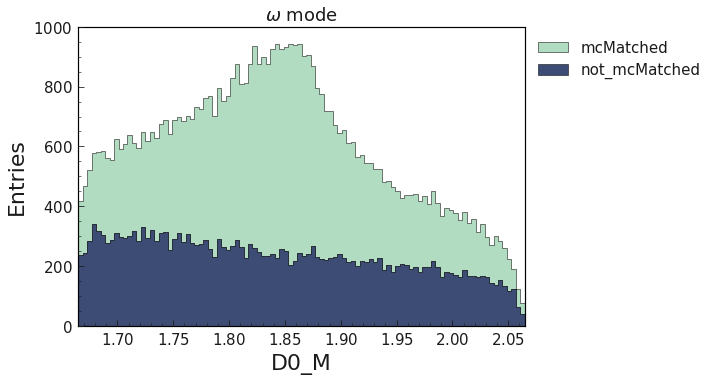

<Figure size 576x396 with 0 Axes>

In [147]:
false_1 = '(gamma_genMotherPDG==421) '
false_2 = '(gamma_genMotherPDG!=421) '

D0_M_stack('naive_signal_recon_omega.root', 'omega', 'naiv_omega_bkg_primary_gamma_mcmatch_', false_1, false_2)

['D0_M']
total D0_M= 59459
mcMatched D0_M= 35056
not_mcMatched D0_M= 2840
mcMatched fraction = 0.5895827376847912
37896


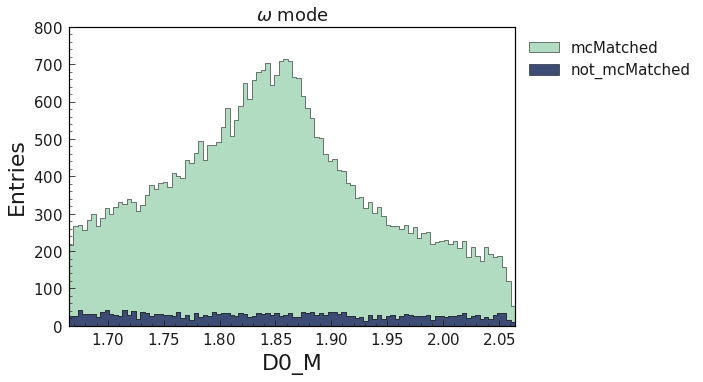

<Figure size 576x396 with 0 Axes>

In [123]:
false_1 = '(gamma_genMotherPDG==421) && gamma_CMS_E > 0.4'
false_2 = '(gamma_genMotherPDG!=421) && gamma_CMS_E > 0.4'

D0_M_stack('D0/pre_recon_omega.root', 'omega', 'pre_recon_omega_M_bkg_detail_', false_1, false_2)

In [41]:
def D0_M_isSignal(file='file', vector='type', figname='name'):
    
    tree = 'Dstarp'
    
    if vector == 'omega':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/omega/gb2/' + file
        f = uproot.open(file_)
         
        df_Dstarp = f[tree].arrays(filter_name="/Dstarp_*/", library="pd")    
        df_InvM = f[tree].arrays(filter_name="/(D0|Omega|Pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="/(D0|Omega|Pi0)_M/", library="pd")        
        df_D0_InvM_after_vfit = f[tree].arrays(["D0_M_after_treefit"], "(D0_M_after_treefit > 1.665) & (D0_M_after_treefit < 2.065)" , aliases={"D0_M_after_treefit": "D0_M"}, library="pd")
        
        #df_D0_M = f[tree].arrays(filter_name="D0_M_before", library="pd")
        df_vector_PDG  = f[tree].arrays(filter_name="/Omega_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")
        df_g1_PDG = f[tree].arrays(filter_name="/gamma1_gen*/", library="pd")
        df_g2_PDG = f[tree].arrays(filter_name="/gamma2_gen*/", library="pd")
        
    Merge = pd.concat([df_g1_PDG, df_g2_PDG, df_Dstarp,df_InvM,df_M,df_vector_PDG,df_gamma_PDG, \
    df_D0_InvM_after_vfit],axis=1)
        #print(df_D0_M)
    #df_true = Merge[Merge['Dstarp_isSignal']==1]
    #df_bkg = Merge[Merge['Dstarp_isSignal']!=1]
    
    if vector == 'omega':
        Merge = Merge[(Merge['D0_M'] < 2.065) & (Merge['D0_M'] > 1.665)]
        df_true = Merge[(Merge['Omega_genMotherID']==Merge['gamma_genMotherID']) & (Merge['Omega_genMotherPDG']==421)]
        df_bkg  = Merge[(Merge['Omega_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['Omega_genMotherPDG']!=421)]
        
        conditionlist = [(df_bkg['gamma1_genMotherID']==df_bkg['gamma2_genMotherID']) & (df_bkg['gamma1_genMotherPDG']==111) ,
                        (df_bkg['gamma1_genMotherID']!=df_bkg['gamma2_genMotherID']) & ((df_bkg['gamma1_genMotherPDG']==111) | (df_bkg['gamma2_genMotherPDG']==111)) & ((df_bkg['gamma1_genMotherPDG']!=421) & (df_bkg['gamma2_genMotherPDG']!=421)),
                        (df_bkg['gamma1_genMotherPDG']==421) | (df_bkg['gamma2_genMotherPDG']==421)]
        
        choicelist = ['real pi0', 'fake pi0', 'at least a primary photon']
        df_bkg.loc[:,'label'] = np.select(conditionlist, choicelist, default='Not Specified')
        
        
        #df_bkg_real_pi0 = df_bkg[(df_bkg['gamma1_genMotherID']==df_bkg['gamma2_genMotherID']) & \
        #(df_bkg['gamma1_genMotherPDG']==111)]
        #df_bkg_fake_pi0 = df_bkg[(df_bkg['gamma1_genMotherID']!=df_bkg['gamma2_genMotherID']) & \
        #((df_bkg['gamma1_genMotherPDG']==111) | (df_bkg['gamma2_genMotherPDG']==111) )]    
    print(df_true.describe())
    #variables = f[tree].keys("D0_InvM")
    variables =[]
    #variables.append("D0_M")
    variables.append("Omega_M")
    #variables.append("D0_M_before")
    #variables.append("D0_M_after_treefit")
    #variables.append("Dstarp_delM")
    #variables.append("Dstarp_Q")
    
    if vector == 'omega':
        #variables.append("Omega_InvM")
        #variables.append("Omega_M")
        #variables.append("Pi0_InvM")
        plot_title = r"$\omega$ mode"
    elif vector == 'phi':
        variables.append("Phi_InvM")
    elif vector == 'rho':
        variables.append("Rho_InvM")
    elif vector == 'antiKstar':
        variables.append("antiKstar_InvM")
    print(variables)
    

        
        
    for i in variables:

        #bp.hist(Merge[i], label=r'all',bins=140,color="k")         
        #bp.hist(df_true[i], label=r'true D0', bins=140, color="#ef2929")
        
        #bp.hist(df_true_Dst[i], label=r'D0 from Dst', bins=100)
        #bp.hist(df_no_Dst[i], label=r'D0 not from Dst', bins=100)
        
        #bp.hist(df_bkg[i], label=r'others', bins=140, color="r")  
        bp.stacked(df_bkg, col=i,by='label', bins=140)
        
        #bp.hist(df_bkg_real_pi0[i], label=r'from real_pi0', bins=140, color="b")
        #bp.hist(df_bkg_fake_pi0[i], label=r'from fake_pi0', bins=140, color="g")
        
        #bp.stacked(df_bkg_real_pi0,col='D0_M', label=r'from real_pi0', bins=140, color="b")
        #bp.stacked(df_bkg_fake_pi0[i], label=r'from fake_pi0', bins=140, color="g")
        
        print("true " + i + "= " + str(df_true.shape[0]))
        print("bkg " + i + "= " + str(df_bkg.shape[0]))
        bp.labels(i, "Entries")
        bp.xlim()
        #plt.legend()
        plt.legend(bbox_to_anchor=(1,1))
        plt.title(plot_title)

        save_dir = "/home/belle2/jaeyoung/plots/" + vector  + "/Dstarp/" + figname + i + ".png"
        bp.save(save_dir)
        plt.show()
        plt.clf()        

/cvmfs/belle.cern.ch/el7/externals/v01-11-00/Linux_x86_64/common/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


       gamma1_genMotherID  gamma1_genMotherP  gamma1_genMotherPDG  \
count        55893.000000       55893.000000         55893.000000   
mean            34.322366           0.871569           110.668152   
std              7.866992           0.546864            17.060818   
min             10.000000           0.029792          -211.000000   
25%             29.000000           0.450363           111.000000   
50%             34.000000           0.736714           111.000000   
75%             39.000000           1.162950           111.000000   
max             83.000000           4.739686           223.000000   

       gamma1_genParticleID  gamma2_genMotherID  gamma2_genMotherP  \
count          55893.000000        55893.000000       55893.000000   
mean              49.245254           34.322634           0.872058   
std               10.039356            7.864080           0.546529   
min               16.000000           10.000000           0.029792   
25%               42.000000 

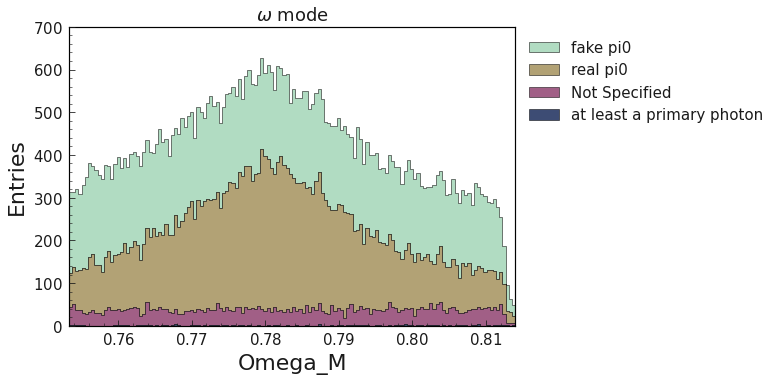

<Figure size 576x396 with 0 Axes>

In [22]:
D0_M_isSignal('D0/pre_recon_omega.root', 'omega', 'pre_recon_omega_M_bkg_detail_')

In [21]:
def D0_M(file='file', vector='type'):


    tree = 'Dstarp'
    
    
    if vector == 'omega':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/omega/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|Omega|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="/(D0|Omega|pi0)_M/", library="pd")
        #df_D0_M = f[tree].arrays(filter_name="D0_M_before", library="pd")
        df_omega_PDG  = f[tree].arrays(filter_name="/Omega_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")
        Merge = pd.concat([df_InvM,df_M,df_omega_PDG,df_gamma_PDG],axis=1)
        #print(df_D0_M)
        df_true = Merge[(Merge['Omega_genMotherID']==Merge['gamma_genMotherID']) & (Merge['Omega_genMotherPDG']==421)]
        df_bkg  = Merge[(Merge['Omega_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['Omega_genMotherPDG']!=421)]
        print(df_true.describe())
        variables = f[tree].keys("/(D0|Omega|pi0)_InvM/")
        variables.append("D0_M")
        variables.append("D0_M_before")
        
        print(variables)
        plot_title = r"$\omega$ mode"
        
    if vector == 'phi':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/phi/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|Phi|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="/(D0|Phi|pi0)_M/", library="pd")
        #df_D0_M = f[tree].arrays("D0_M_before", library="pd")
        df_phi_PDG  = f[tree].arrays(filter_name="/Phi_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")
        Merge = pd.concat([df_InvM,df_M,df_phi_PDG,df_gamma_PDG],axis=1)
        
        df_true = Merge[(Merge['Phi_genMotherID']==Merge['gamma_genMotherID']) & (Merge['Phi_genMotherPDG']==421)]
        df_bkg  = Merge[(Merge['Phi_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['Phi_genMotherPDG']!=421)]
        
        variables = f[tree].keys("/(D0|Phi)_InvM/")
        variables.append("D0_M")
        variables.append("D0_M_before")
        
        print(variables)
        plot_title = r"$\phi$ mode"   
        
    if vector == 'rho':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/rho/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|Rho|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="/(D0|Rho|pi0)_M/", library="pd")
        #df_D0_M = f[tree].arrays("D0_M_before", library="pd")
        df_phi_PDG  = f[tree].arrays(filter_name="/Rho_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")
        df_D0_PDG = f[tree].arrays(filter_name="/D0_gen*/", library="pd")
        Merge = pd.concat([df_InvM,df_M,df_phi_PDG,df_gamma_PDG, df_D0_PDG],axis=1)
        
        df_true = Merge[(Merge['Rho_genMotherID']==Merge['gamma_genMotherID']) & (Merge['Rho_genMotherPDG']==421)]
        df_bkg  = Merge[(Merge['Rho_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['Rho_genMotherPDG']!=421)]
        
        df_true_Dst = df_true[df_true['D0_genMotherPDG']==413]
        print(df_true.shape[0])
        print(df_true_Dst.shape[0])
        df_no_Dst  = df_true[df_true['D0_genMotherPDG']!=413]
        
        variables = f[tree].keys("/(D0|Rho)_InvM/")
        variables.append("D0_M_before")
        variables.append("D0_M")
        print(variables)
        plot_title = r"$\rho^0$ mode"           
        
    if vector == 'antiKstar':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/antiKstar/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|antiKstar|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="/(D0|antiKstar|pi0)_M/", library="pd")
        #df_D0_M = f[tree].arrays("D0_M_before", library="pd")
        df_phi_PDG  = f[tree].arrays(filter_name="/antiKstar_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")
        Merge = pd.concat([df_InvM,df_M,df_phi_PDG,df_gamma_PDG],axis=1)
        
        df_true = Merge[(Merge['antiKstar_genMotherID']==Merge['gamma_genMotherID']) & (Merge['antiKstar_genMotherPDG']==421)]
        df_bkg  = Merge[(Merge['antiKstar_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['antiKstar_genMotherPDG']!=421)]
        
        variables = f[tree].keys("/(D0|antiKstar)_InvM/")
        variables.append("D0_M_before")
        variables.append("D0_M")
        print(variables)
        plot_title = r"$\bar{K}^{*0}$ mode"              
        
    for i in variables:
        

        

        #bp.hist(Merge[i], label=r'all',bins=100) 
        
        #bp.hist(df_true[i], label=r'true D0', bins=100)
        #bp.hist(df_true_Dst[i], label=r'D0 from Dst', bins=100)
        bp.hist(df_no_Dst[i], label=r'D0 not from Dst', bins=100)
        #bp.hist(df_bkg[i], label=r'others', bins=100)  
        
        print("true " + i + "= " + str(df_true.shape[0]))
        print("bkg " + i + "= " + str(df_bkg.shape[0]))
        bp.labels(i, "Entries")
        bp.xlim()
        plt.legend()
        plt.title(plot_title)

        save_dir = "/home/belle2/jaeyoung/plots/" + vector  + "/Dstarp/" + i + ".png"
        bp.save(save_dir)
        plt.show()
        plt.clf()


            D0_InvM    Omega_InvM          D0_M   D0_M_before       Omega_M  \
count  55894.000000  55894.000000  55894.000000  55894.000000  55894.000000   
mean       1.848268      0.779854      1.848268      1.848143      0.779854   
std        0.034816      0.011955      0.034816      0.034818      0.011955   
min        1.665122      0.743949      1.665122      1.665319      0.743949   
25%        1.833685      0.771831      1.833685      1.833645      0.771831   
50%        1.853325      0.779978      1.853325      1.853159      0.779979   
75%        1.868919      0.787535      1.868919      1.868814      0.787535   
max        2.140675      1.254091      2.140675      2.061352      1.254091   

       Omega_genMotherID  Omega_genMotherP  Omega_genMotherPDG  \
count       55894.000000      55894.000000             55894.0   
mean            9.448724          3.412433               421.0   
std             2.900057          0.778375                 0.0   
min             6.000000

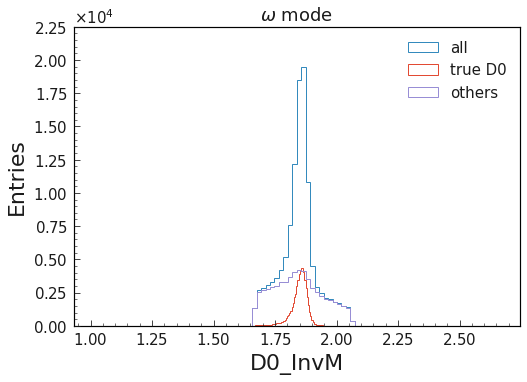

true Omega_InvM= 55894
bkg Omega_InvM= 59523


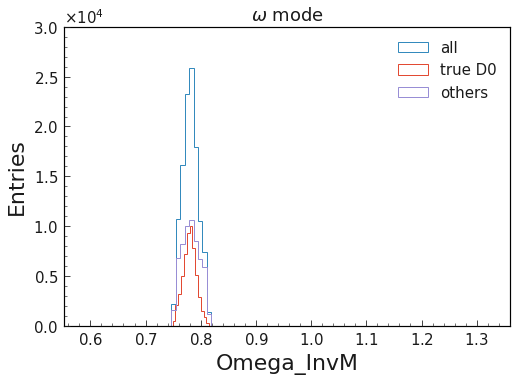

true D0_M= 55894
bkg D0_M= 59523


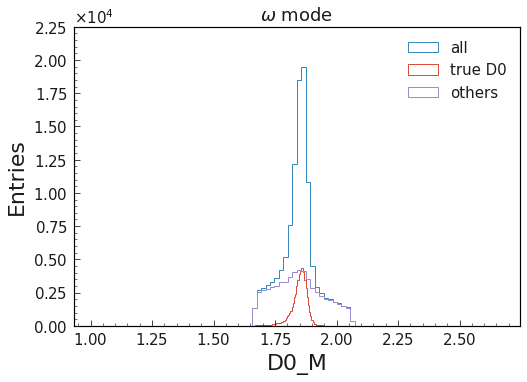

true D0_M_before= 55894
bkg D0_M_before= 59523


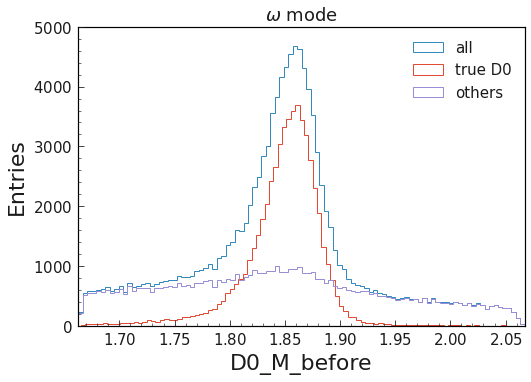

<Figure size 576x396 with 0 Axes>

In [4]:
D0_M('D0/pre_recon_omega.root', 'omega')

['D0_InvM', 'Phi_InvM', 'D0_M', 'D0_M_before']
true D0_InvM= 65476
bkg D0_InvM= 21949


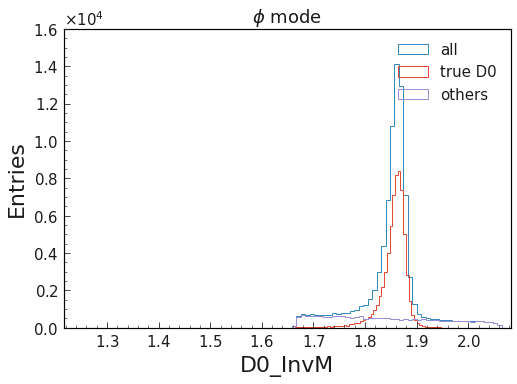

true Phi_InvM= 65476
bkg Phi_InvM= 21949


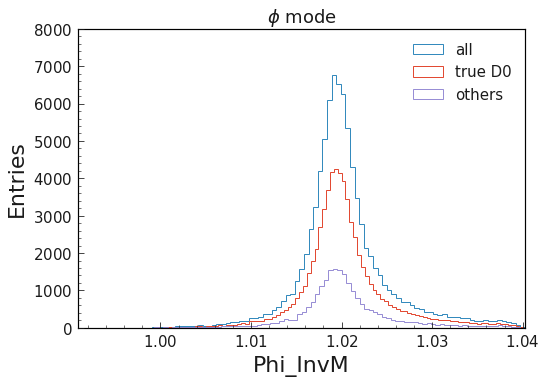

true D0_M= 65476
bkg D0_M= 21949


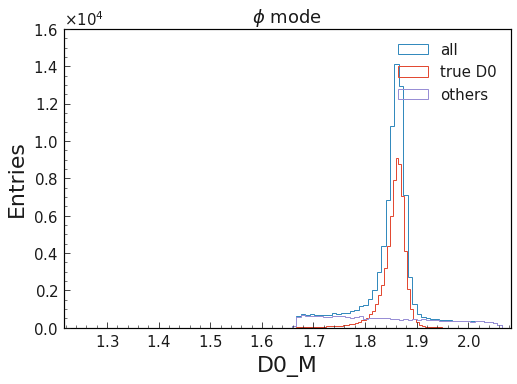

true D0_M_before= 65476
bkg D0_M_before= 21949


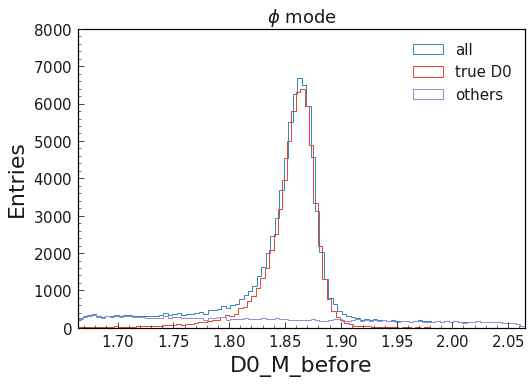

<Figure size 576x396 with 0 Axes>

In [5]:
D0_M('D0/pre_recon_phi.root', 'phi')

138887
138887
['D0_InvM', 'Rho_InvM', 'D0_M_before', 'D0_M']
true D0_InvM= 138887
bkg D0_InvM= 74205


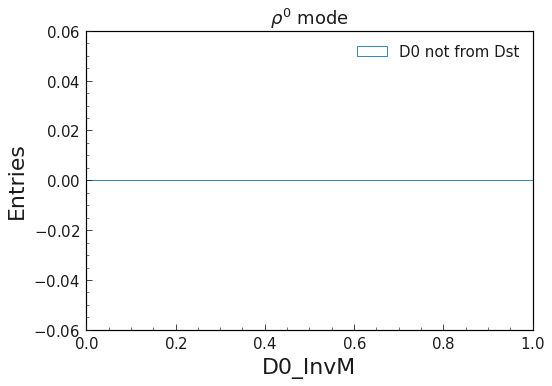

true Rho_InvM= 138887
bkg Rho_InvM= 74205


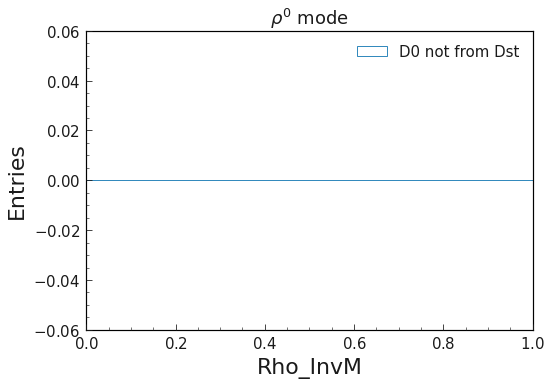

true D0_M_before= 138887
bkg D0_M_before= 74205


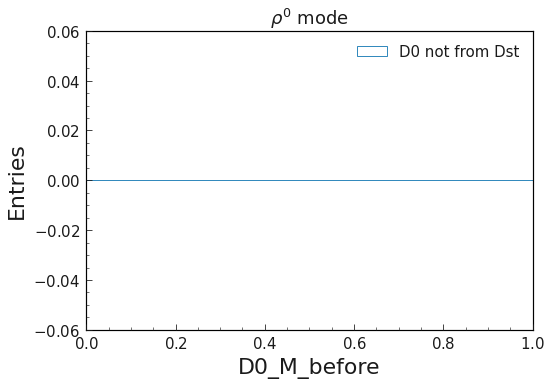

true D0_M= 138887
bkg D0_M= 74205


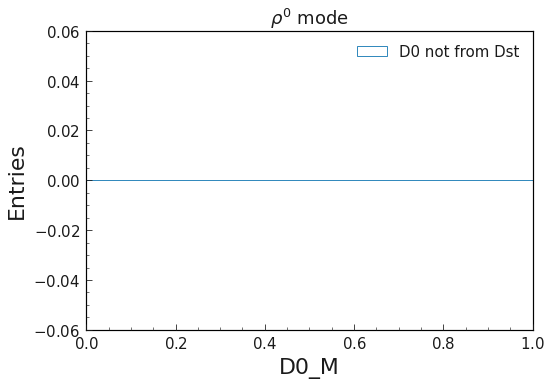

<Figure size 576x396 with 0 Axes>

In [14]:
D0_M('D0/pre_recon_rho.root', 'rho')

['D0_InvM', 'antiKstar_InvM', 'D0_M_before', 'D0_M']
true D0_InvM= 89177
bkg D0_InvM= 41283


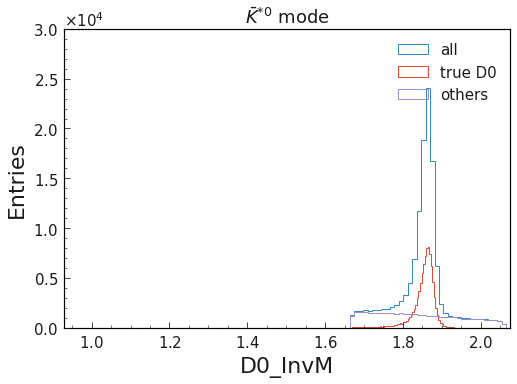

true antiKstar_InvM= 89177
bkg antiKstar_InvM= 41283


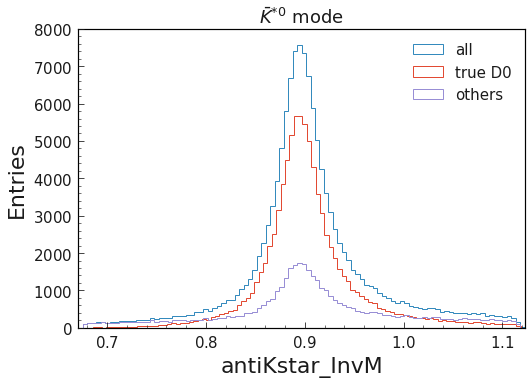

true D0_M_before= 89177
bkg D0_M_before= 41283


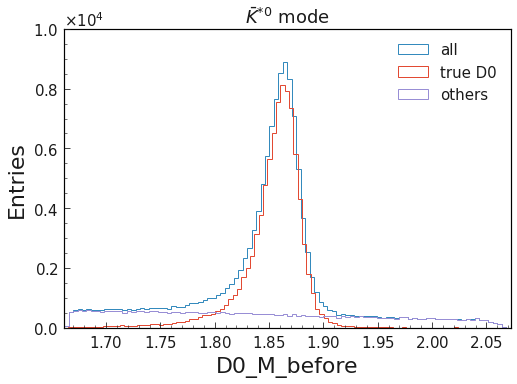

true D0_M= 89177
bkg D0_M= 41283


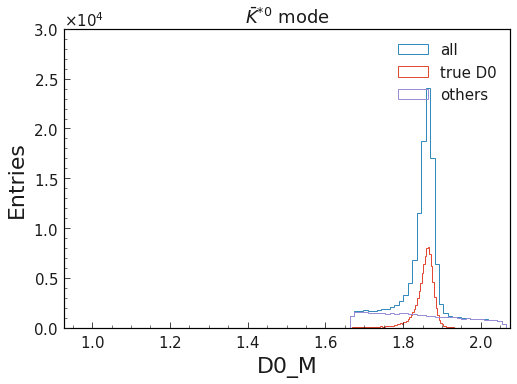

<Figure size 576x396 with 0 Axes>

In [7]:
D0_M('D0/pre_recon_antiKstar.root', 'antiKstar')

In [ ]:
###################################
# difference between gamma's energy section

In [ ]:
def gamma_study(file='file',vector='type'):    
    List = [0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0]

    tree = 'D0'    
    
        
    
    if vector == 'omega':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/omega/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|Omega|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="D0_M_before", library="pd")
        df_gamma_info = f[tree].arrays("gamma_CMS_E", library="pd")
        df_omega_PDG  = f[tree].arrays(filter_name="/Omega_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")

        #variables = f[tree].keys("/(D0|Omega|pi0)_InvM/")
        variables = f[tree].keys("/(D0)_InvM/")
        #variables.append("D0_M_before")
        print(variables)
        plt.figure(figsize=(36,30))
        for j in range(len(List)-1):
            Merge = pd.concat([df_InvM,df_gamma_info,df_omega_PDG,df_gamma_PDG,df_M],axis=1)
            df_true = Merge[(Merge['Omega_genMotherID']==Merge['gamma_genMotherID']) & (Merge['Omega_genMotherPDG']==421)]
            df_bkg  = Merge[(Merge['Omega_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['Omega_genMotherPDG']!=421)]
            
            if j ==13:
                break            
                                   
            plt.subplot(5,3,j+1)
            #plt.figure(figsize=(30,30))
            
            
            for i in variables:
                var = 'gamma_CMS_E'
                Merge = Merge[(Merge[var] > List[j]) & (Merge[var] < List[j+1])]
                df_true = df_true[(df_true[var] > List[j]) & (df_true[var] < List[j+1])]
                df_bkg = df_bkg[(df_bkg[var] > List[j]) & (df_bkg[var] < List[j+1])]
                print(df_true.shape[0])
                bp.hist(Merge[i], label=r'all',bins=100) 
                bp.hist(df_true[i], label=r'true D0', bins=100)                               
                bp.hist(df_bkg[i], label=r'others', bins=100)  

                bp.labels(i, "Entries")
                bp.xlim()
                plt.legend()
                plot_title = str(List[j]) + "$<E_{cms}(\gamma)$ $[GeV]<$" + str(List[j+1])
                plt.title(plot_title)
                plt.axvline(x=1.8648, linestyle="--", color="k", label="nominal value")
                
                suptitle = r"$\omega$ mode"

                
                #save_dir = "/home/belle2/jaeyoung/plots/omega/" + i + ".png"
                #bp.save(save_dir)
                #plt.show()
                #plt.clf()        
        
      
        
    if vector == 'phi':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/phi/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|Phi|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="D0_M_before", library="pd")
        df_gamma_info = f[tree].arrays("gamma_CMS_E", library="pd")
        df_omega_PDG  = f[tree].arrays(filter_name="/Phi_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")

        #variables = f[tree].keys("/(D0|Omega|pi0)_InvM/")
        variables = f[tree].keys("/(D0)_InvM/")
        #variables.append("D0_M_before")
        print(variables)
        plt.figure(figsize=(36,30))
        for j in range(len(List)-1):
            Merge = pd.concat([df_InvM,df_gamma_info,df_omega_PDG,df_gamma_PDG,df_M],axis=1)
            df_true = Merge[(Merge['Phi_genMotherID']==Merge['gamma_genMotherID']) & (Merge['Phi_genMotherPDG']==421)]
            df_bkg  = Merge[(Merge['Phi_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['Phi_genMotherPDG']!=421)]
            
            if j ==13:
                break
            plt.subplot(5,3,j+1)
            #plt.figure(figsize=(30,30))
            
            
            for i in variables:
                var = 'gamma_CMS_E'
                Merge = Merge[(Merge[var] > List[j]) & (Merge[var] < List[j+1])]
                df_true = df_true[(df_true[var] > List[j]) & (df_true[var] < List[j+1])]
                df_bkg = df_bkg[(df_bkg[var] > List[j]) & (df_bkg[var] < List[j+1])]
                
                print(df_true.shape[0])
                #bp.hist(Merge[i], label=r'all',bins=100) 
                bp.hist(df_true[i], label=r'true D0', bins=100)                               
                bp.hist(df_bkg[i], label=r'others', bins=100)  

                bp.labels(i, "Entries")
                bp.xlim()
                plt.legend()
                plot_title = str(List[j]) + "$<E_{cms}(\gamma)$ $[GeV]<$" + str(List[j+1])
                plt.title(plot_title)
                plt.axvline(x=1.8648, linestyle="--", color="k", label="nominal value")

                suptitle = r"$\phi$ mode"
                #save_dir = "/home/belle2/jaeyoung/plots/omega/" + i + ".png"
                #bp.save(save_dir)
                #plt.show()
                #plt.clf()        
        
             
        
    if vector == 'rho':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/rho/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|Rho|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="D0_M_before", library="pd")
        df_gamma_info = f[tree].arrays("gamma_CMS_E", library="pd")
        df_omega_PDG  = f[tree].arrays(filter_name="/Rho_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")

        #variables = f[tree].keys("/(D0|Omega|pi0)_InvM/")
        variables = f[tree].keys("/(D0)_InvM/")
        #variables.append("D0_M_before")
        print(variables)
        plt.figure(figsize=(36,30))
        for j in range(len(List)-1):
            Merge = pd.concat([df_InvM,df_gamma_info,df_omega_PDG,df_gamma_PDG,df_M],axis=1)
            df_true = Merge[(Merge['Rho_genMotherID']==Merge['gamma_genMotherID']) & (Merge['Rho_genMotherPDG']==421)]
            df_bkg  = Merge[(Merge['Rho_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['Rho_genMotherPDG']!=421)]
            
            if j ==13:
                break
            plt.subplot(5,3,j+1)
            #plt.figure(figsize=(30,30))
            
            
            for i in variables:
                var = 'gamma_CMS_E'
                Merge = Merge[(Merge[var] > List[j]) & (Merge[var] < List[j+1])]
                df_true = df_true[(df_true[var] > List[j]) & (df_true[var] < List[j+1])]
                df_bkg = df_bkg[(df_bkg[var] > List[j]) & (df_bkg[var] < List[j+1])]
                
                print(df_true.shape[0])
                #bp.hist(Merge[i], label=r'all',bins=100) 
                bp.hist(df_true[i], label=r'true D0', bins=100)                               
                bp.hist(df_bkg[i], label=r'others', bins=100)  

                bp.labels(i, "Entries")
                bp.xlim()
                plt.legend()
                plot_title = str(List[j]) + "$<E_{cms}(\gamma)$ $[GeV]<$" + str(List[j+1])
                plt.title(plot_title)
                plt.axvline(x=1.8648, linestyle="--", color="k", label="nominal value")

                suptitle = r"$\rho^{0}$ mode"
                #save_dir = "/home/belle2/jaeyoung/plots/omega/" + i + ".png"
                #bp.save(save_dir)
                #plt.show()
                #plt.clf()        
        
            

    if vector == 'antiKstar':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/antiKstar/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|antiKstar|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="D0_M_before", library="pd")
        df_gamma_info = f[tree].arrays("gamma_CMS_E", library="pd")
        df_omega_PDG  = f[tree].arrays(filter_name="/antiKstar_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")

        #variables = f[tree].keys("/(D0|Omega|pi0)_InvM/")
        variables = f[tree].keys("/(D0)_InvM/")
        #variables.append("D0_M_before")
        print(variables)
        plt.figure(figsize=(36,30))
        for j in range(len(List)-1):
            Merge = pd.concat([df_InvM,df_gamma_info,df_omega_PDG,df_gamma_PDG,df_M],axis=1)
            df_true = Merge[(Merge['antiKstar_genMotherID']==Merge['gamma_genMotherID']) & (Merge['antiKstar_genMotherPDG']==421)]
            df_bkg  = Merge[(Merge['antiKstar_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['antiKstar_genMotherPDG']!=421)]
            
            if j ==13:
                break
            plt.subplot(5,3,j+1)
            #plt.figure(figsize=(30,30))
            
            
            for i in variables:
                var = 'gamma_CMS_E'
                Merge = Merge[(Merge[var] > List[j]) & (Merge[var] < List[j+1])]
                df_true = df_true[(df_true[var] > List[j]) & (df_true[var] < List[j+1])]
                df_bkg = df_bkg[(df_bkg[var] > List[j]) & (df_bkg[var] < List[j+1])]
                
                print(df_true.shape[0])
                #bp.hist(Merge[i], label=r'all',bins=100) 
                bp.hist(df_true[i], label=r'true D0', bins=100)                               
                bp.hist(df_bkg[i], label=r'others', bins=100)  

                bp.labels(i, "Entries")
                bp.xlim()
                plt.legend()
                plot_title = str(List[j]) + "$<E_{cms}(\gamma)$ $[GeV]<$" + str(List[j+1])
                plt.title(plot_title)
                plt.axvline(x=1.8648, linestyle="--", color="k", label="nominal value")

                suptitle = r"$\bar{K}^{*0} mode$"
                #save_dir = "/home/belle2/jaeyoung/plots/omega/" + i + ".png"
                #bp.save(save_dir)
                #plt.show()
                #plt.clf()        
       
                    
    plt.suptitle(suptitle, size=30) 
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    save_dir = "/home/belle2/jaeyoung/plots/" + vector  + "/until_D0/gamma_study_" + vector + ".png"
    bp.save(save_dir)
    plt.show() 
    '''
    plt.figure(figsize=(12,10))    
    Merge = Merge[(Merge[var] > List[-1])]
    df_true = df_true[(df_true[var] > List[-1])]
    df_bkg = df_bkg[(df_bkg[var] > List[-1])]
                
    #bp.hist(Merge[i], label=r'all',bins=100) 
    #bp.hist(df_true[i], label=r'true D0', bins=100)                               
    bp.hist(df_bkg[i], label=r'others', bins=100)  

    bp.labels(i, "Entries")
    bp.xlim()
    plt.legend()
    plot_title = str(List[-1]) + "$<E(\gamma)$ $[GeV]$" 
    plt.title(plot_title)
    plt.axvline(x=1.8648, linestyle="--", color="k", label="nominal value")  
    '''


In [ ]:
gamma_study('D0/recon_omega_v1.root', 'omega')

In [ ]:
gamma_study('D0/recon_phi_v1.root', 'phi')

In [ ]:
gamma_study('D0/recon_rho_v1.root', 'rho')

In [ ]:
gamma_study('D0/recon_antiKstar_v1.root', 'antiKstar')

In [ ]:
def gamma_study_about_E(file='file',vector='type'):    
    List = [0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0]

    tree = 'D0'    
    
        
    
    if vector == 'omega':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/omega/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|Omega|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="D0_M_before", library="pd")
        df_gamma_info = f[tree].arrays("gamma_E", library="pd")
        df_omega_PDG  = f[tree].arrays(filter_name="/Omega_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")

        #variables = f[tree].keys("/(D0|Omega|pi0)_InvM/")
        variables = f[tree].keys("/(D0)_InvM/")
        #variables.append("D0_M_before")
        print(variables)
        plt.figure(figsize=(36,30))
        for j in range(len(List)-1):
            Merge = pd.concat([df_InvM,df_gamma_info,df_omega_PDG,df_gamma_PDG,df_M],axis=1)
            df_true = Merge[(Merge['Omega_genMotherID']==Merge['gamma_genMotherID']) & (Merge['Omega_genMotherPDG']==421)]
            df_bkg  = Merge[(Merge['Omega_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['Omega_genMotherPDG']!=421)]
            
            if j ==13:
                break            
                                   
            plt.subplot(5,3,j+1)
            #plt.figure(figsize=(30,30))
            
            
            for i in variables:
                var = 'gamma_E'
                Merge = Merge[(Merge[var] > List[j]) & (Merge[var] < List[j+1])]
                df_true = df_true[(df_true[var] > List[j]) & (df_true[var] < List[j+1])]
                df_bkg = df_bkg[(df_bkg[var] > List[j]) & (df_bkg[var] < List[j+1])]
                print(df_true.shape[0])
                bp.hist(Merge[i], label=r'all',bins=100) 
                bp.hist(df_true[i], label=r'true D0', bins=100)                               
                bp.hist(df_bkg[i], label=r'others', bins=100)  

                bp.labels(i, "Entries")
                bp.xlim()
                plt.legend()
                plot_title = str(List[j]) + "$<E(\gamma)$ $[GeV]<$" + str(List[j+1])
                plt.title(plot_title)
                plt.axvline(x=1.8648, linestyle="--", color="k", label="nominal value")
                
                suptitle = r"$\omega$ mode"

                
                #save_dir = "/home/belle2/jaeyoung/plots/omega/" + i + ".png"
                #bp.save(save_dir)
                #plt.show()
                #plt.clf()        
        
      
        
    if vector == 'phi':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/phi/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|Phi|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="D0_M_before", library="pd")
        df_gamma_info = f[tree].arrays("gamma_E", library="pd")
        df_omega_PDG  = f[tree].arrays(filter_name="/Phi_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")

        #variables = f[tree].keys("/(D0|Omega|pi0)_InvM/")
        variables = f[tree].keys("/(D0)_InvM/")
        #variables.append("D0_M_before")
        print(variables)
        plt.figure(figsize=(36,30))
        for j in range(len(List)-1):
            Merge = pd.concat([df_InvM,df_gamma_info,df_omega_PDG,df_gamma_PDG,df_M],axis=1)
            df_true = Merge[(Merge['Phi_genMotherID']==Merge['gamma_genMotherID']) & (Merge['Phi_genMotherPDG']==421)]
            df_bkg  = Merge[(Merge['Phi_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['Phi_genMotherPDG']!=421)]
            
            if j ==13:
                break
            plt.subplot(5,3,j+1)
            #plt.figure(figsize=(30,30))
            
            
            for i in variables:
                var = 'gamma_E'
                Merge = Merge[(Merge[var] > List[j]) & (Merge[var] < List[j+1])]
                df_true = df_true[(df_true[var] > List[j]) & (df_true[var] < List[j+1])]
                df_bkg = df_bkg[(df_bkg[var] > List[j]) & (df_bkg[var] < List[j+1])]
                
                print(df_true.shape[0])
                #bp.hist(Merge[i], label=r'all',bins=100) 
                bp.hist(df_true[i], label=r'true D0', bins=100)                               
                bp.hist(df_bkg[i], label=r'others', bins=100)  

                bp.labels(i, "Entries")
                bp.xlim()
                plt.legend()
                plot_title = str(List[j]) + "$<E(\gamma)$ $[GeV]<$" + str(List[j+1])
                plt.title(plot_title)
                plt.axvline(x=1.8648, linestyle="--", color="k", label="nominal value")

                suptitle = r"$\phi$ mode"
                #save_dir = "/home/belle2/jaeyoung/plots/omega/" + i + ".png"
                #bp.save(save_dir)
                #plt.show()
                #plt.clf()        
        
             
        
    if vector == 'rho':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/rho/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|Rho|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="D0_M_before", library="pd")
        df_gamma_info = f[tree].arrays("gamma_E", library="pd")
        df_omega_PDG  = f[tree].arrays(filter_name="/Rho_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")

        #variables = f[tree].keys("/(D0|Omega|pi0)_InvM/")
        variables = f[tree].keys("/(D0)_InvM/")
        #variables.append("D0_M_before")
        print(variables)
        plt.figure(figsize=(36,30))
        for j in range(len(List)-1):
            Merge = pd.concat([df_InvM,df_gamma_info,df_omega_PDG,df_gamma_PDG,df_M],axis=1)
            df_true = Merge[(Merge['Rho_genMotherID']==Merge['gamma_genMotherID']) & (Merge['Rho_genMotherPDG']==421)]
            df_bkg  = Merge[(Merge['Rho_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['Rho_genMotherPDG']!=421)]
            
            if j ==13:
                break
            plt.subplot(5,3,j+1)
            #plt.figure(figsize=(30,30))
            
            
            for i in variables:
                var = 'gamma_E'
                Merge = Merge[(Merge[var] > List[j]) & (Merge[var] < List[j+1])]
                df_true = df_true[(df_true[var] > List[j]) & (df_true[var] < List[j+1])]
                df_bkg = df_bkg[(df_bkg[var] > List[j]) & (df_bkg[var] < List[j+1])]
                
                print(df_true.shape[0])
                #bp.hist(Merge[i], label=r'all',bins=100) 
                bp.hist(df_true[i], label=r'true D0', bins=100)                               
                bp.hist(df_bkg[i], label=r'others', bins=100)  

                bp.labels(i, "Entries")
                bp.xlim()
                plt.legend()
                plot_title = str(List[j]) + "$<E(\gamma)$ $[GeV]<$" + str(List[j+1])
                plt.title(plot_title)
                plt.axvline(x=1.8648, linestyle="--", color="k", label="nominal value")

                suptitle = r"$\rho^{0}$ mode"
                #save_dir = "/home/belle2/jaeyoung/plots/omega/" + i + ".png"
                #bp.save(save_dir)
                #plt.show()
                #plt.clf()        
        
            

    if vector == 'antiKstar':
        
        file_ = '/group/belle/users/jaeyoung/storage/01_recon/antiKstar/gb2/' + file
        f = uproot.open(file_)
            
        df_InvM = f[tree].arrays(filter_name="/(D0|antiKstar|pi0)_InvM/", library="pd")
        df_M = f[tree].arrays(filter_name="D0_M_before", library="pd")
        df_gamma_info = f[tree].arrays("gamma_E", library="pd")
        df_omega_PDG  = f[tree].arrays(filter_name="/antiKstar_gen*/", library="pd")
        df_gamma_PDG = f[tree].arrays(filter_name="/gamma_gen*/", library="pd")

        #variables = f[tree].keys("/(D0|Omega|pi0)_InvM/")
        variables = f[tree].keys("/(D0)_InvM/")
        #variables.append("D0_M_before")
        print(variables)
        plt.figure(figsize=(36,30))
        for j in range(len(List)-1):
            Merge = pd.concat([df_InvM,df_gamma_info,df_omega_PDG,df_gamma_PDG,df_M],axis=1)
            df_true = Merge[(Merge['antiKstar_genMotherID']==Merge['gamma_genMotherID']) & (Merge['antiKstar_genMotherPDG']==421)]
            df_bkg  = Merge[(Merge['antiKstar_genMotherID']!=Merge['gamma_genMotherID']) | (Merge['antiKstar_genMotherPDG']!=421)]
            
            if j ==13:
                break
            plt.subplot(5,3,j+1)
            #plt.figure(figsize=(30,30))
            
            
            for i in variables:
                var = 'gamma_E'
                Merge = Merge[(Merge[var] > List[j]) & (Merge[var] < List[j+1])]
                df_true = df_true[(df_true[var] > List[j]) & (df_true[var] < List[j+1])]
                df_bkg = df_bkg[(df_bkg[var] > List[j]) & (df_bkg[var] < List[j+1])]
                
                print(df_true.shape[0])
                #bp.hist(Merge[i], label=r'all',bins=100) 
                bp.hist(df_true[i], label=r'true D0', bins=100)                               
                bp.hist(df_bkg[i], label=r'others', bins=100)  

                bp.labels(i, "Entries")
                bp.xlim()
                plt.legend()
                plot_title = str(List[j]) + "$<E(\gamma)$ $[GeV]<$" + str(List[j+1])
                plt.title(plot_title)
                plt.axvline(x=1.8648, linestyle="--", color="k", label="nominal value")

                suptitle = r"$\bar{K}^{*0} mode$"
                #save_dir = "/home/belle2/jaeyoung/plots/omega/" + i + ".png"
                #bp.save(save_dir)
                #plt.show()
                #plt.clf()        
       
                    
    plt.suptitle(suptitle, size=30) 
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    #save_dir = "/home/belle2/jaeyoung/plots/" + vector  + "/until_D0/gamma_study_" + vector + ".png"
    #bp.save(save_dir)
    plt.show() 

In [ ]:
gamma_study_about_E('D0/recon_omega_v1.root', 'omega')

In [ ]:
gamma_study_about_E('D0/recon_phi_v1.root', 'phi')

In [ ]:
gamma_study_about_E('D0/recon_rho_v1.root', 'rho')

In [ ]:
gamma_study_about_E('D0/recon_antiKstar_v1.root', 'antiKstar')